In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [111]:
train_data = pd.read_csv('../data/train_data.csv', index_col=0)


In [112]:
X_train = train_data.drop(columns=['Bankrupt?'])
y_train = train_data['Bankrupt?']

In [113]:
import matplotlib.pyplot as plt


# get shape of train data 
print("--- Train Data Info ---")
print(X_train.info())

# check for missing values
print("\n--- Missing Values in Train Data ---")
print(X_train.isnull().sum().sum())


--- Train Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 5807 entries, 0 to 5806
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  5807 non-null   float64
 1    ROA(A) before interest and % after tax                   5807 non-null   float64
 2    ROA(B) before interest and depreciation after tax        5807 non-null   float64
 3    Operating Gross Margin                                   5807 non-null   float64
 4    Realized Sales Gross Margin                              5807 non-null   float64
 5    Operating Profit Rate                                    5807 non-null   float64
 6    Pre-tax net Interest Rate                                5807 non-null   float64
 7    After-tax net Interest Rate                              5807 non-null   float64
 8  

In [114]:
X_train

ROA(C) before interest and depreciation before interest  \
Index                                                             
0                                               0.450397          
1                                               0.530005          
2                                               0.571150          
3                                               0.483401          
4                                               0.510359          
...                                                  ...          
5802                                            0.507483          
5803                                            0.553795          
5804                                            0.491639          
5805                                            0.513626          
5806                                            0.537805          

        ROA(A) before interest and % after tax  \
Index                                            
0                                     0.504034   
1                                     0.572885   
2                                     0.620148   
3                                     0.556694   
4                                     0.537287   
...                                        ...   
5802                                  0.547263   
5803                                  0.636993   
5804                                  0.559693   
5805                                  0.573321   
5806                                  0.597253   

        ROA(B) before interest and depreciation after tax  \
Index                                                       
0                                               0.506986    
1                                               0.574763    
2                                               0.624177    
3                                               0.536164    
4                                               0.552546    
...                                                  ...    
5802                                            0.553188    
5803                                            0.606671    
5804                                            0.541250    
5805                                            0.555758    
5806                                            0.582205    

        Operating Gross Margin   Realized Sales Gross Margin  \
Index                                                          
0                     0.594640                      0.594640   
1                     0.605695                      0.605558   
2                     0.612275                      0.612282   
3                     0.602445                      0.602445   
4                     0.600023                      0.600023   
...                        ...                           ...   
5802                  0.596448                      0.596448   
5803                  0.648323                      0.648323   
5804                  0.597003                      0.597003   
5805                  0.646665                      0.646665   
5806                  0.635178                      0.635221   

        Operating Profit Rate   Pre-tax net Interest Rate  \
Index                                                       
0                    0.998906                    0.797293   
1                    0.999058                    0.797512   
2                    0.999163                    0.797654   
3                    0.999035                    0.797458   
4                    0.999009                    0.797406   
...                       ...                         ...   
5802                 0.998991                    0.797393   
5803                 0.999388                    0.798010   
5804                 0.998981                    0.797405   
5805                 0.999066                    0.797506   
5806                 0.999249                    0.797785   

        After-tax net Interest Rate  \
Index                    

We can see that there are 0 missing values in the dataset. We also see that majority of the features are floats and then Net Infcome Flag and Liability-Assets Flag are integers which suggest that they likely are categorical columns.

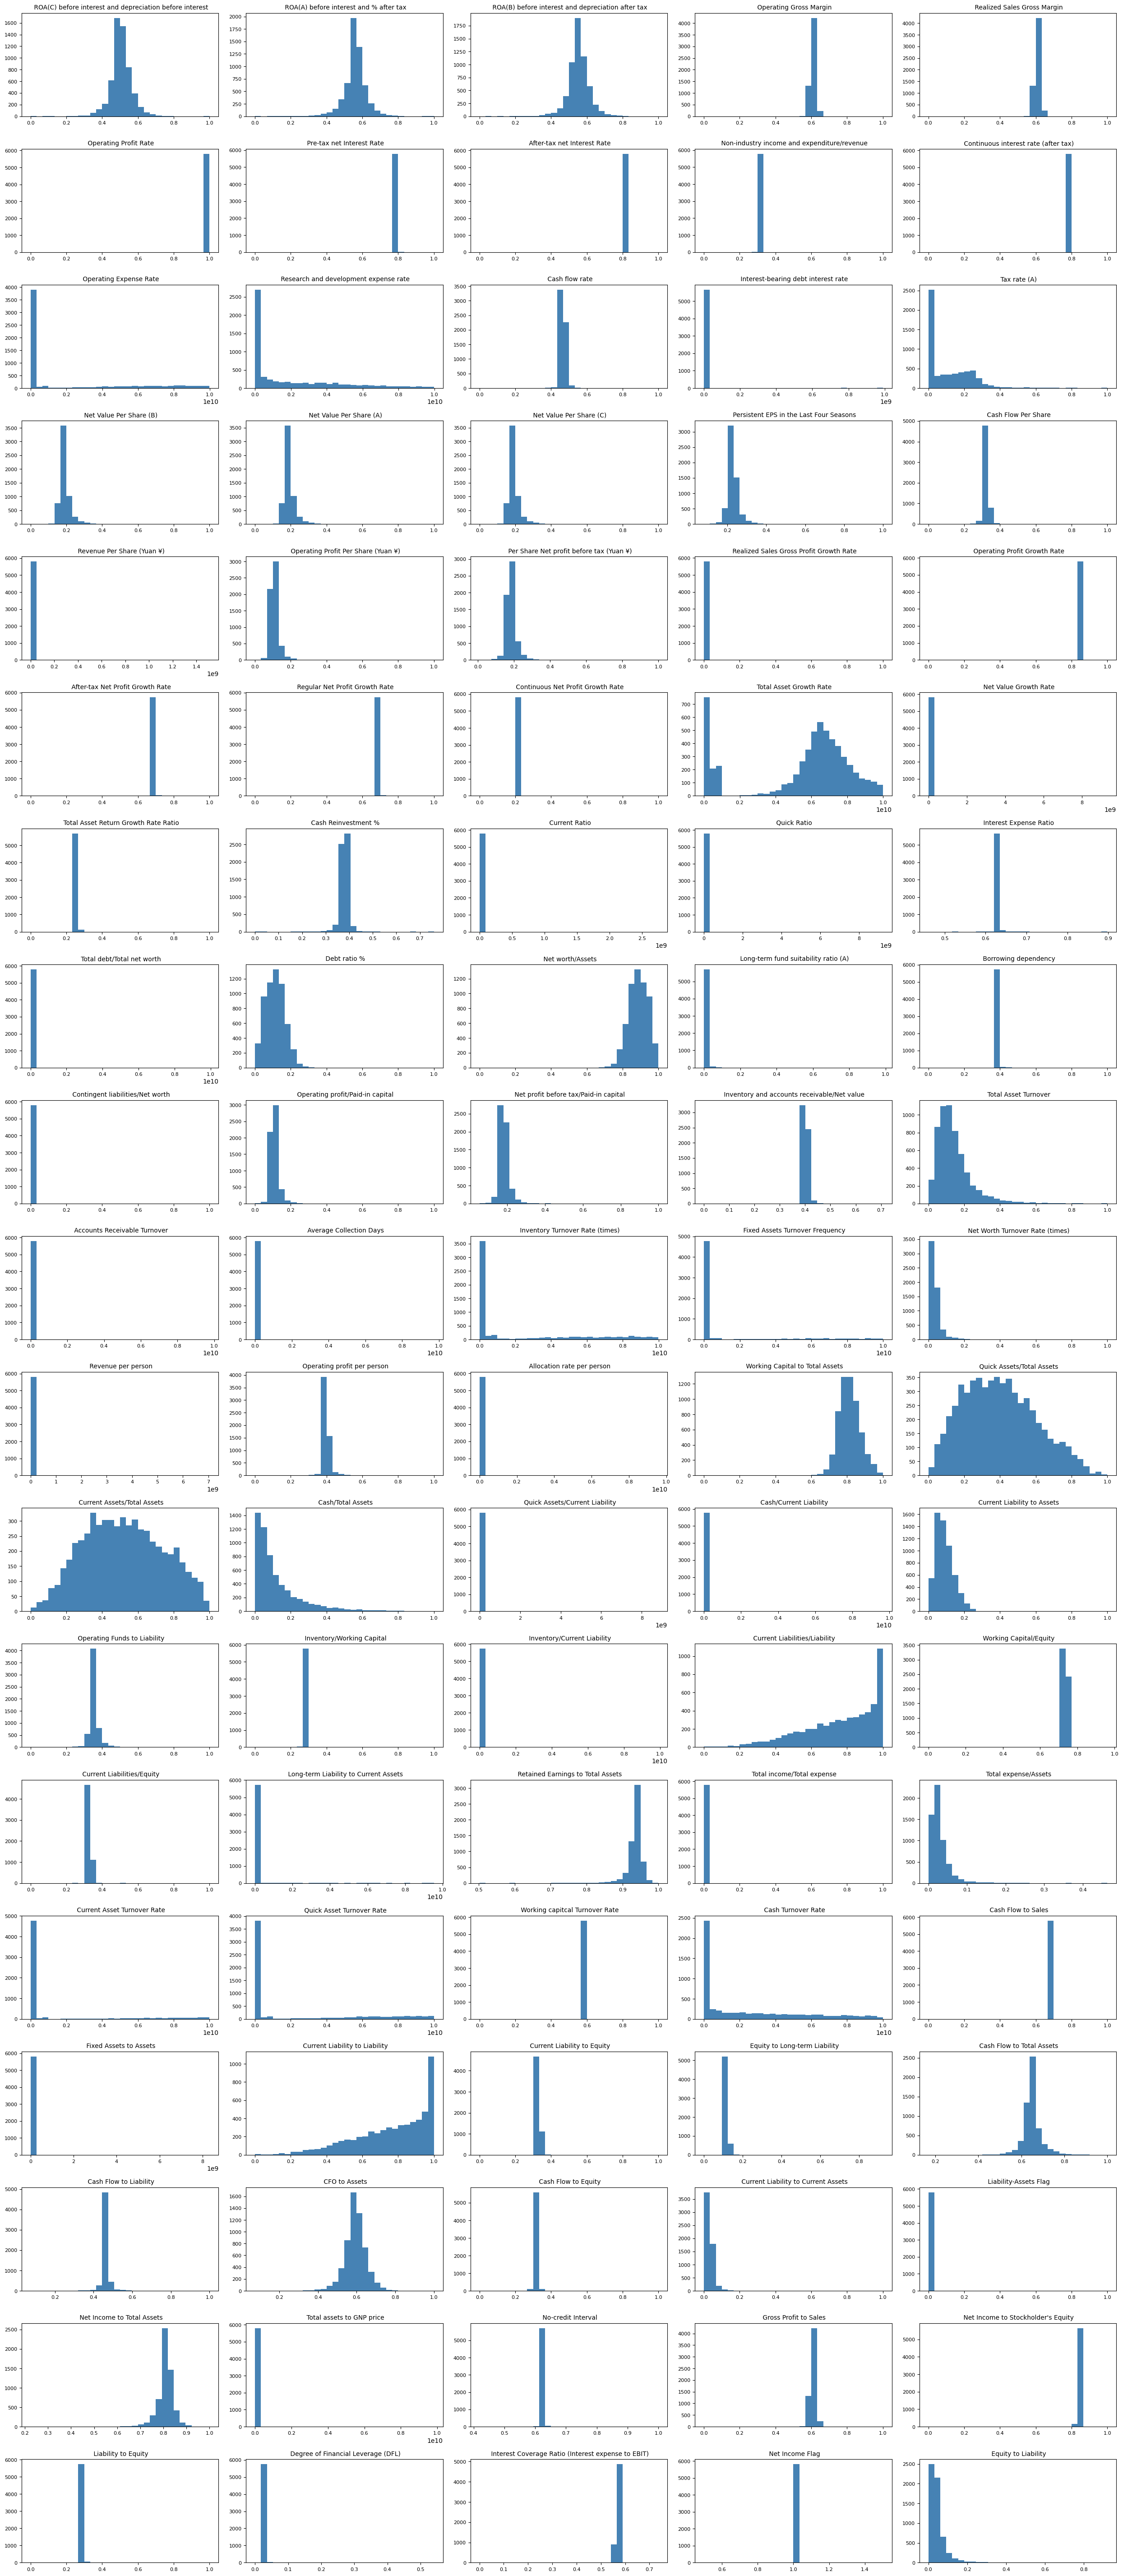

In [115]:
# plot distribtuion of numerical features
numerical_features = X_train.select_dtypes(include=['number']).columns
cols_per_grid = 5
rows = numerical_features.size // cols_per_grid + 1
fig, axes = plt.subplots(rows, cols_per_grid, figsize=(cols_per_grid*5, rows*3))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    axes[i].hist(X_train[col], bins=30, color='steelblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

We can see that a lot of these graphs have one large peak and nothing else. It's hard to interpret what that data actually is like. We see a couple of datasets that look normal so for those datasets, it is probably better to implement standard scaling.

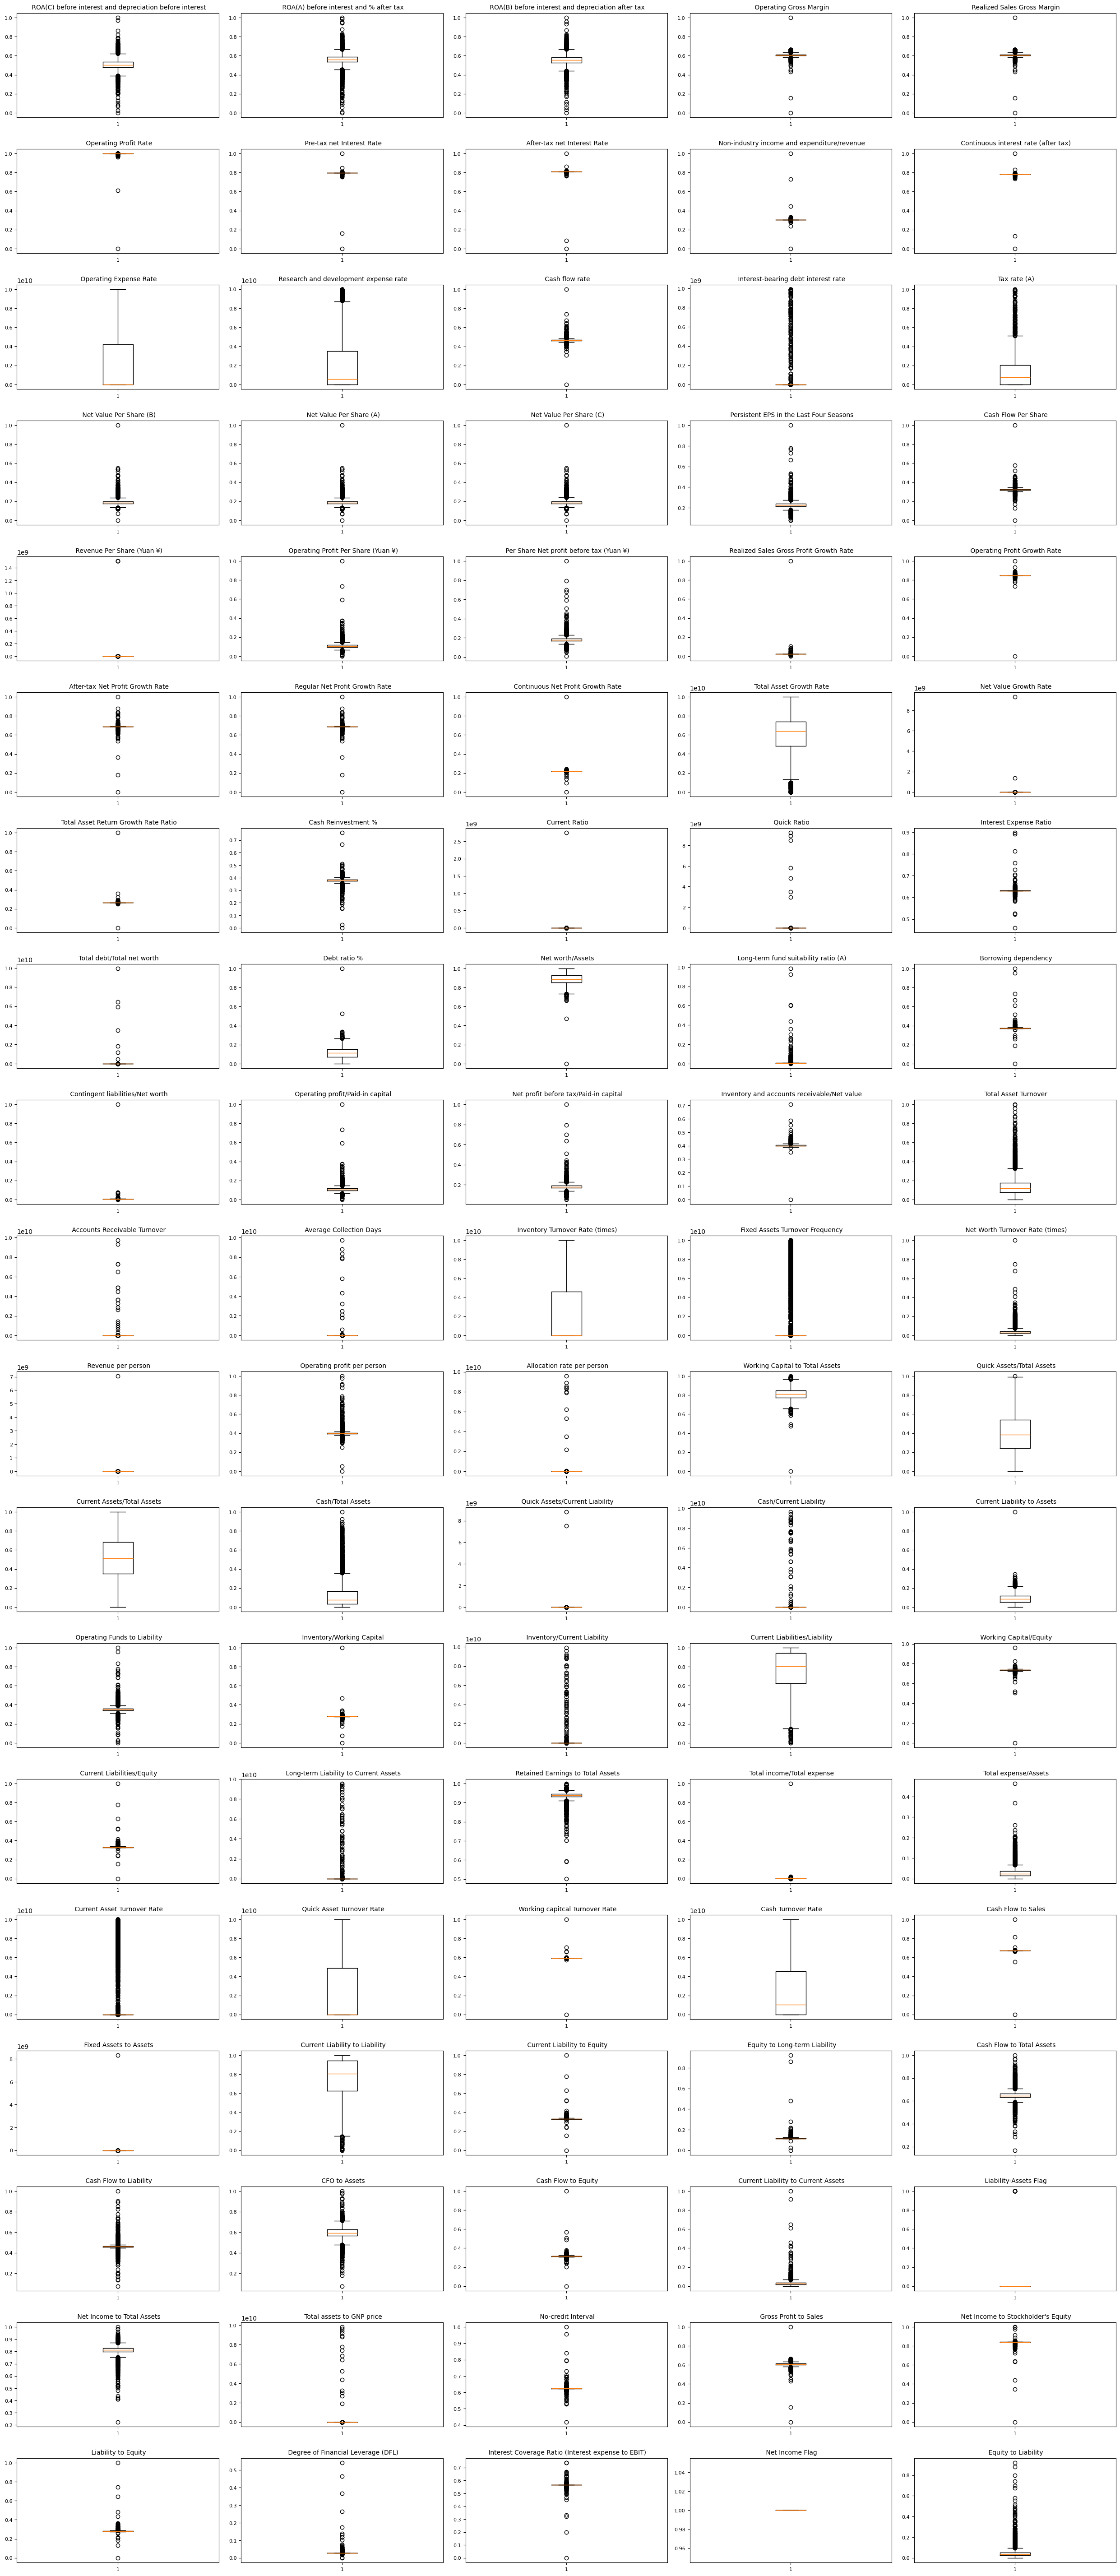

In [116]:
# plot distribtuion of numerical feature columns -> note how most are right skewed
numerical_features = X_train.select_dtypes(include=['number']).columns
cols_per_grid = 5
rows = numerical_features.size // cols_per_grid + 1
fig, axes = plt.subplots(rows, cols_per_grid, figsize=(cols_per_grid*5, rows*3))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    axes[i].boxplot(X_train[col])
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Hide any unused subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

For the case of this experiment, I do not think that it would be good to drop any outliers. For that reason, we will work with minMax scaling as in a lot of these cases, these outliers could be important for predicting bankruptcies.

### Transforming the Data

In [117]:
X_train.describe()

ROA(C) before interest and depreciation before interest  \
count                                        5807.000000          
mean                                            0.505416          
std                                             0.060808          
min                                             0.000000          
25%                                             0.476673          
50%                                             0.503096          
75%                                             0.535417          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              5807.000000   
mean                                  0.558893   
std                                   0.065650   
min                                   0.000000   
25%                                   0.535679   
50%                                   0.559911   
75%                                   0.589212   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        5807.000000    
mean                                            0.553852    
std                                             0.061613    
min                                             0.000000    
25%                                             0.527437    
50%                                             0.552492    
75%                                             0.583998    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              5807.000000                   5807.000000   
mean                  0.607958                      0.607938   
std                   0.017499                      0.017480   
min                   0.000000                      0.000000   
25%                   0.600448                      0.600427   
50%                   0.605969                      0.605933   
75%                   0.613856                      0.613730   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             5807.000000                 5807.000000   
mean                 0.998726                    0.797192   
std                  0.014087                    0.013731   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999094                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   5807.000000   
mean                       0.809081   
std                        0.014553   
min                        0.000000   
25%                        0.809312   
50%                        0.809376   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   5807.000000   
mean                                       0.303688   
std                                        0.011666   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)  ...  \
count                            5807.000000  ...   
mean                                0.781369  ...   
std                                 0.013697  ...   
min                                 0.000000  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781734  ...   
max 

In [118]:
X_train.corr().style.background_gradient(cmap='coolwarm')

c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


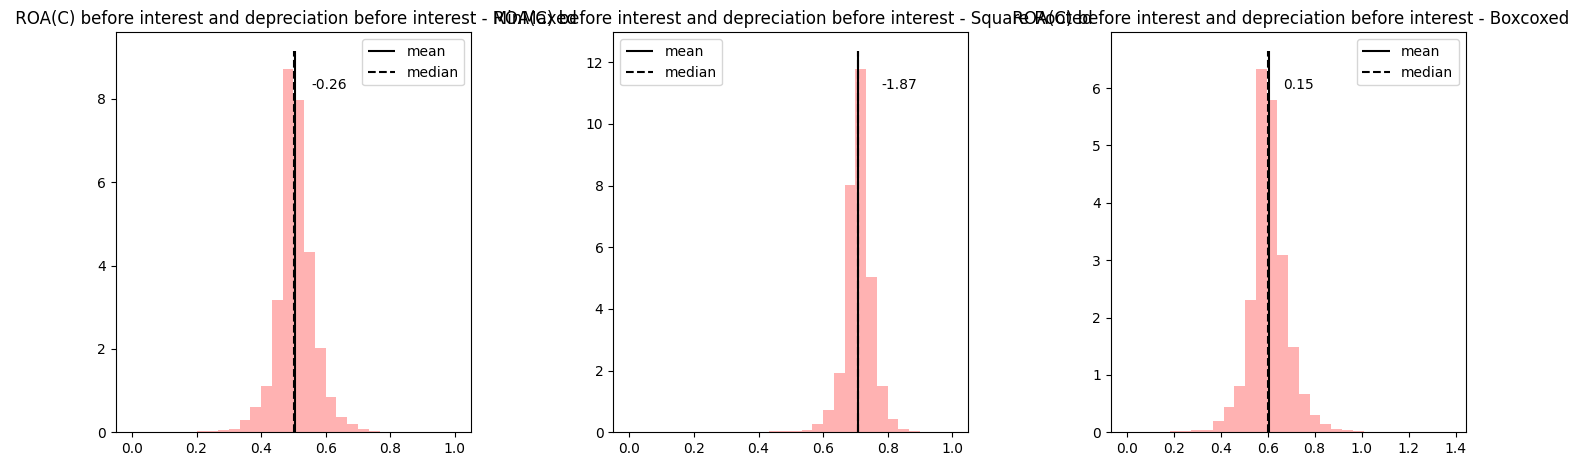

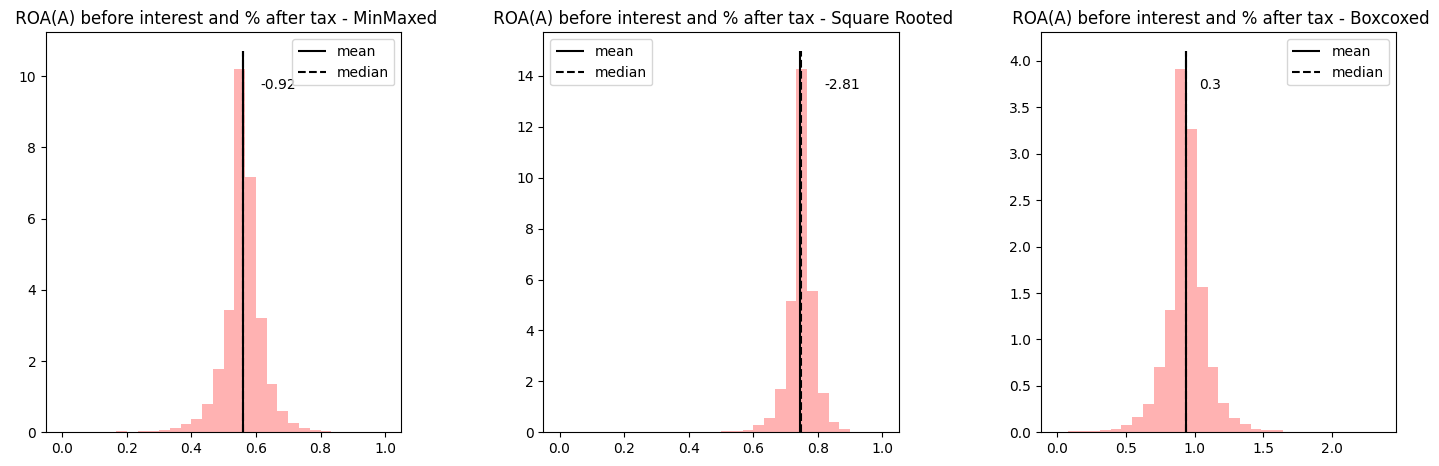

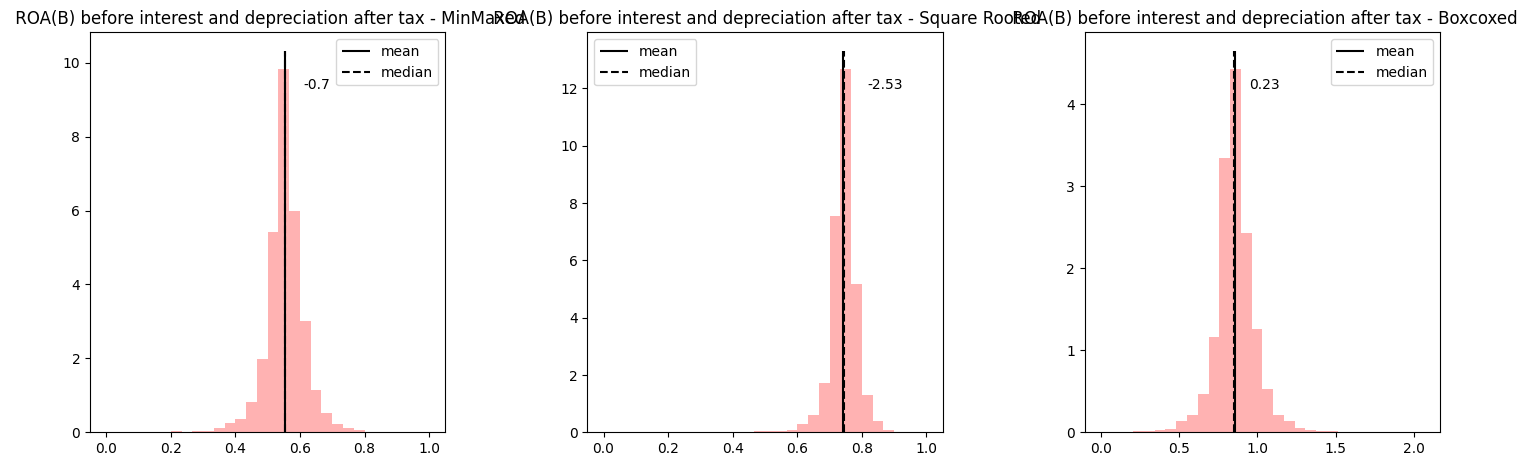

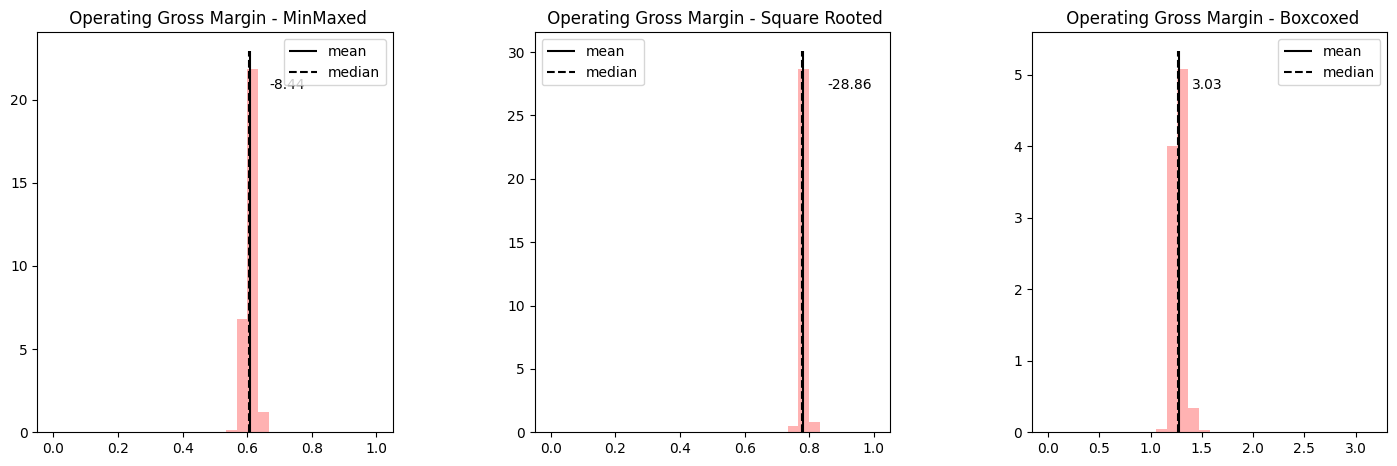

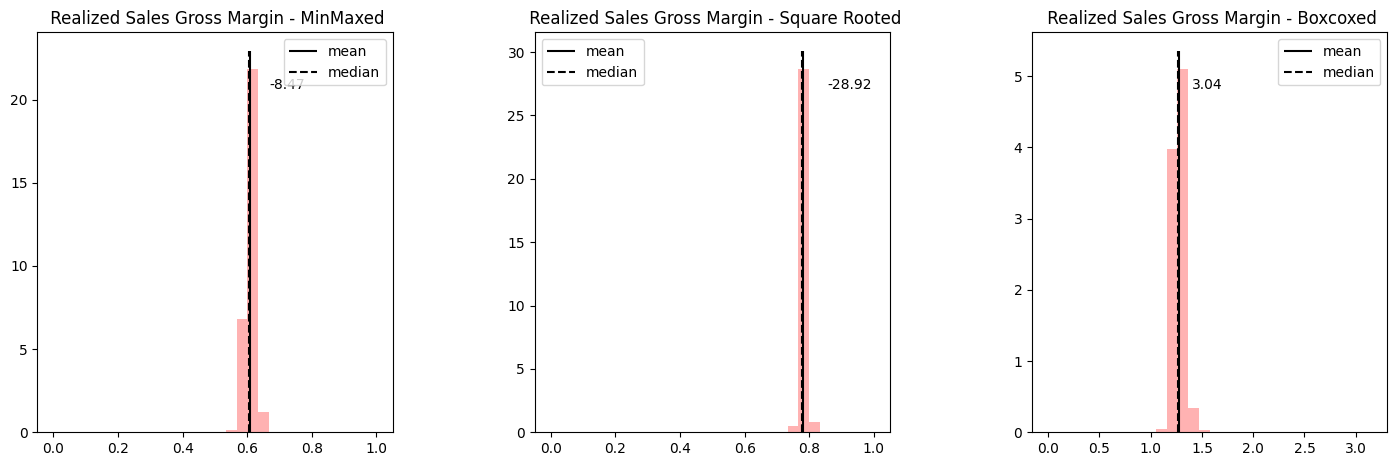

c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1252: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1264: RuntimeWarning: overflow encountered in scalar power
  result = (count * (count - 1) ** 0.5 / (count

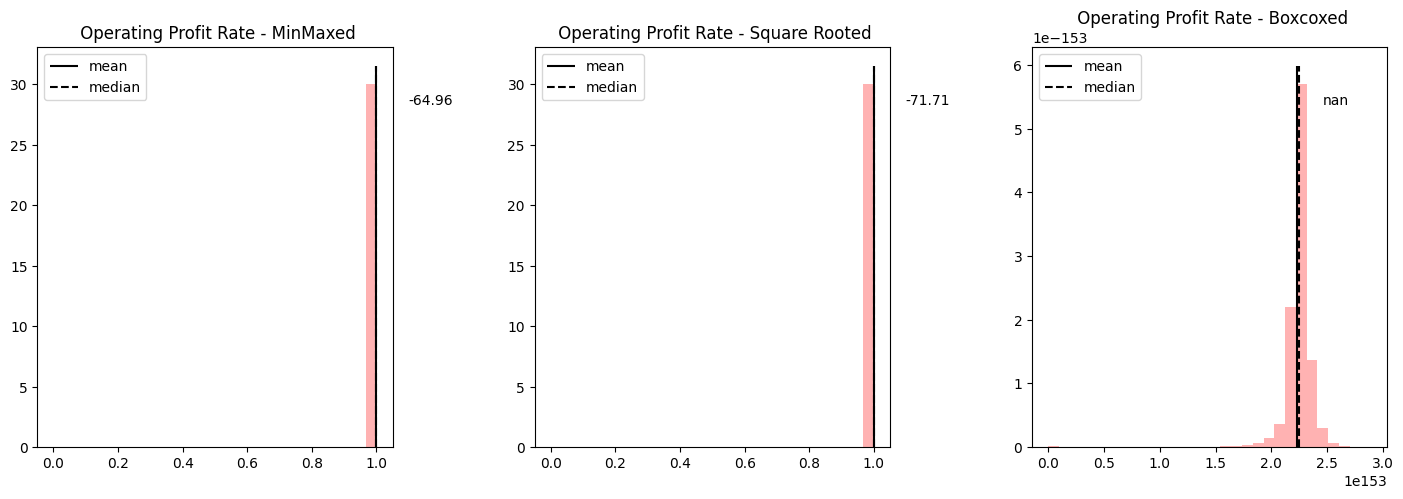

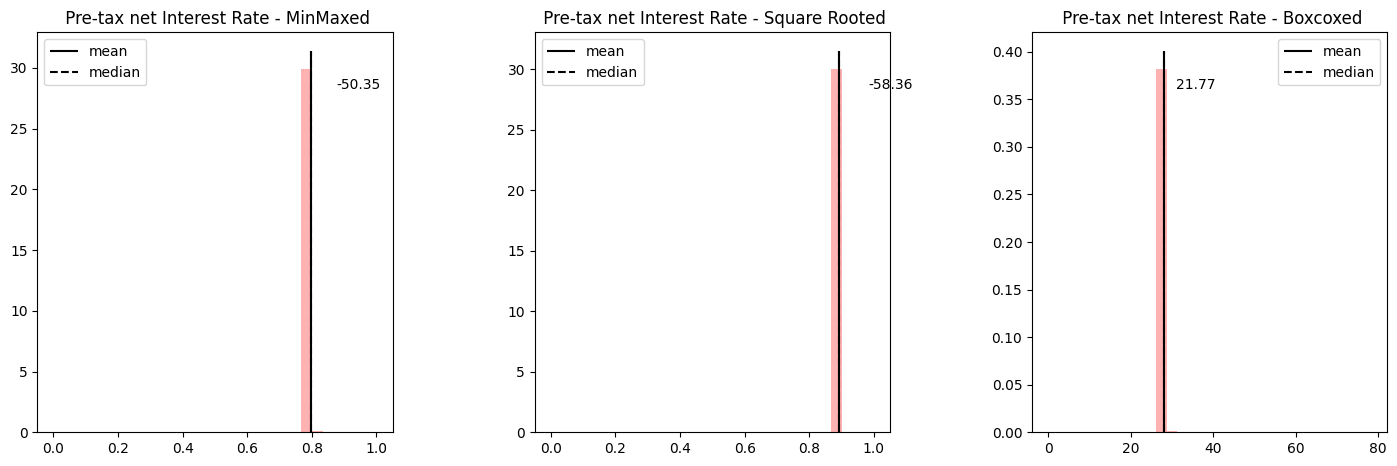

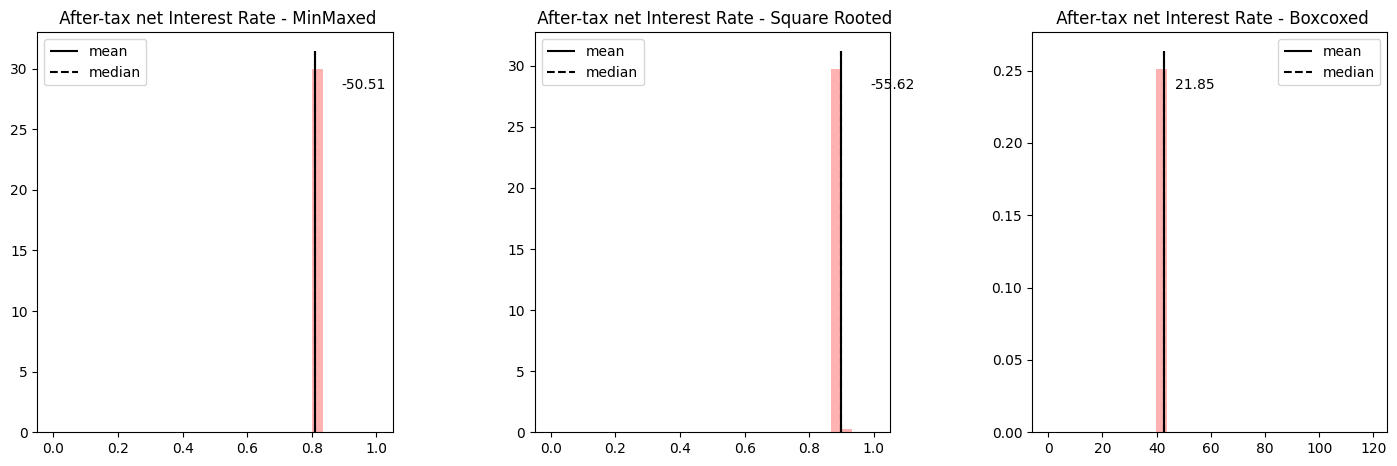

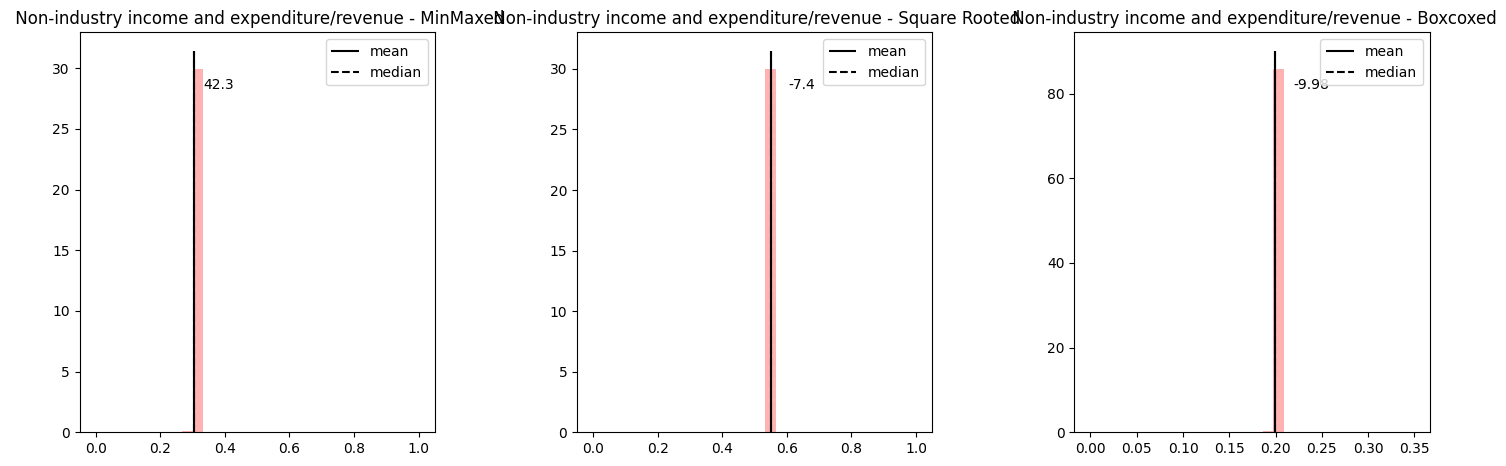

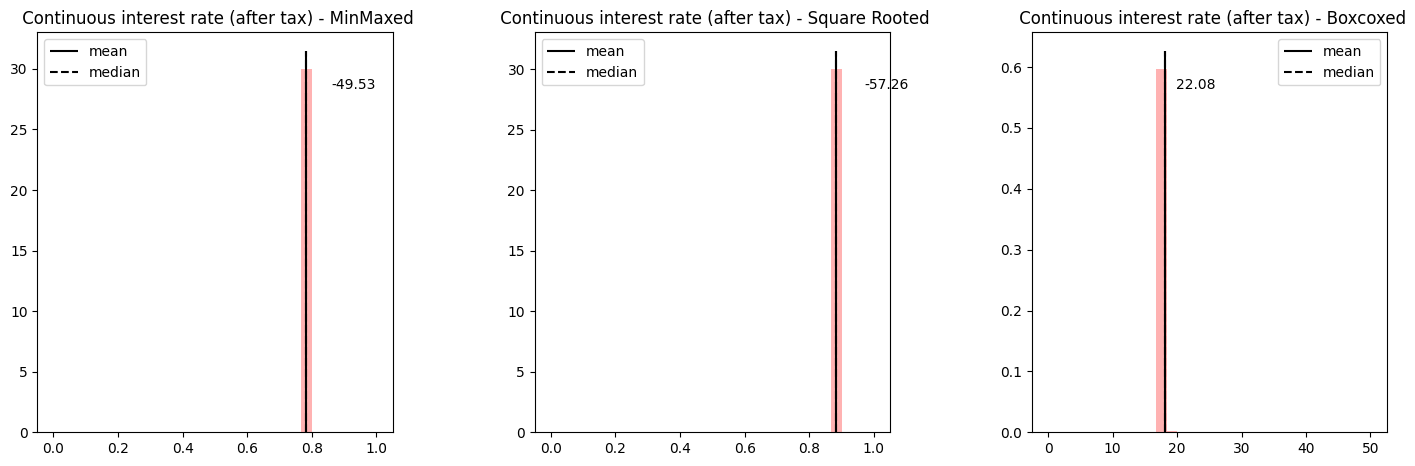

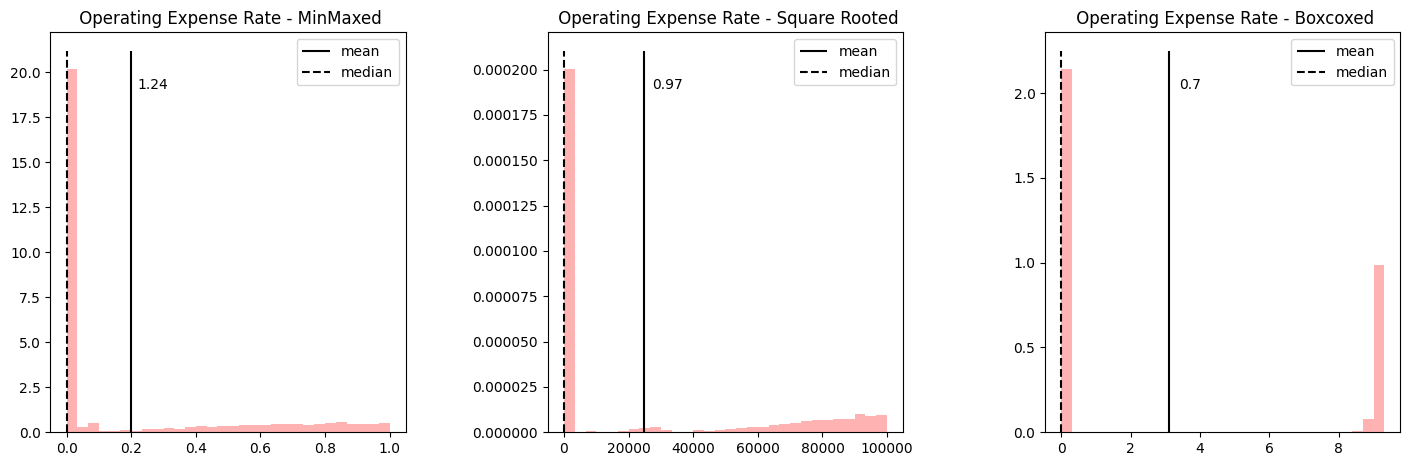

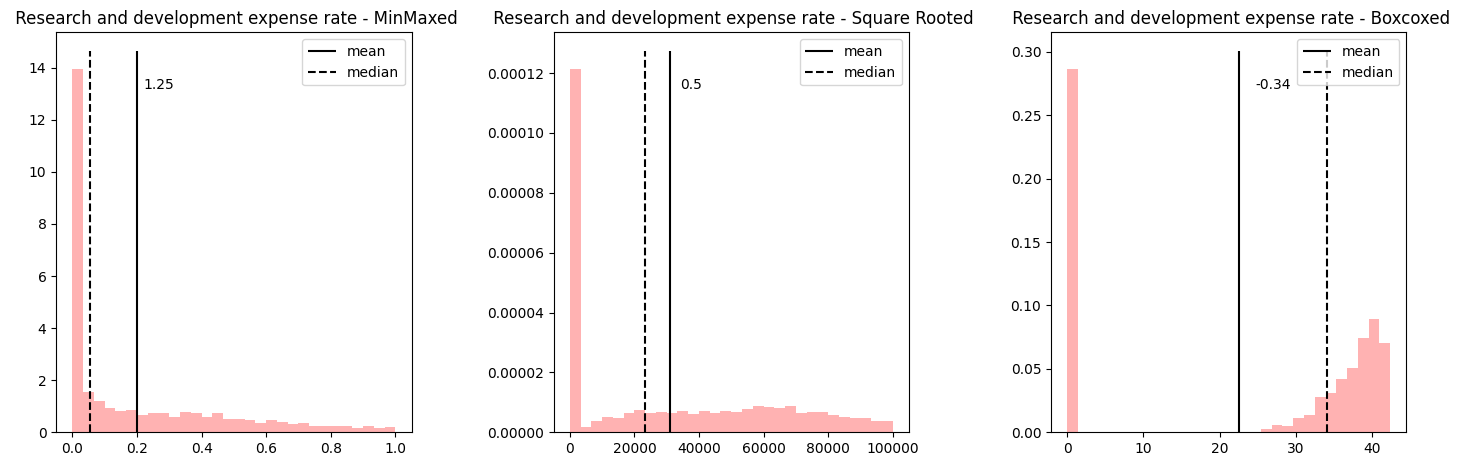

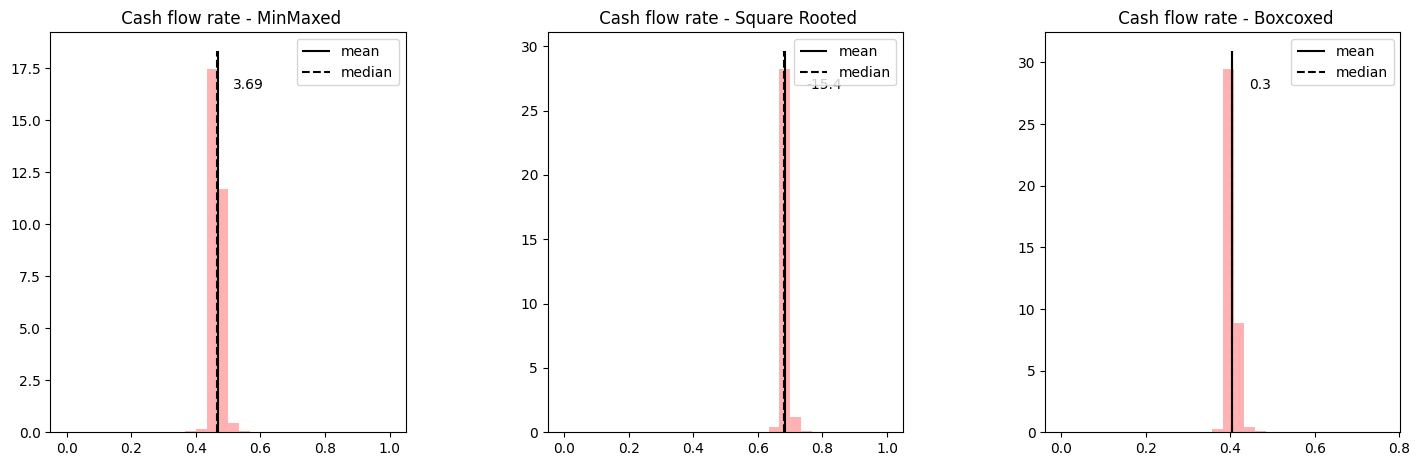

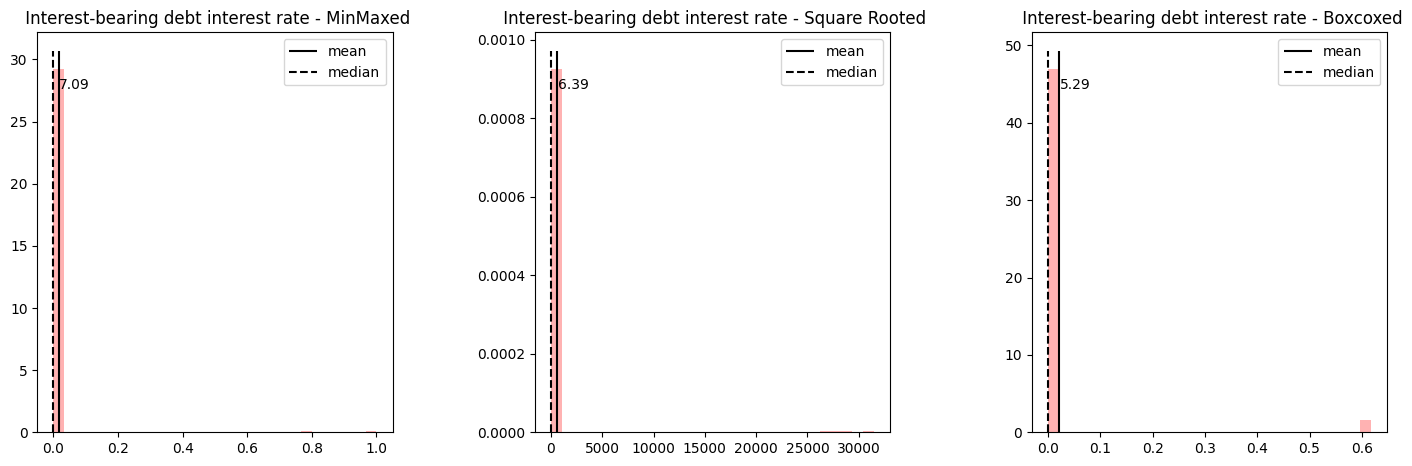

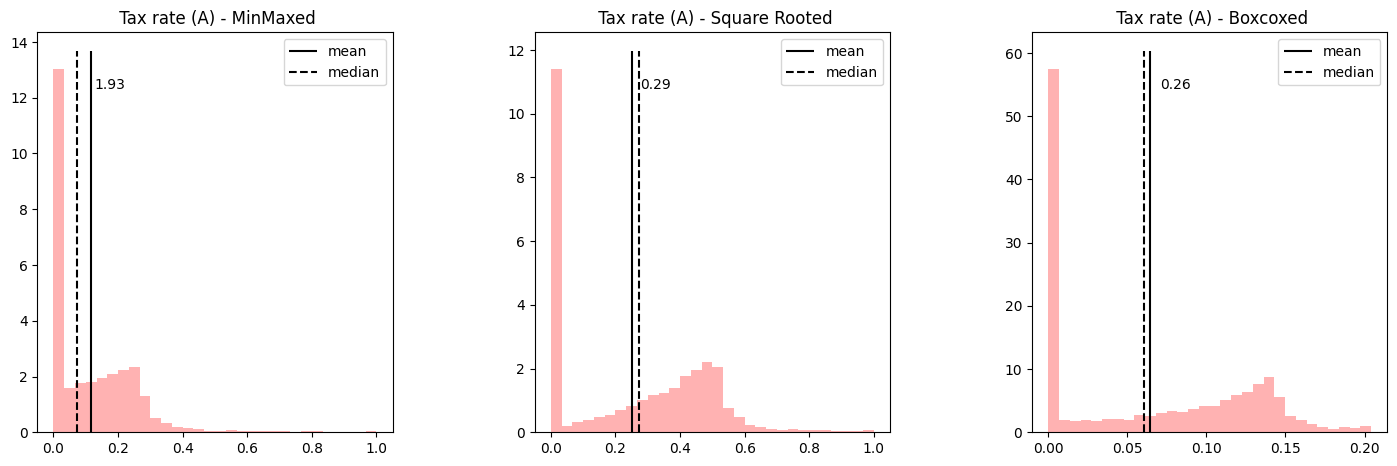

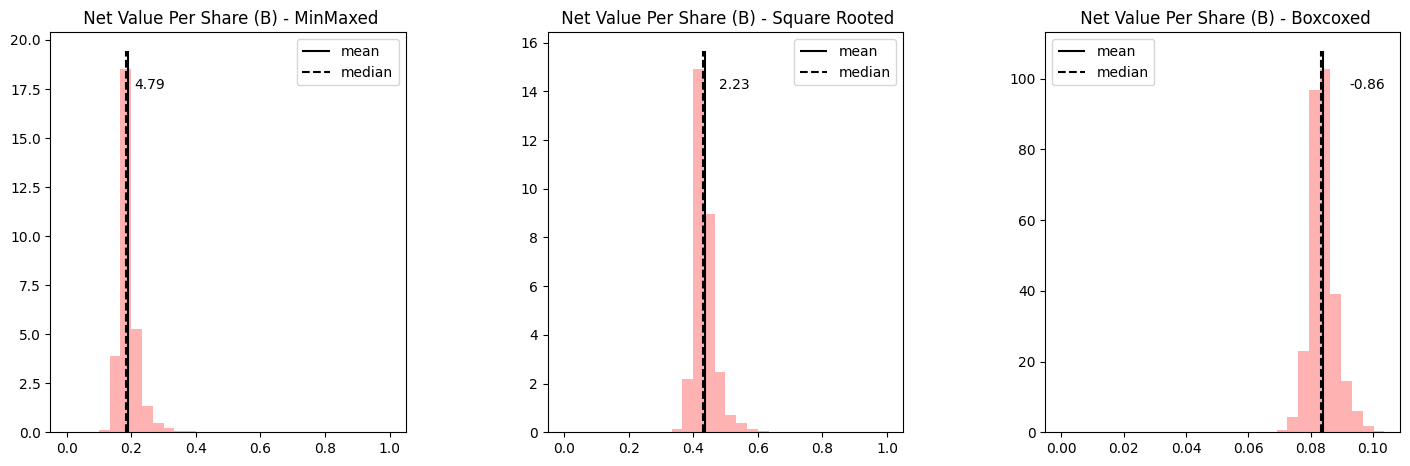

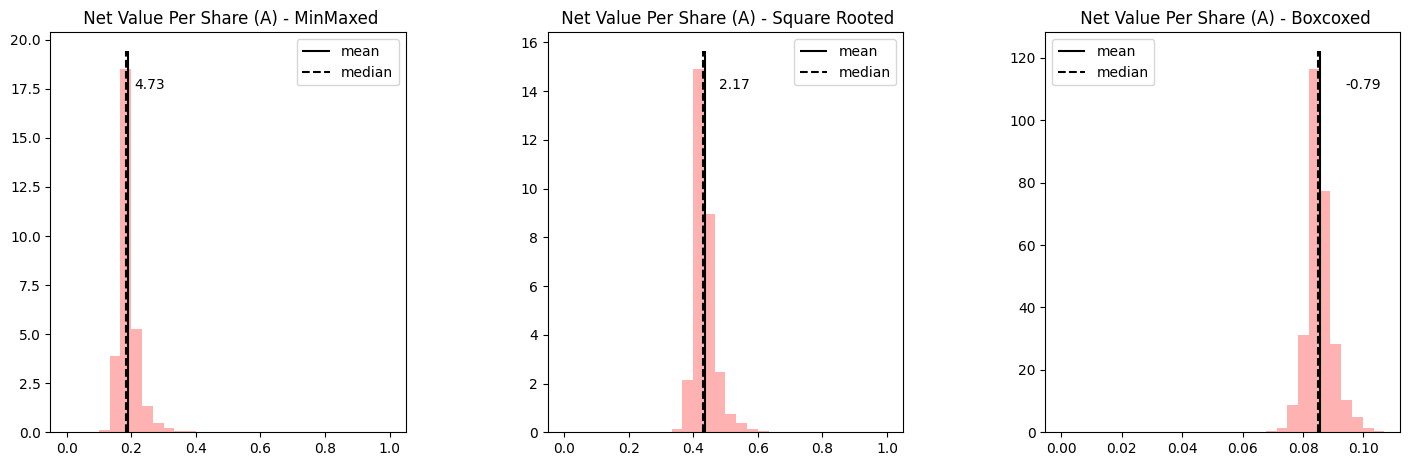

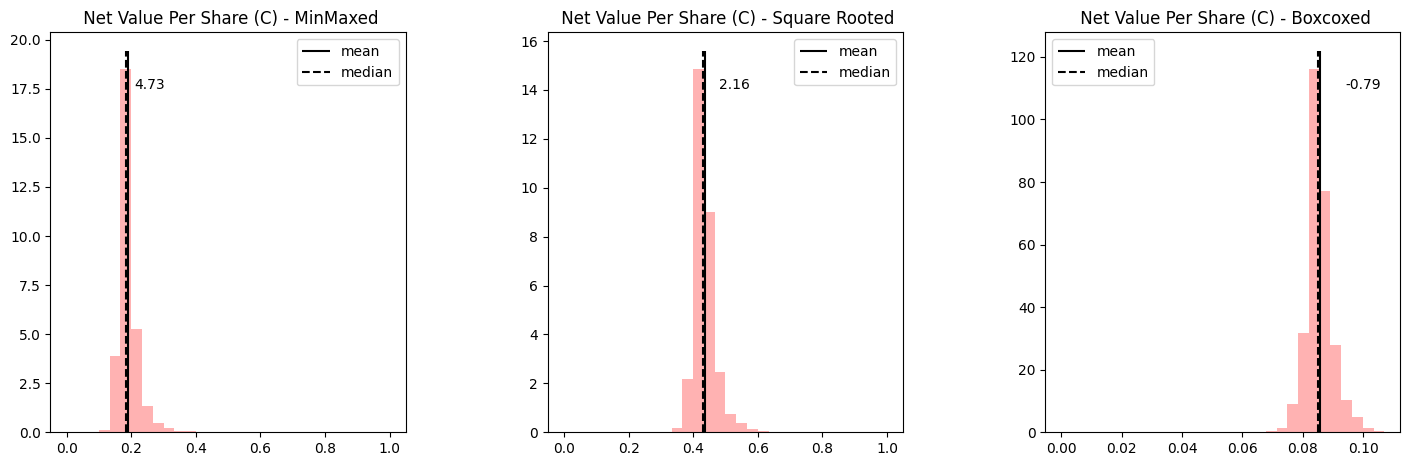

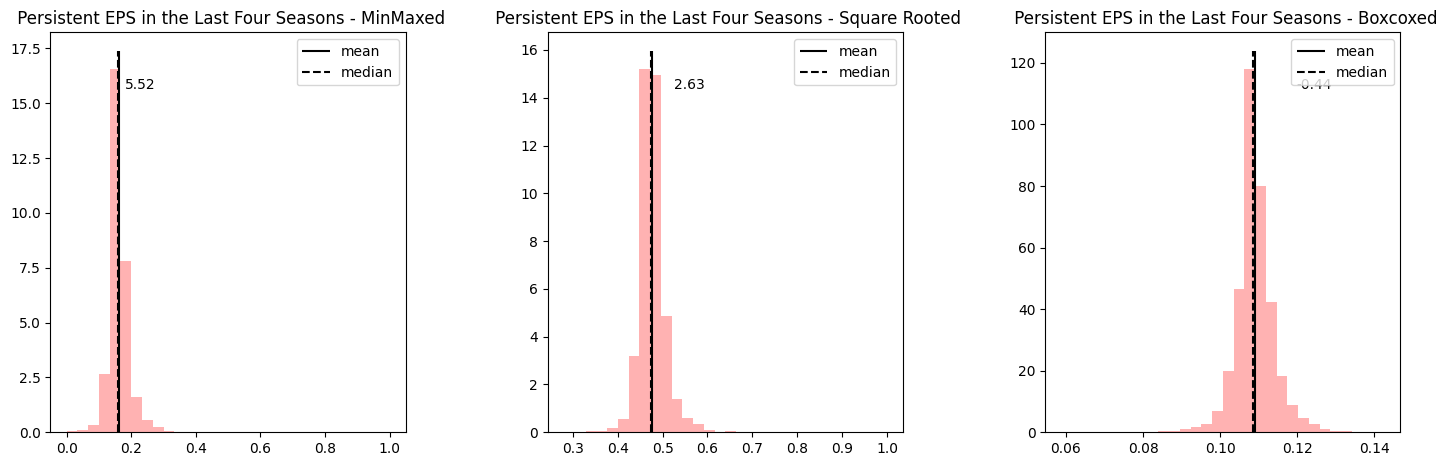

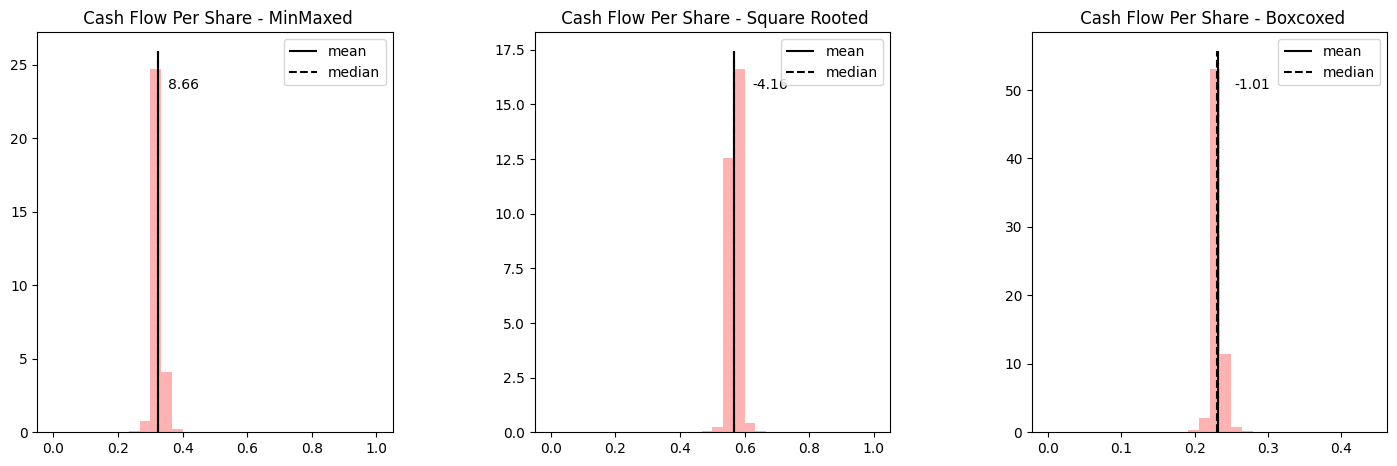

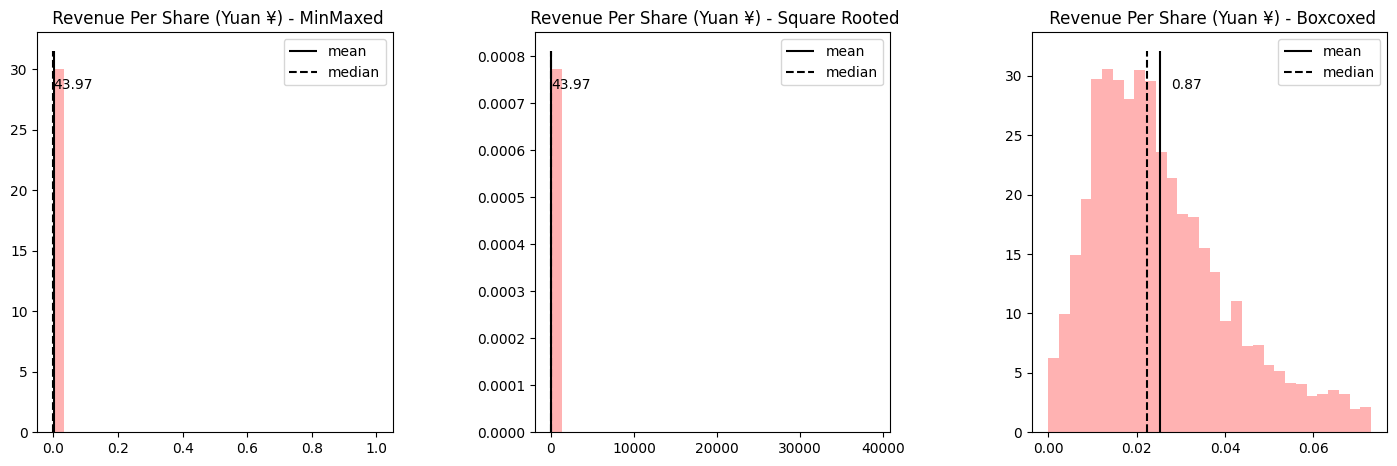

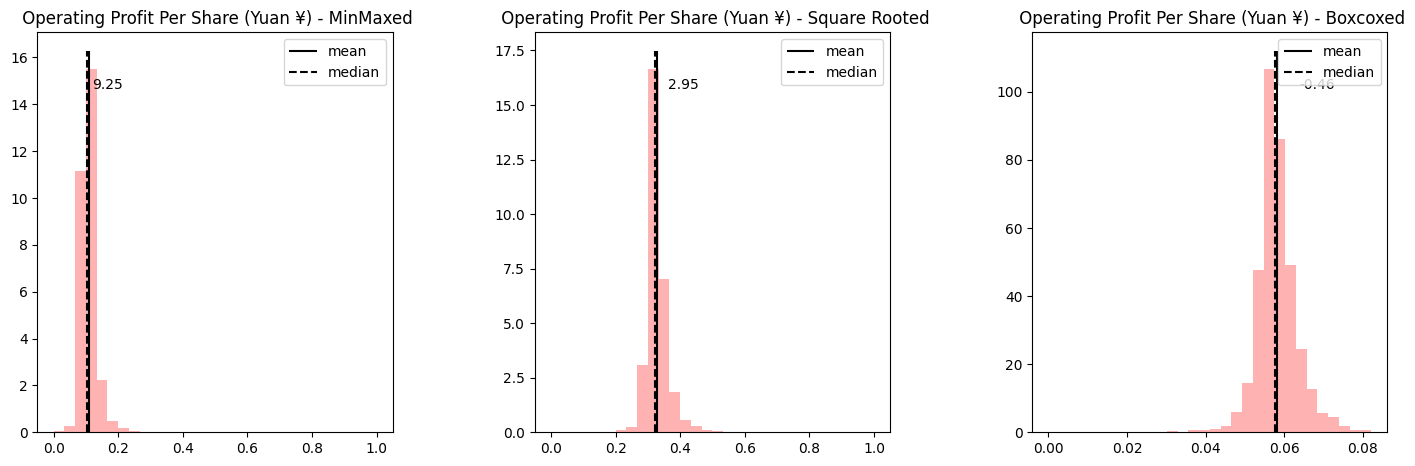

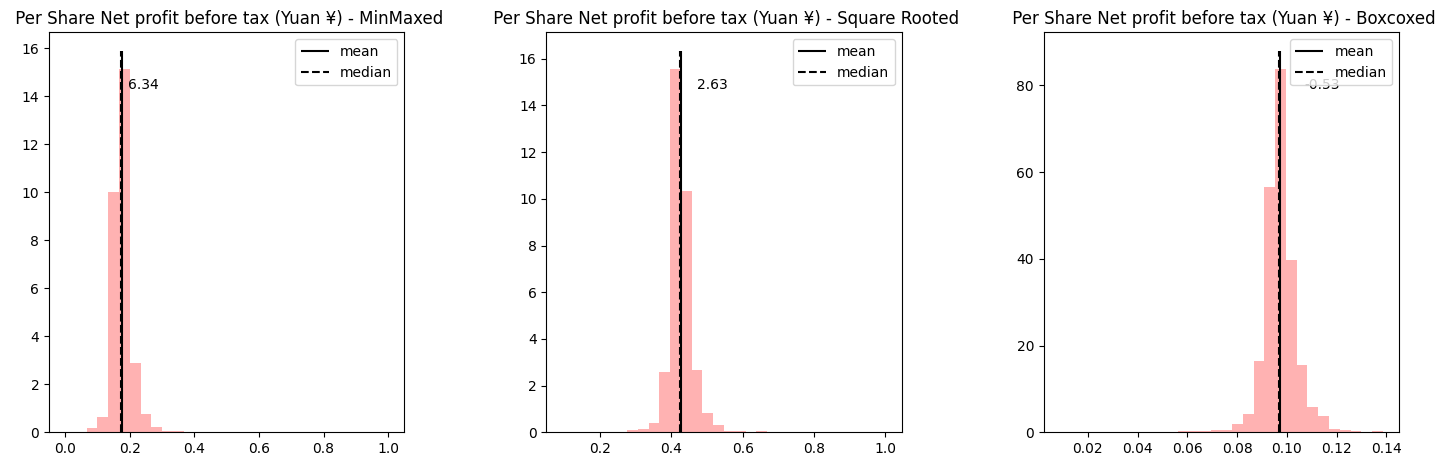

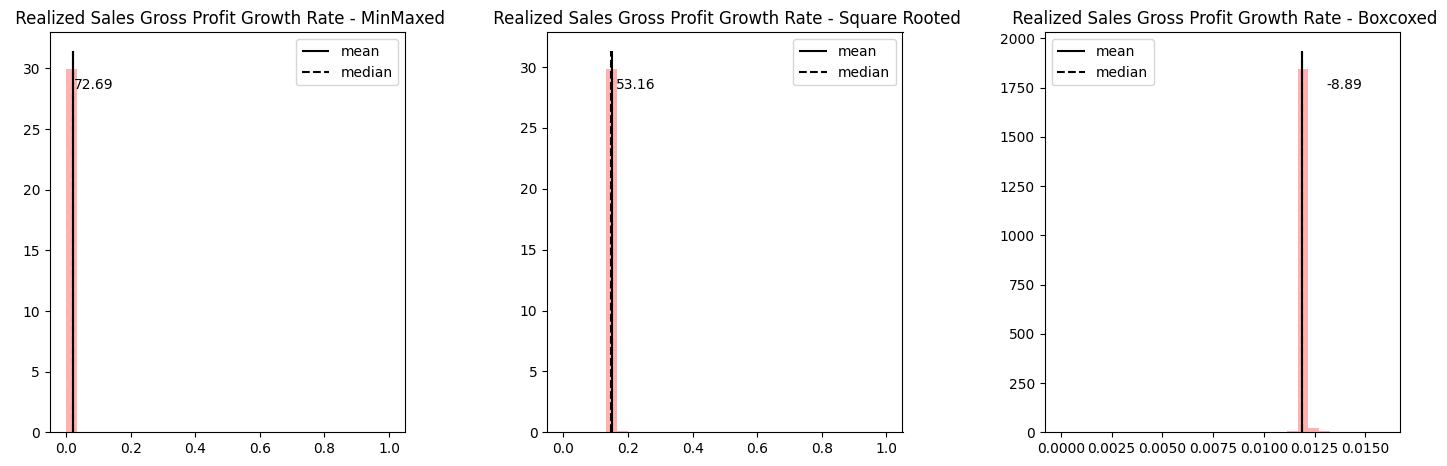

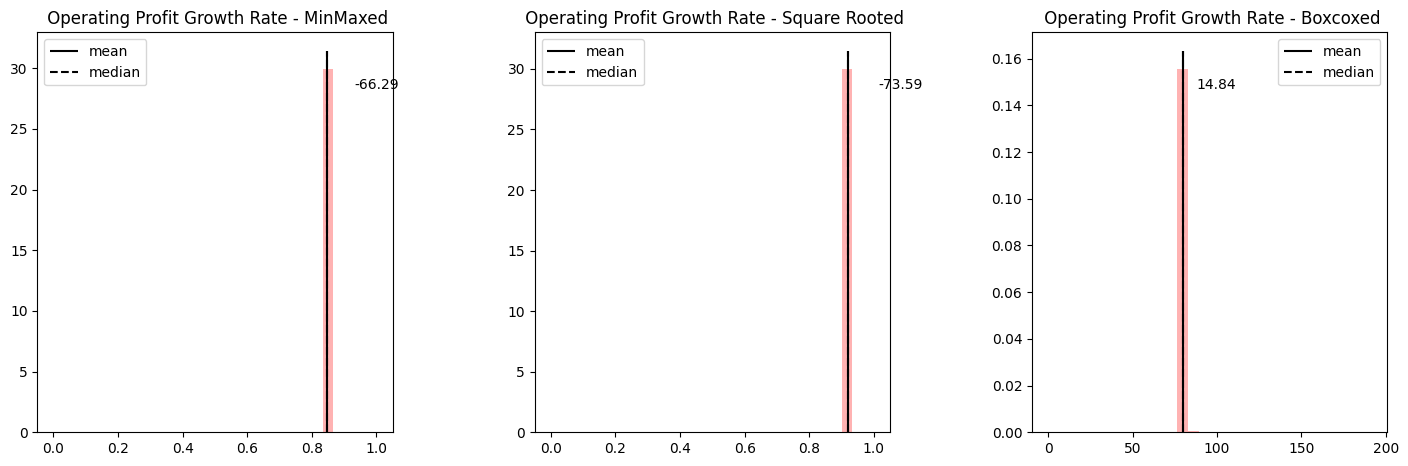

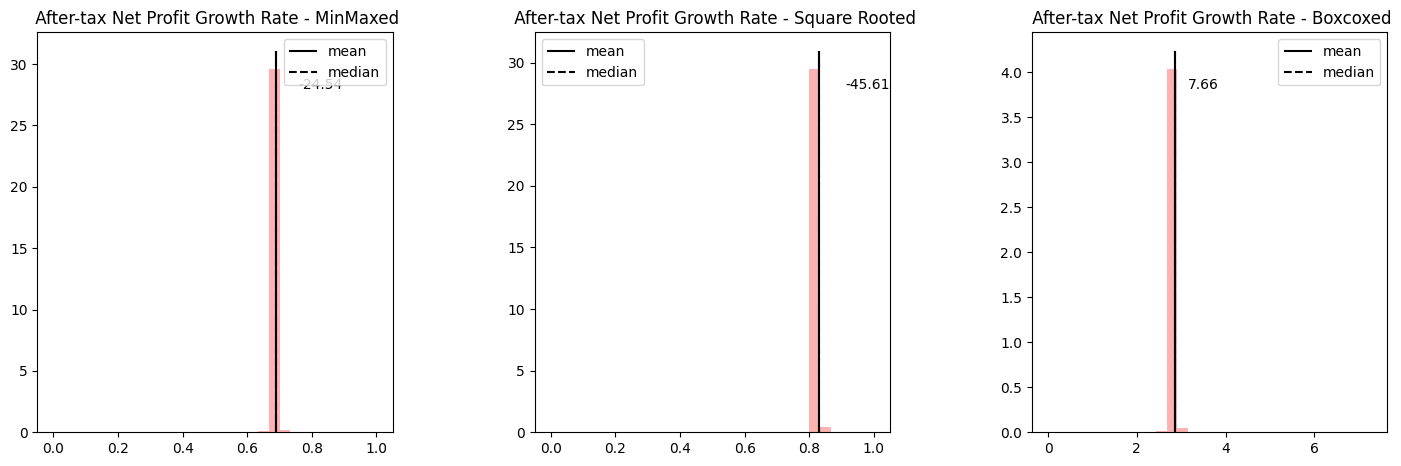

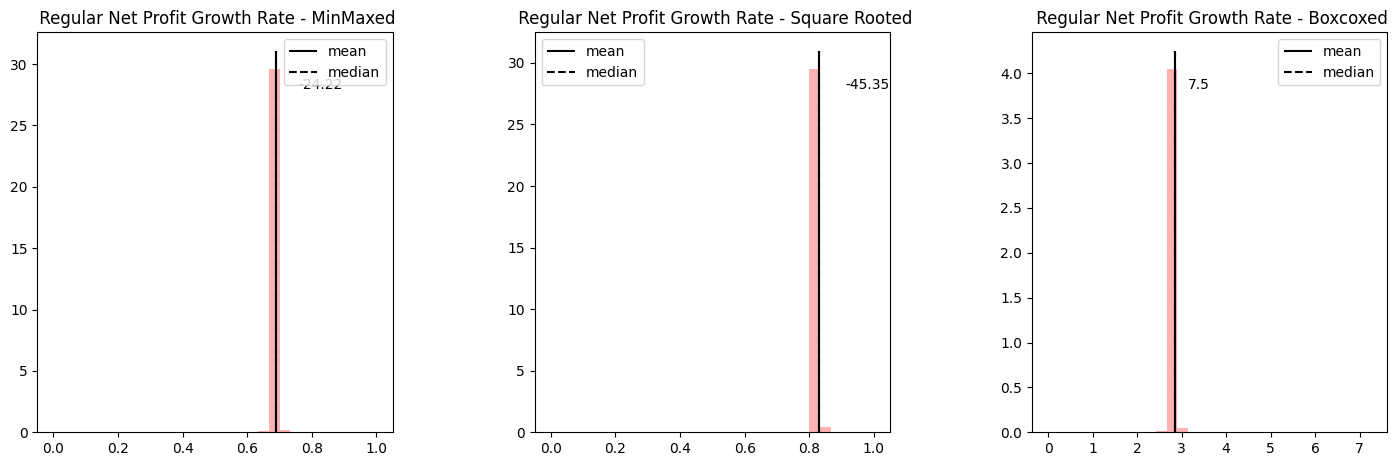

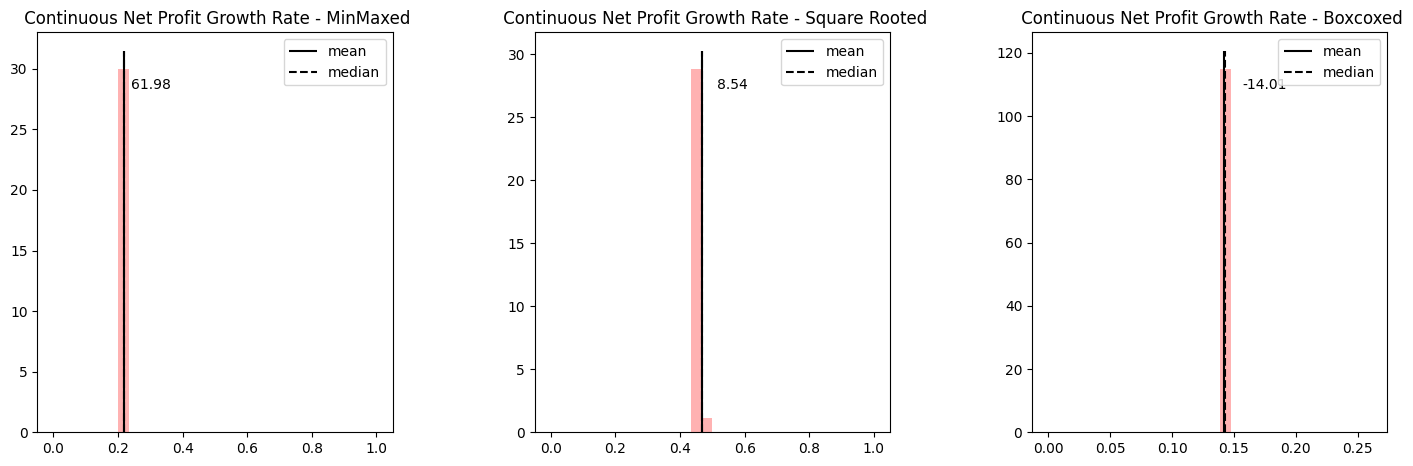

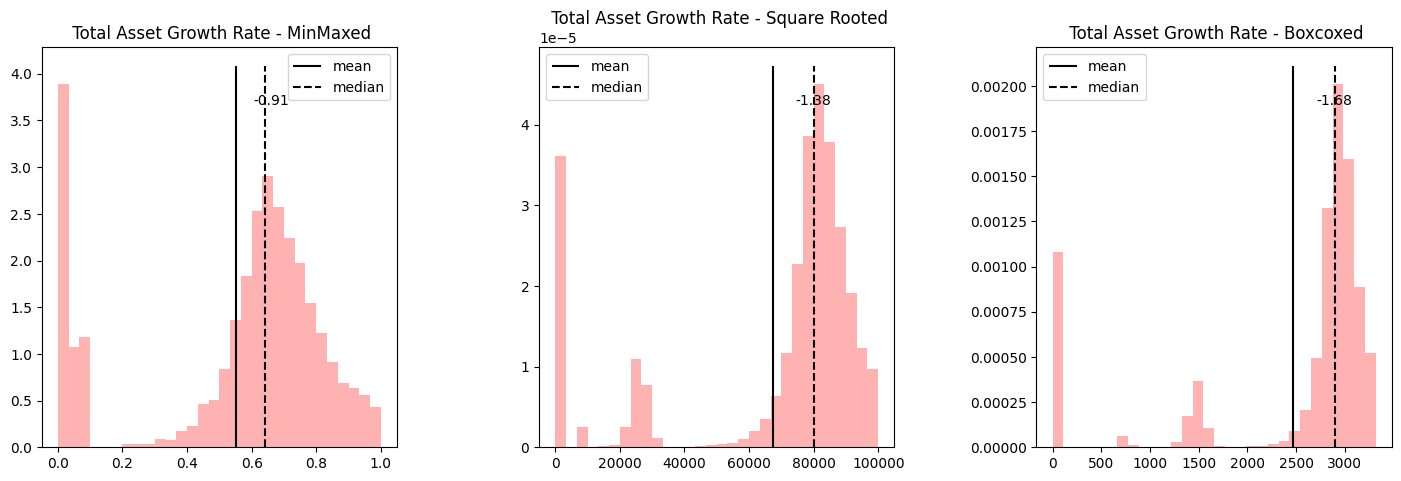

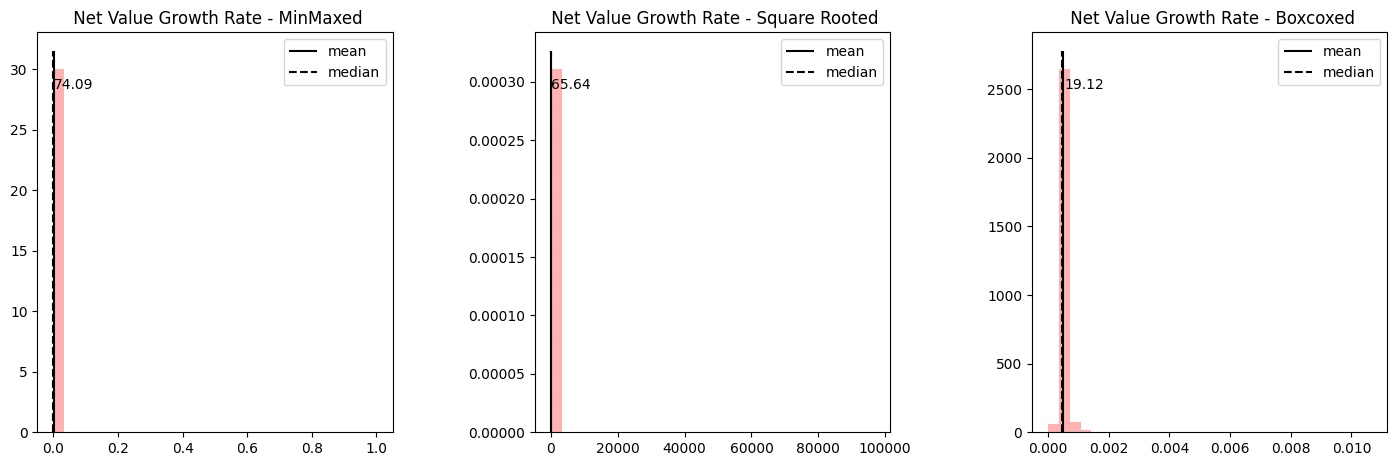

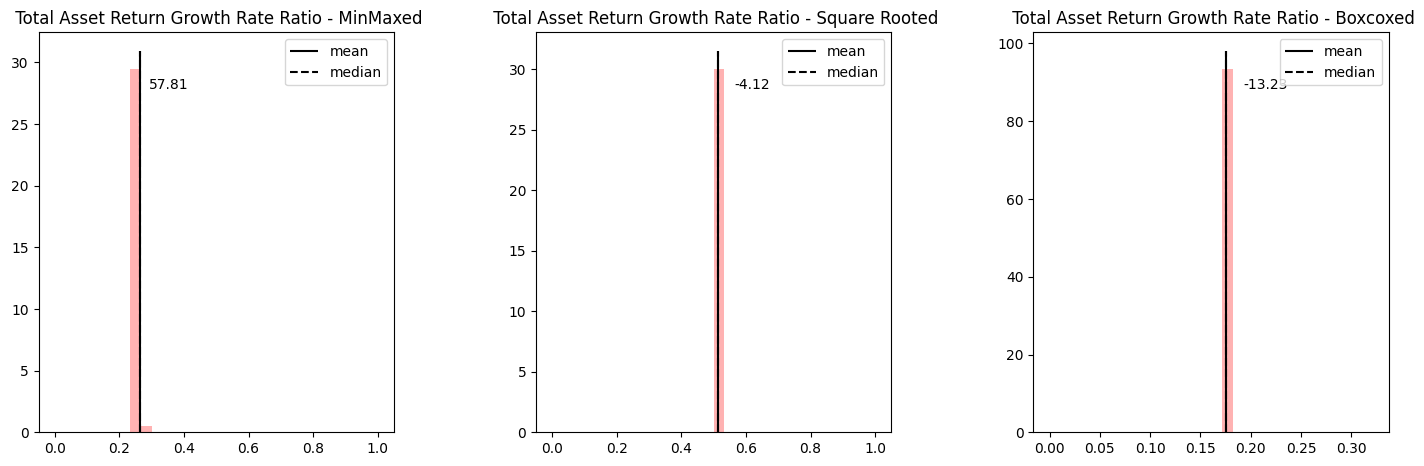

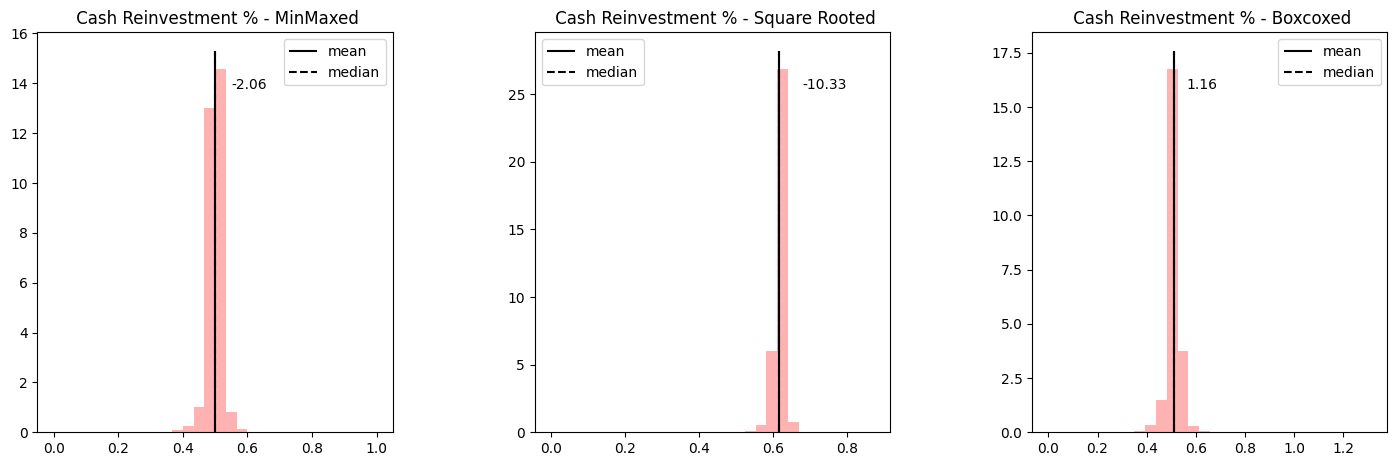

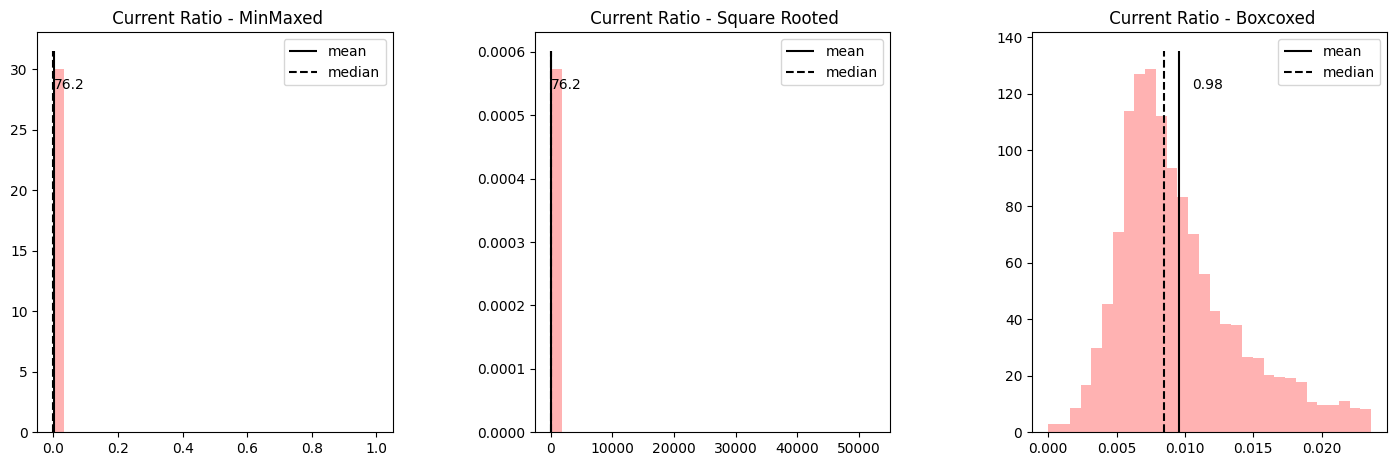

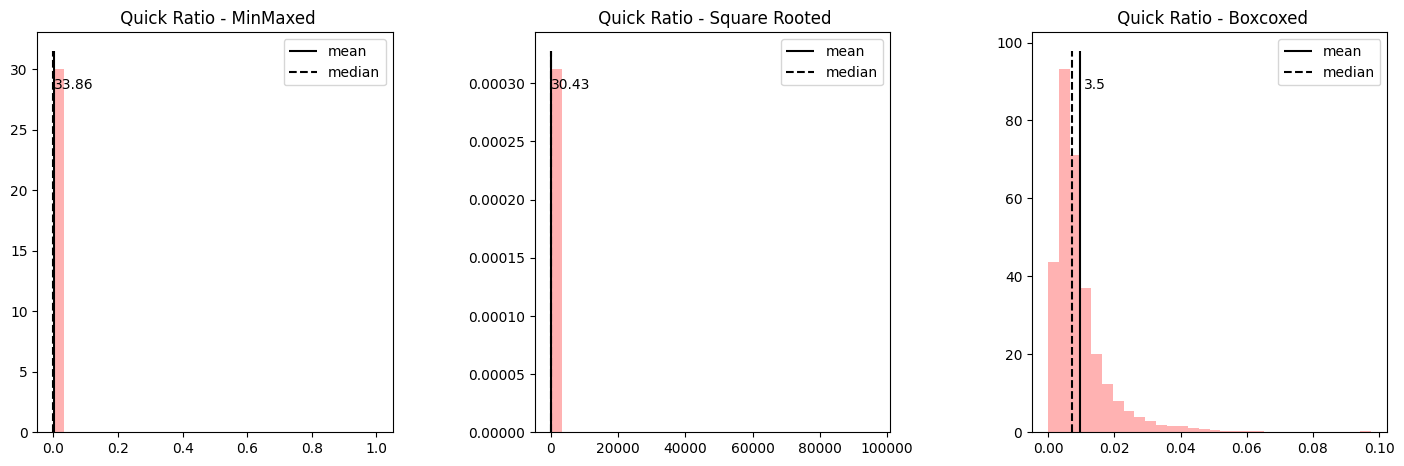

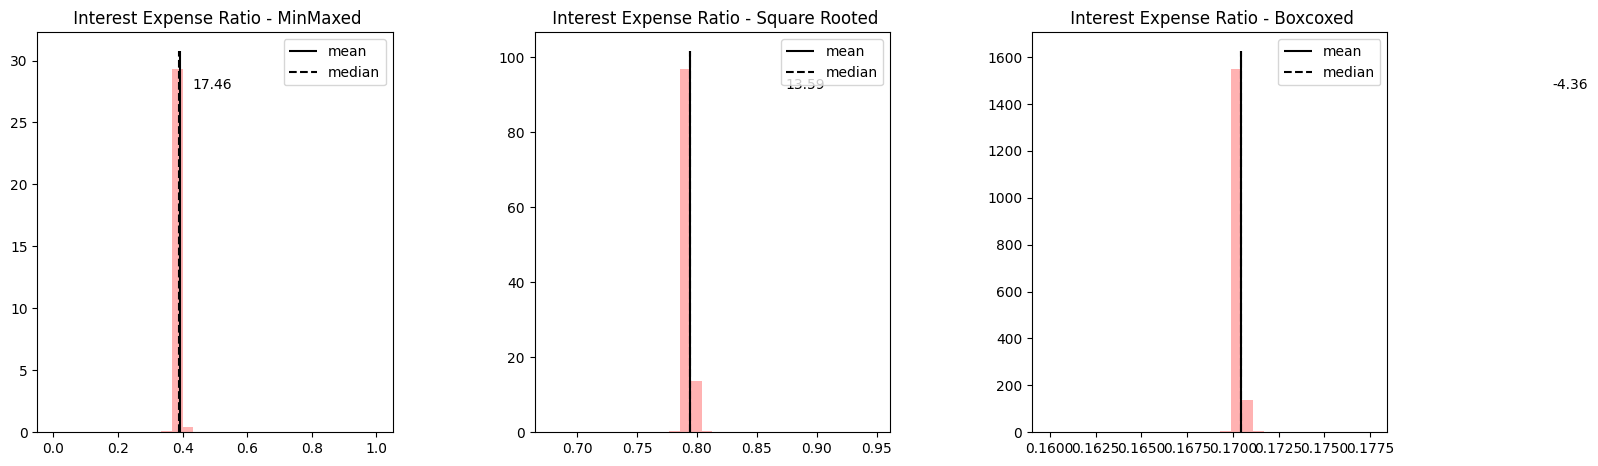

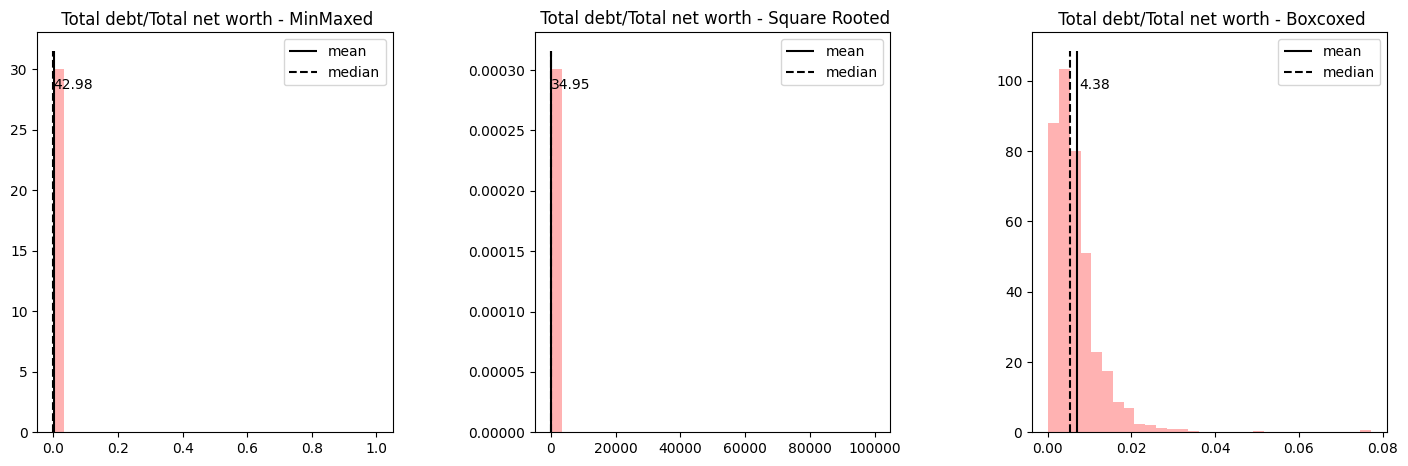

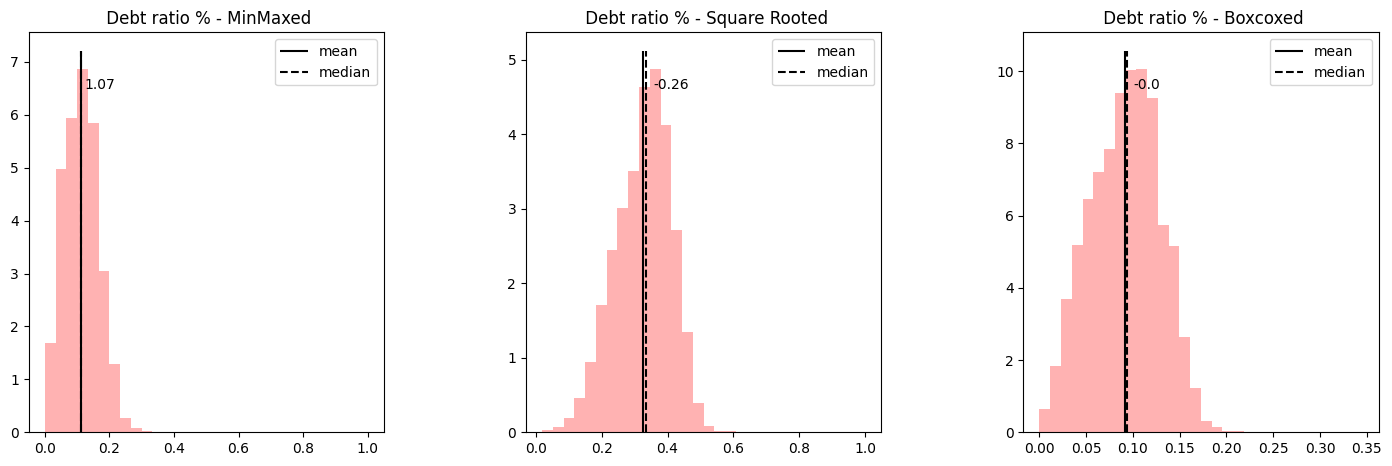

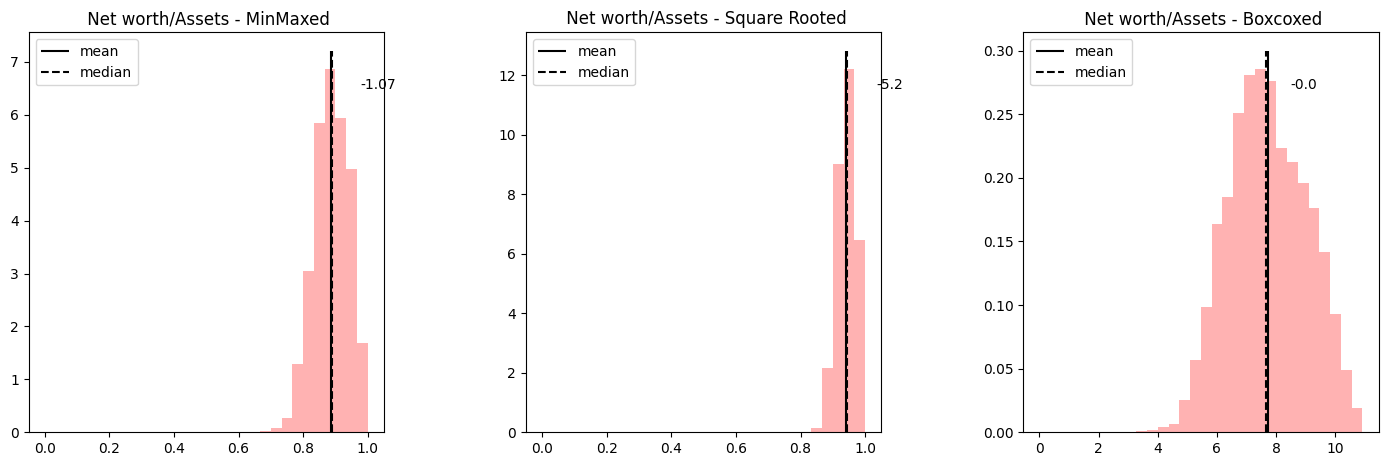

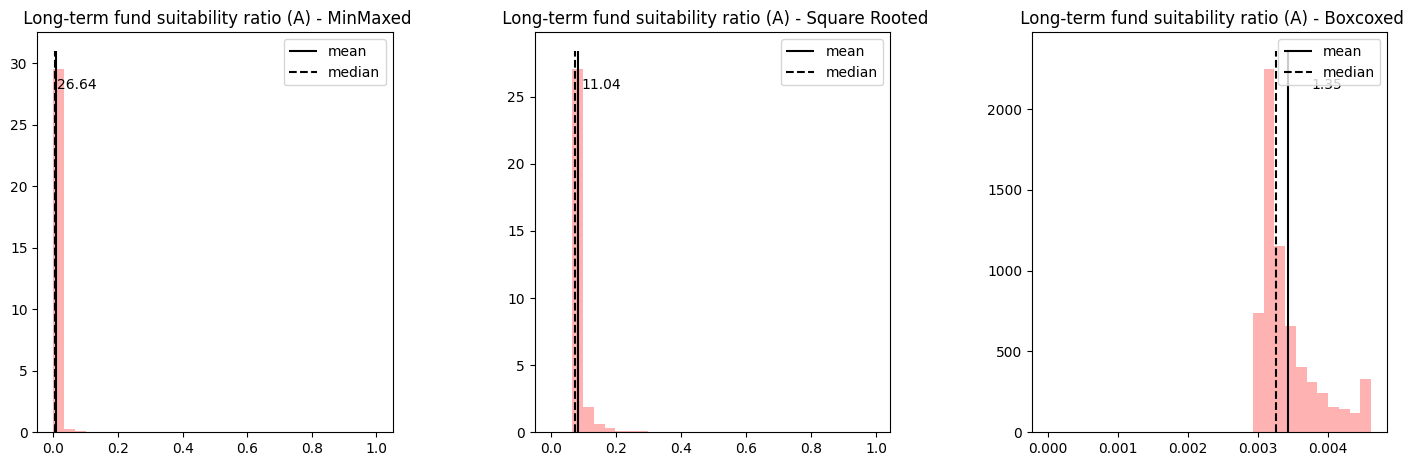

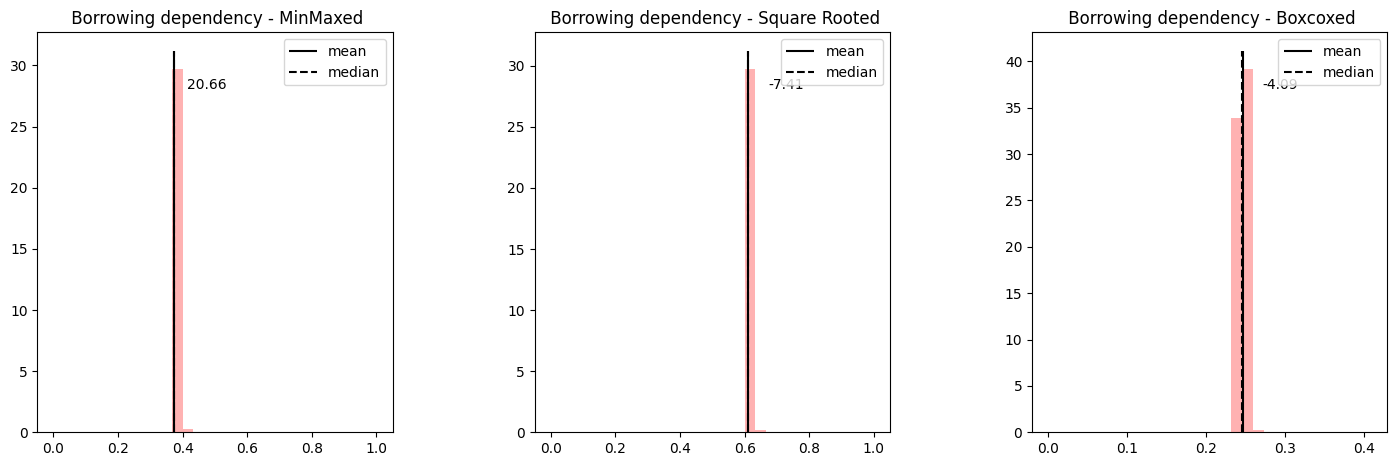

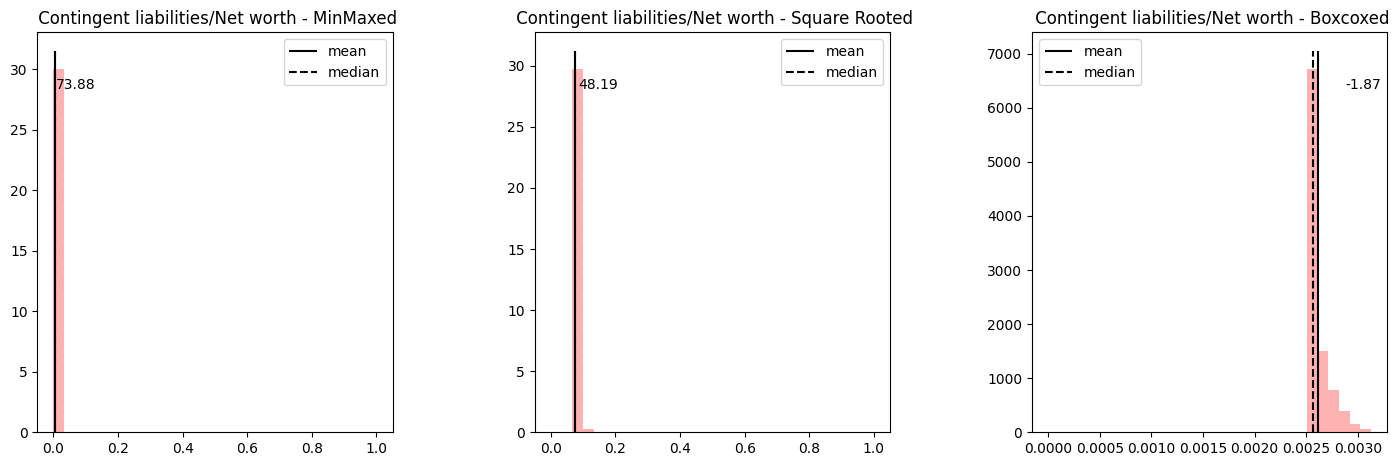

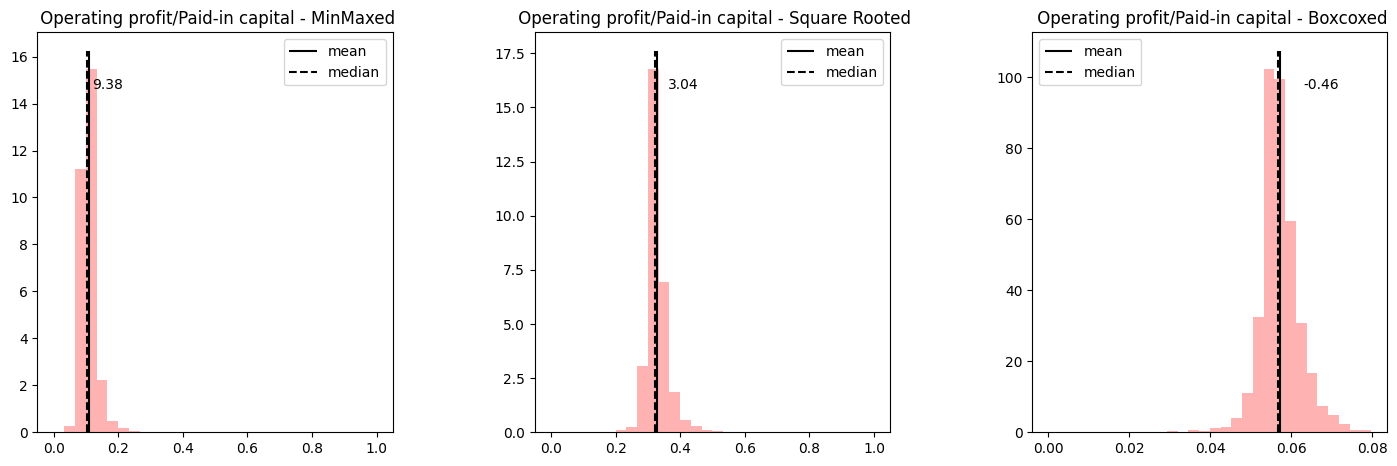

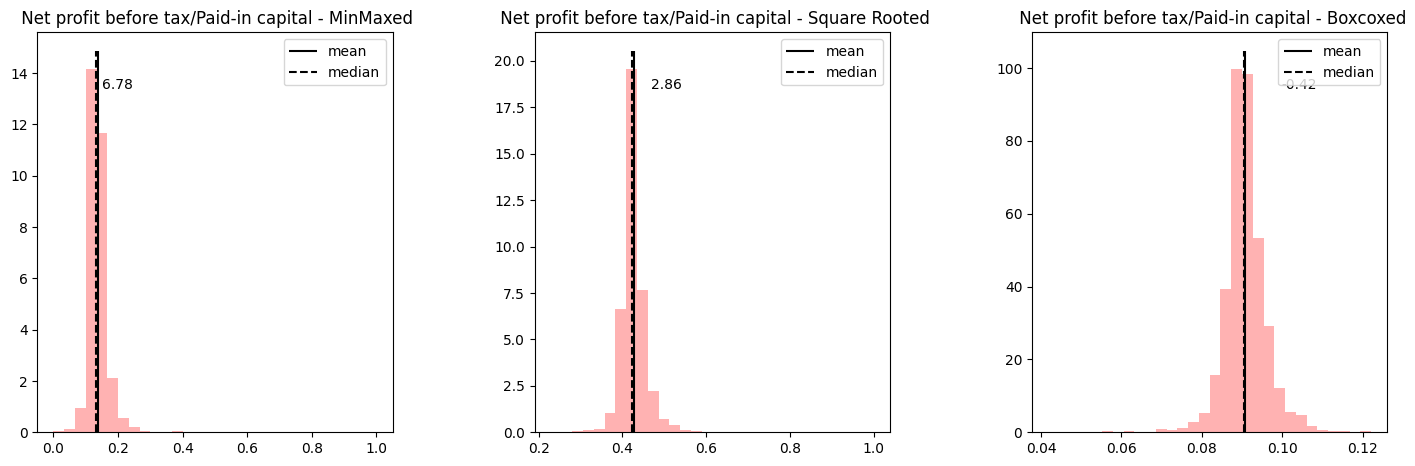

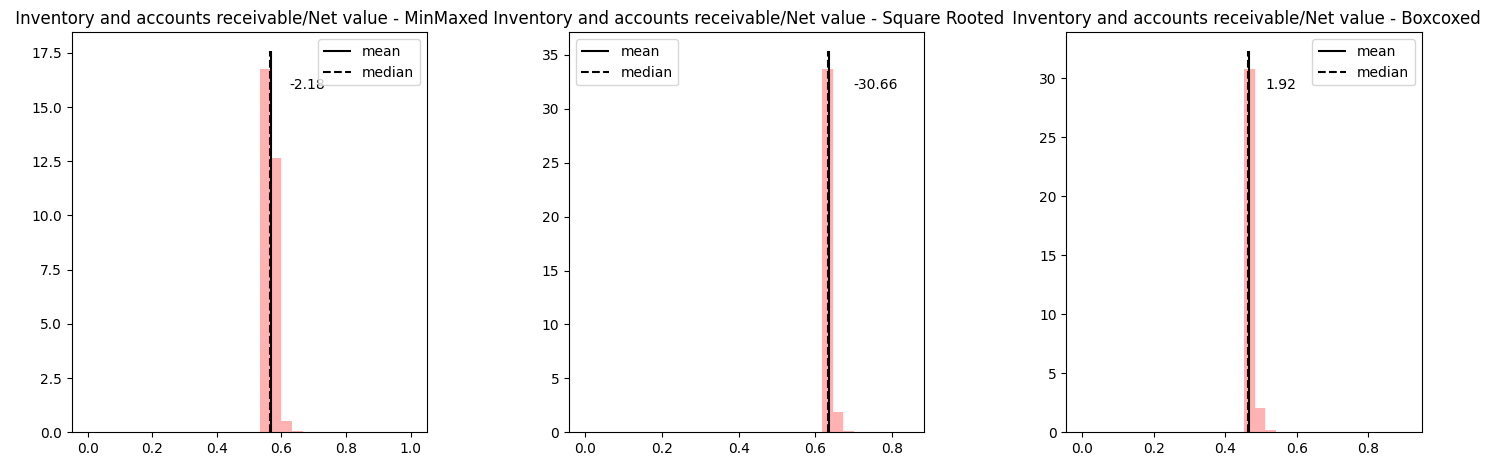

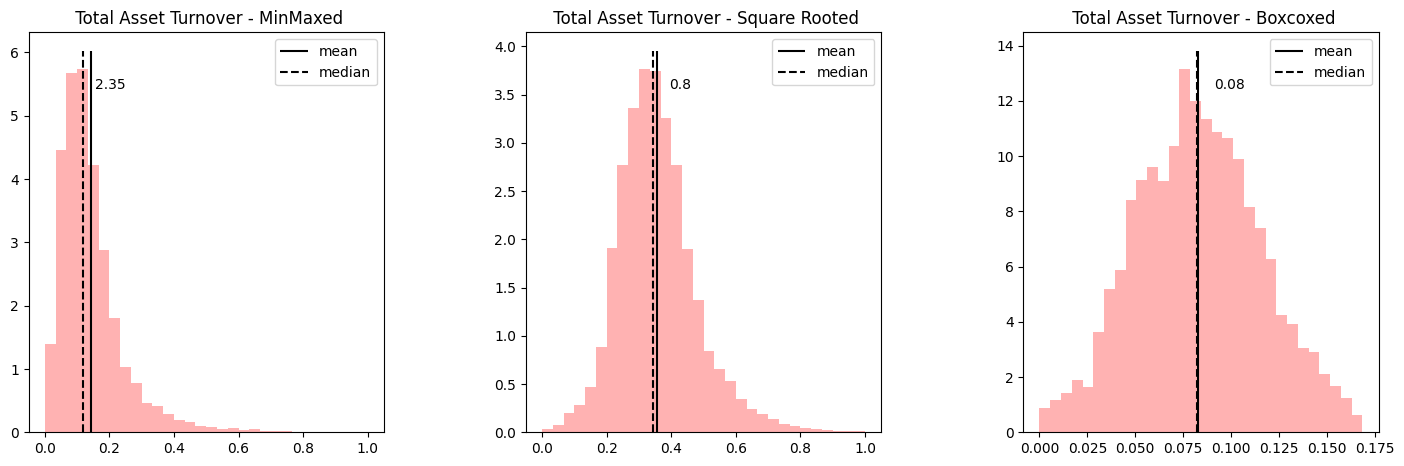

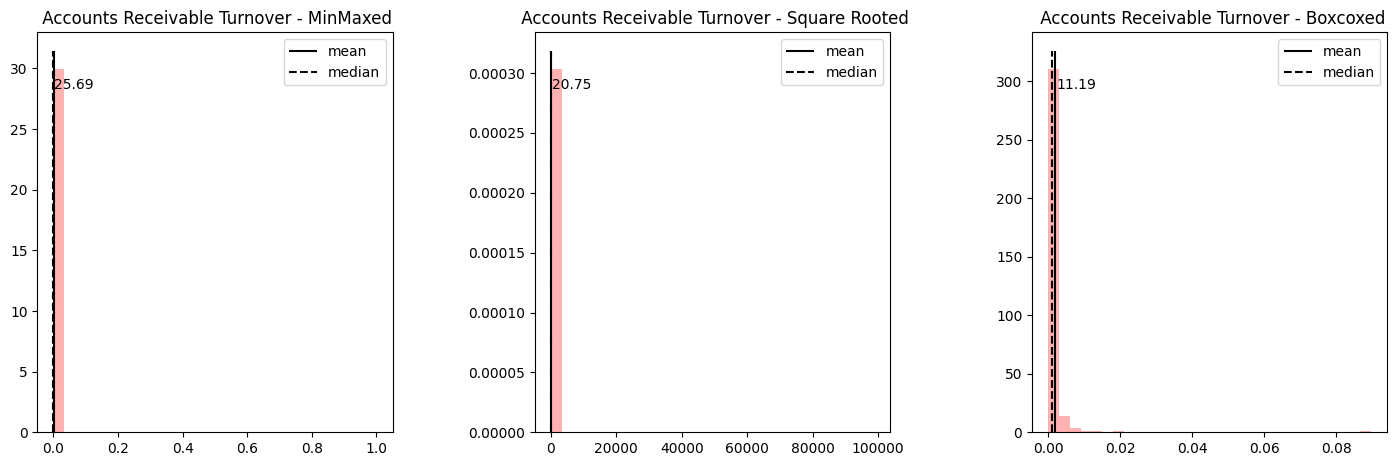

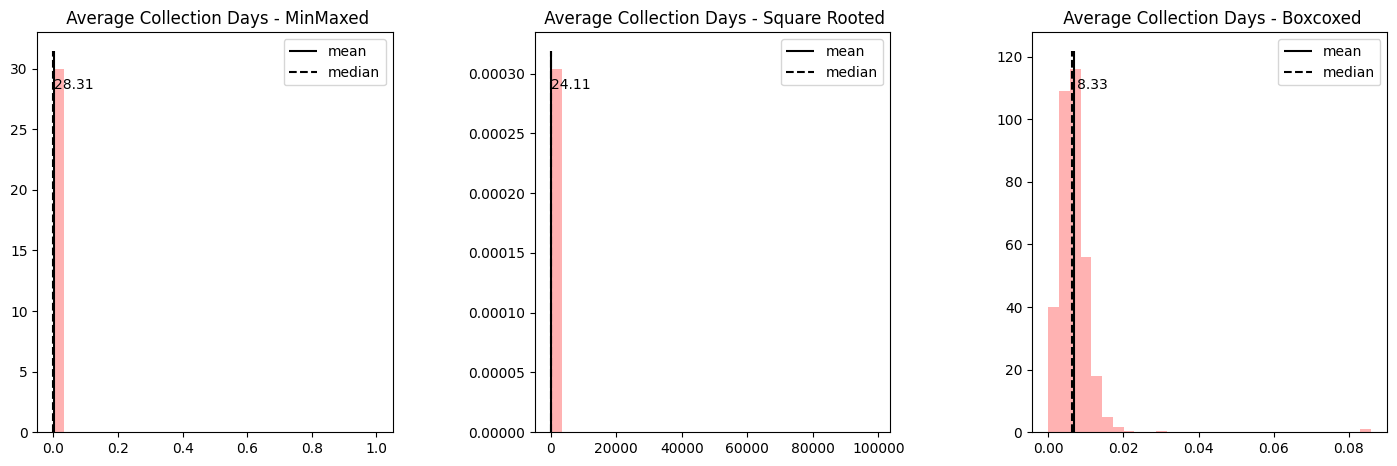

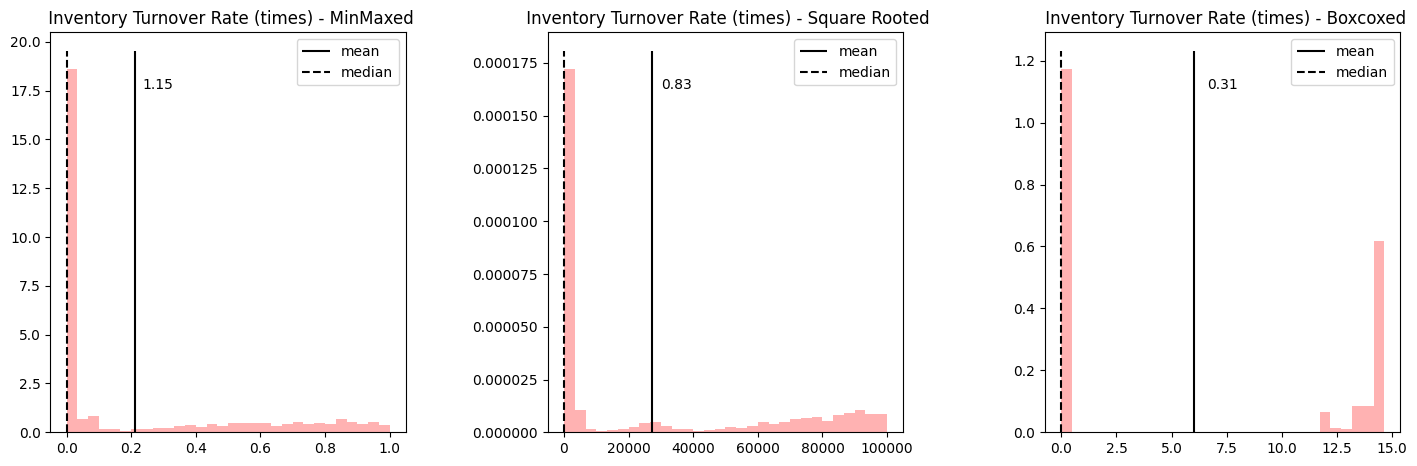

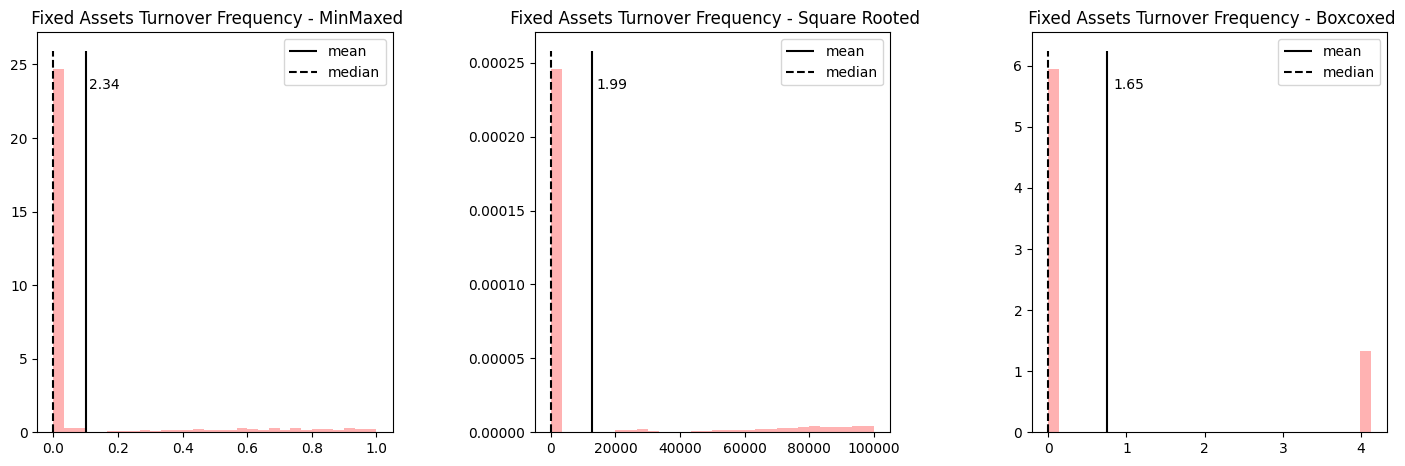

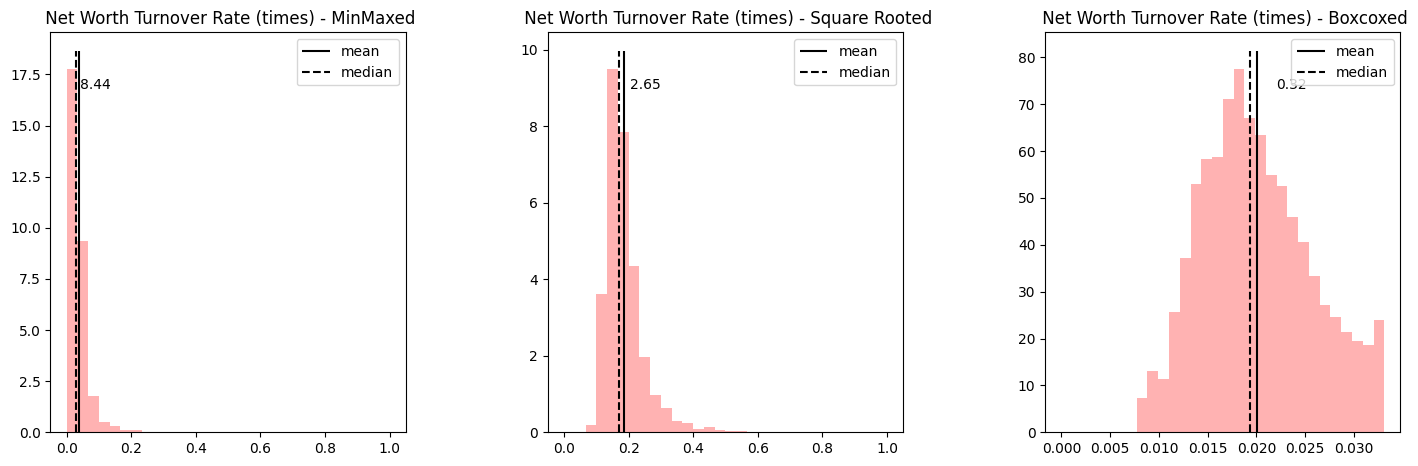

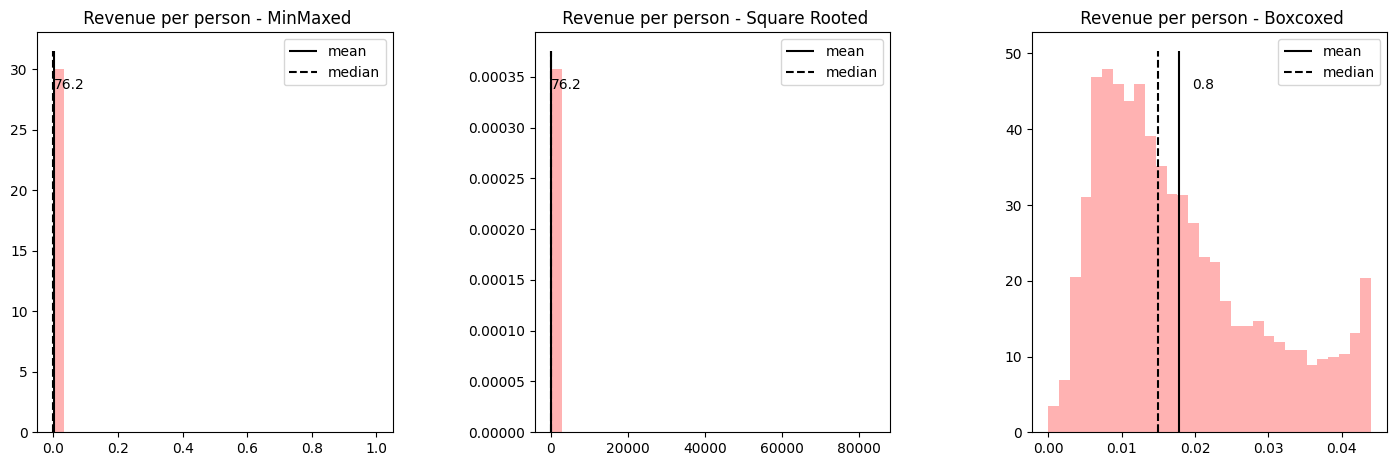

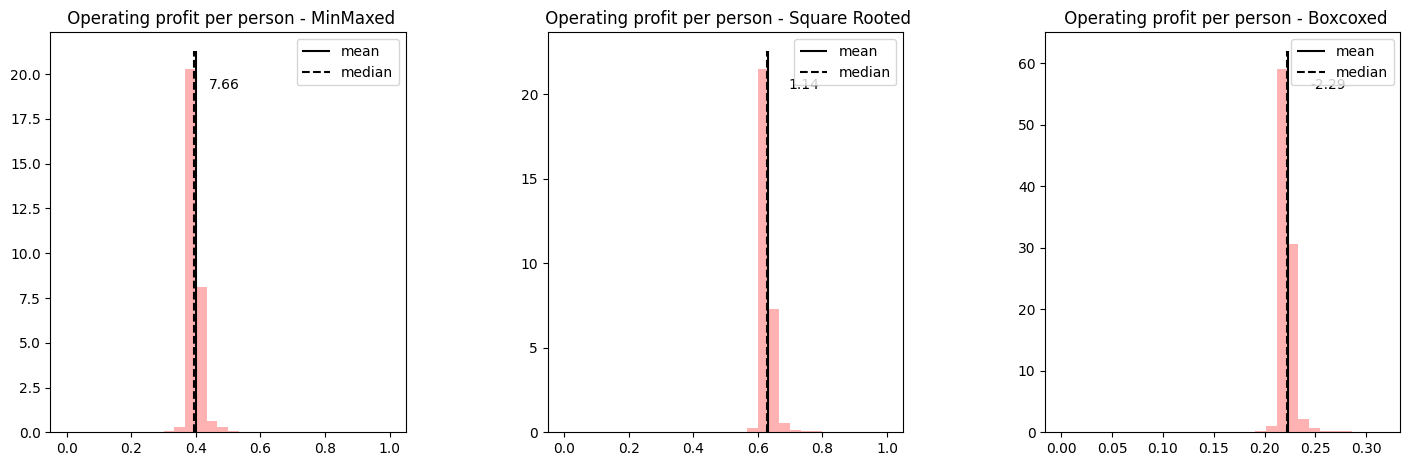

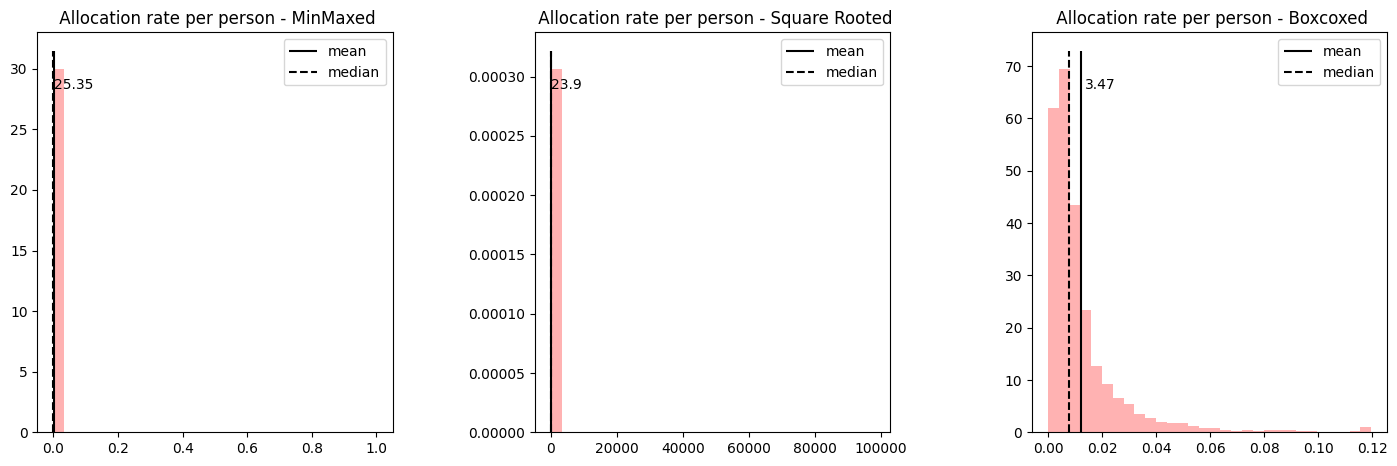

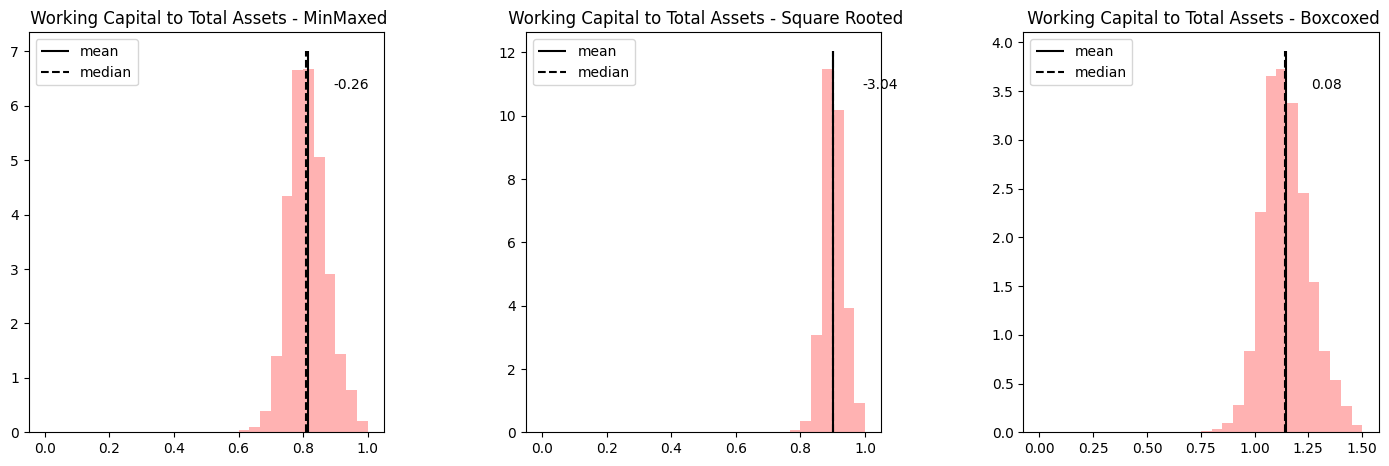

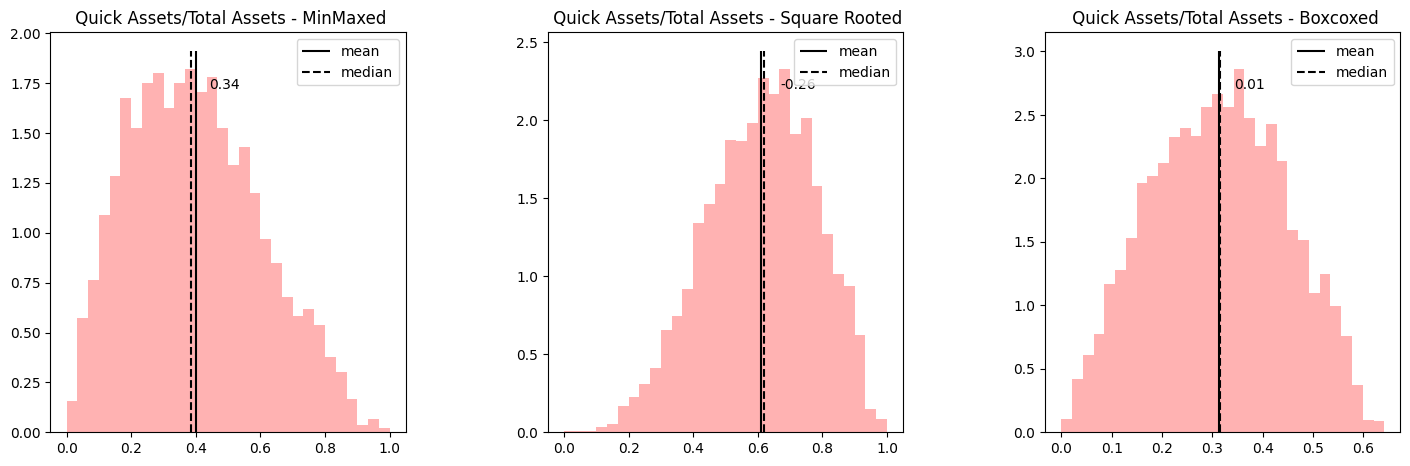

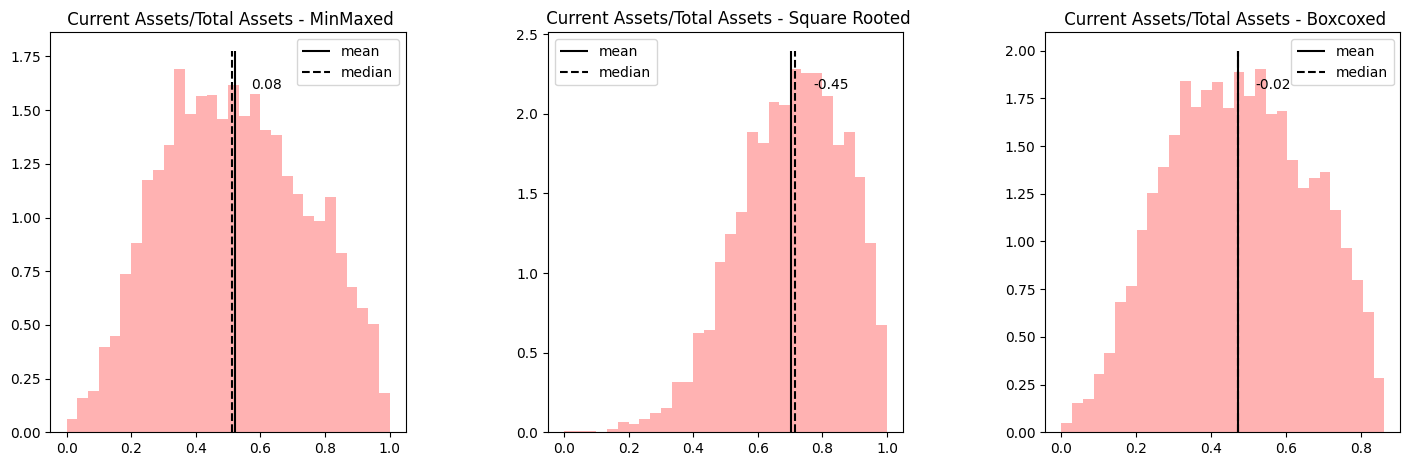

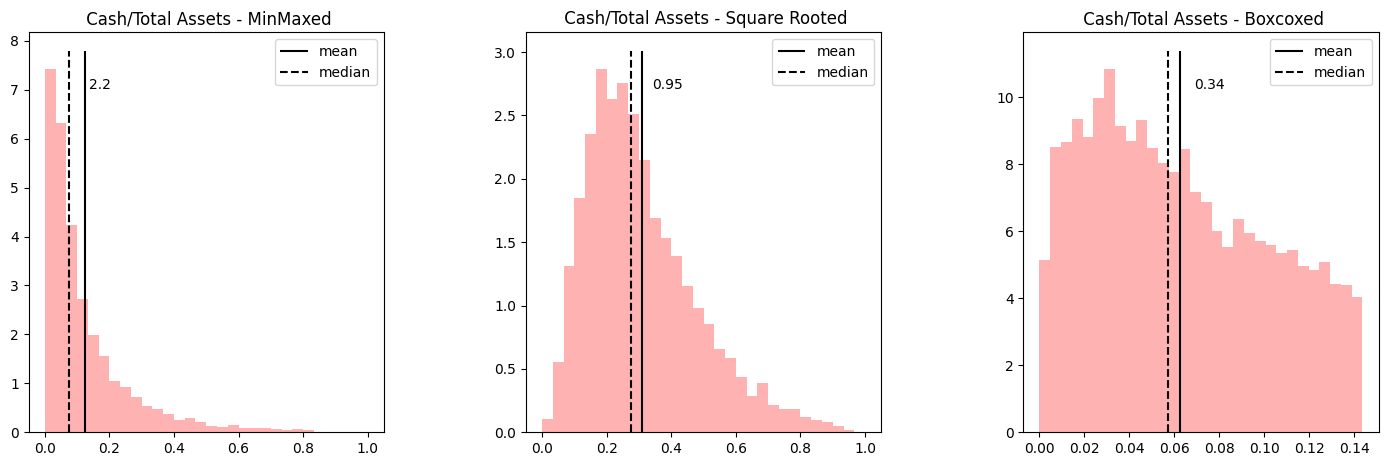

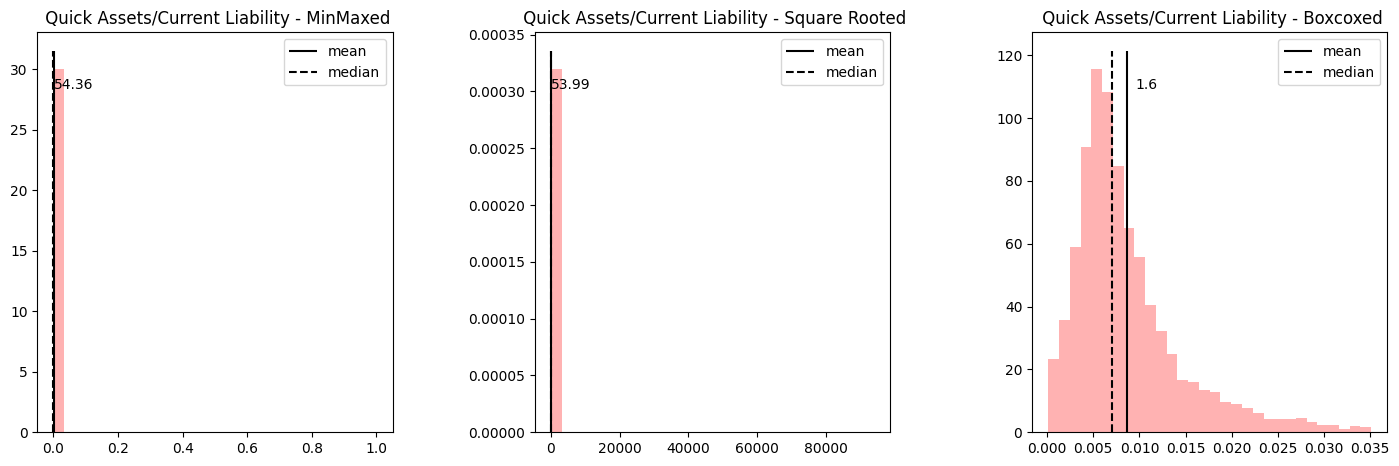

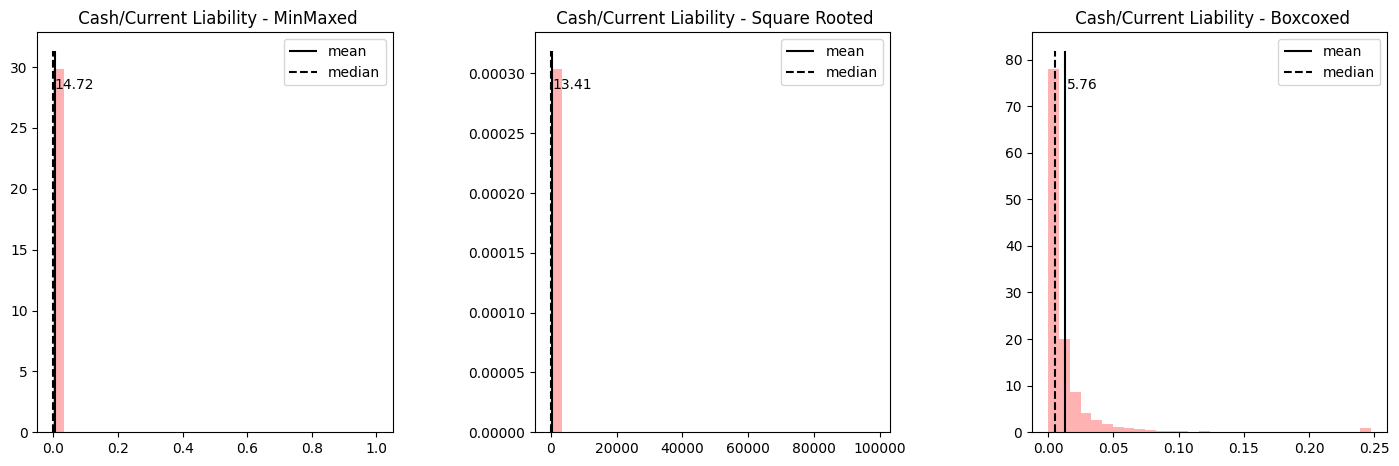

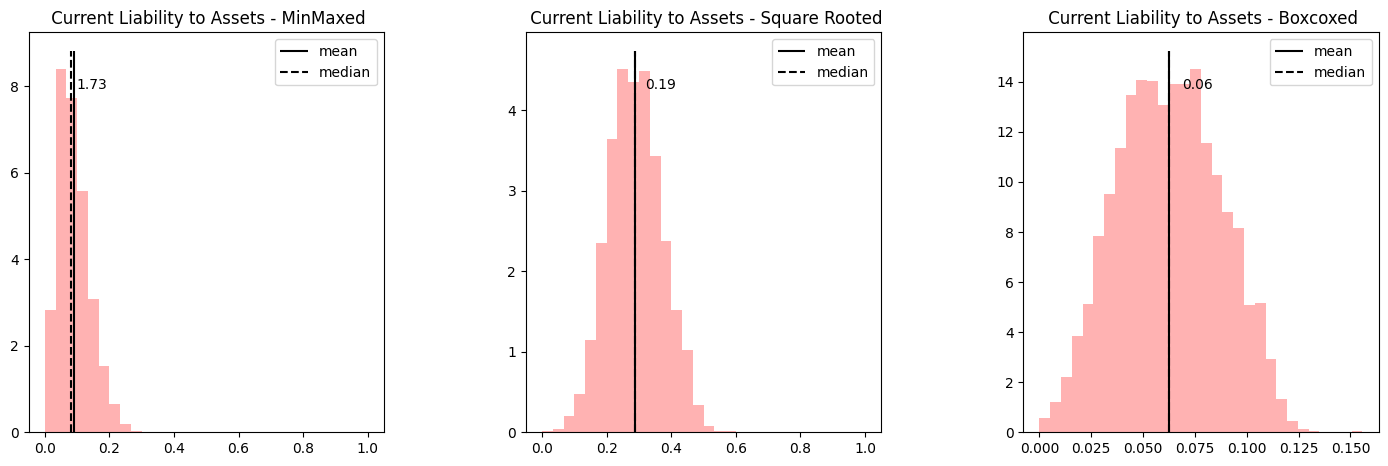

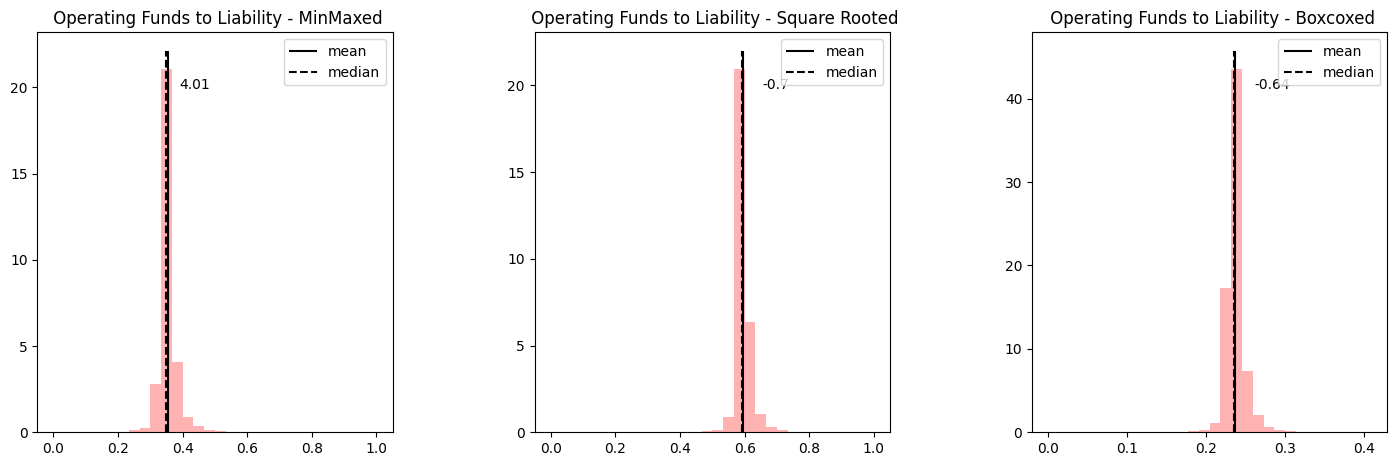

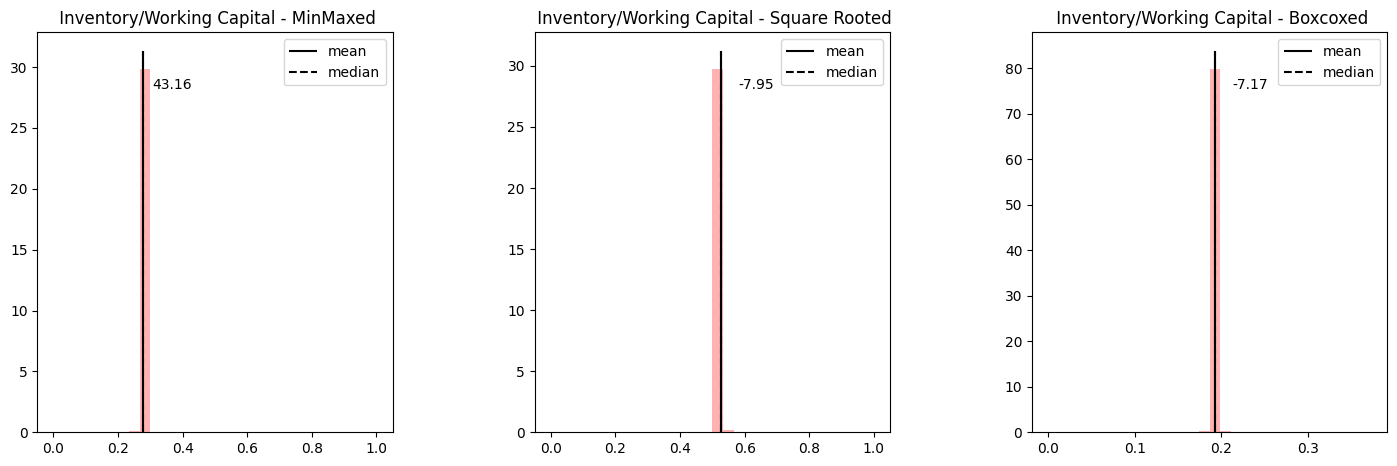

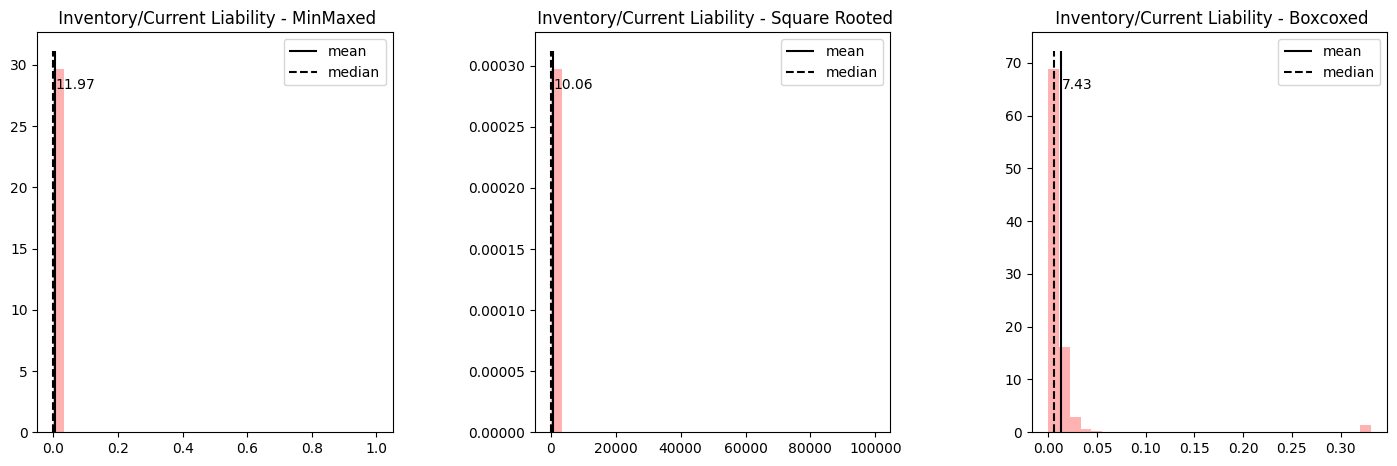

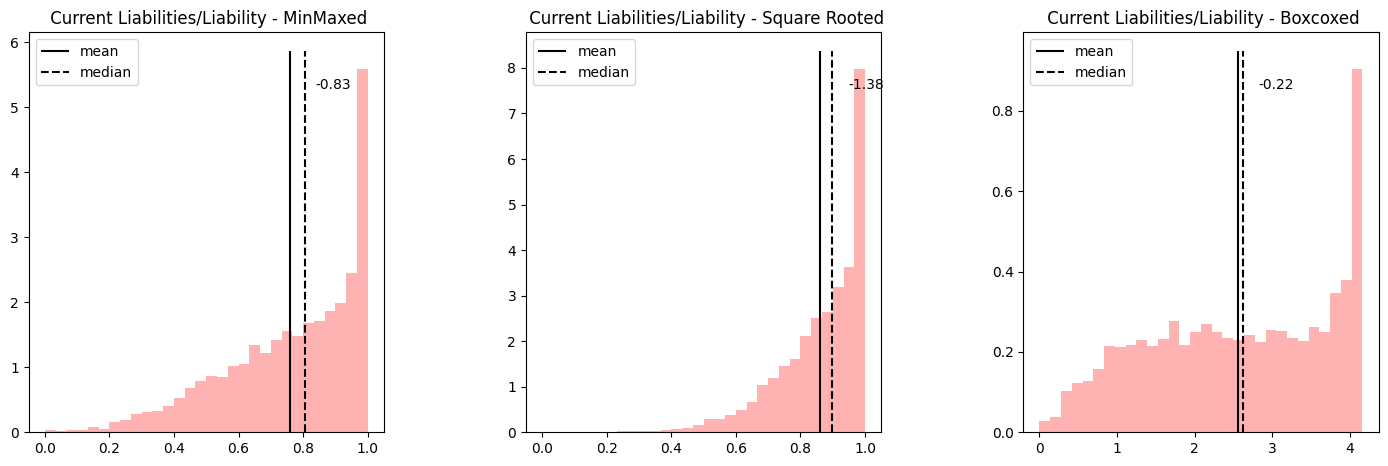

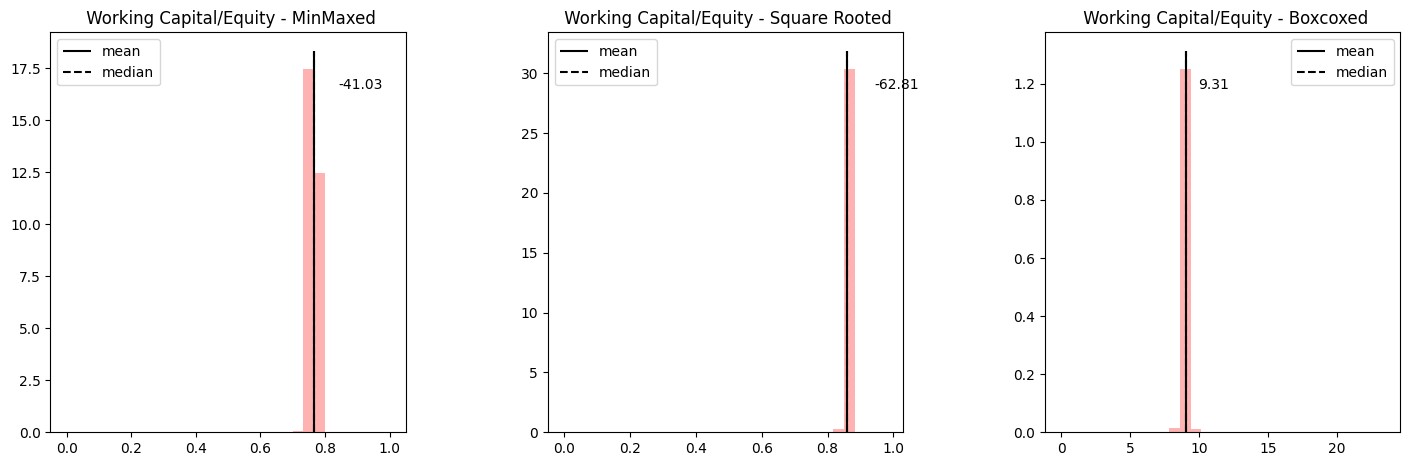

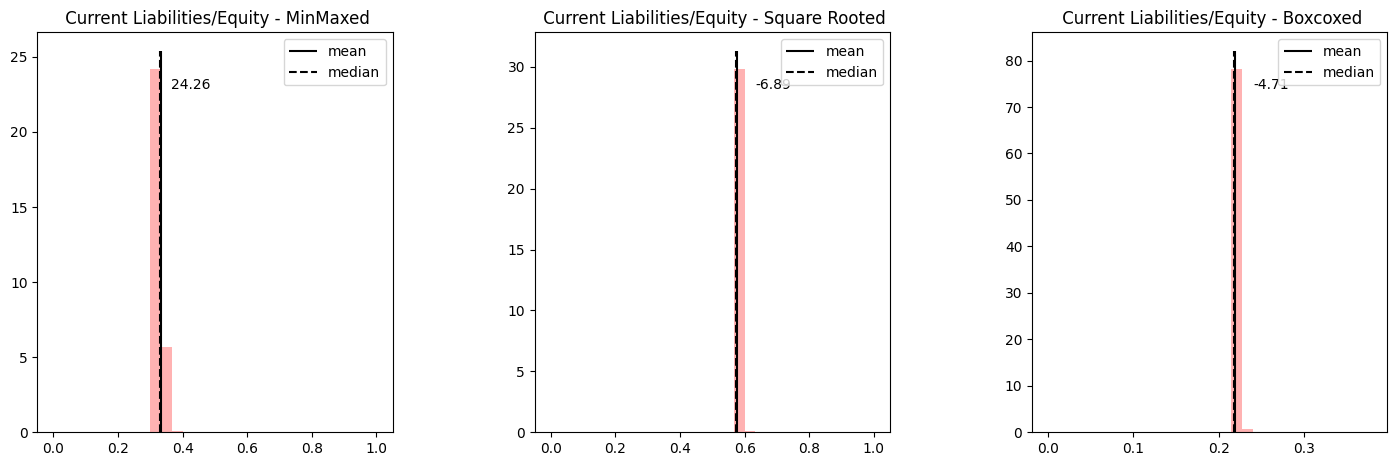

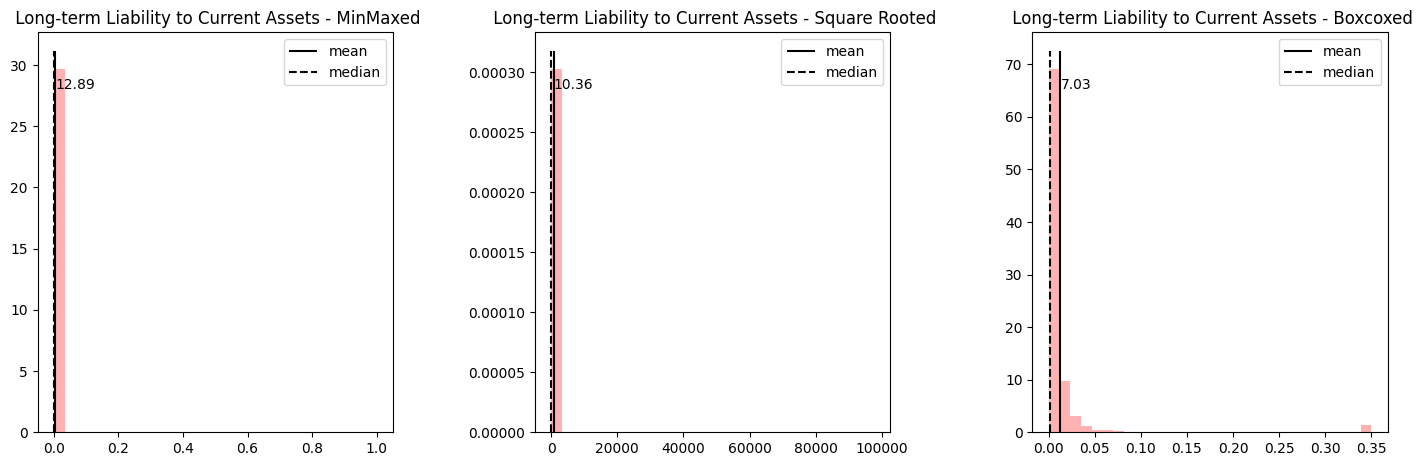

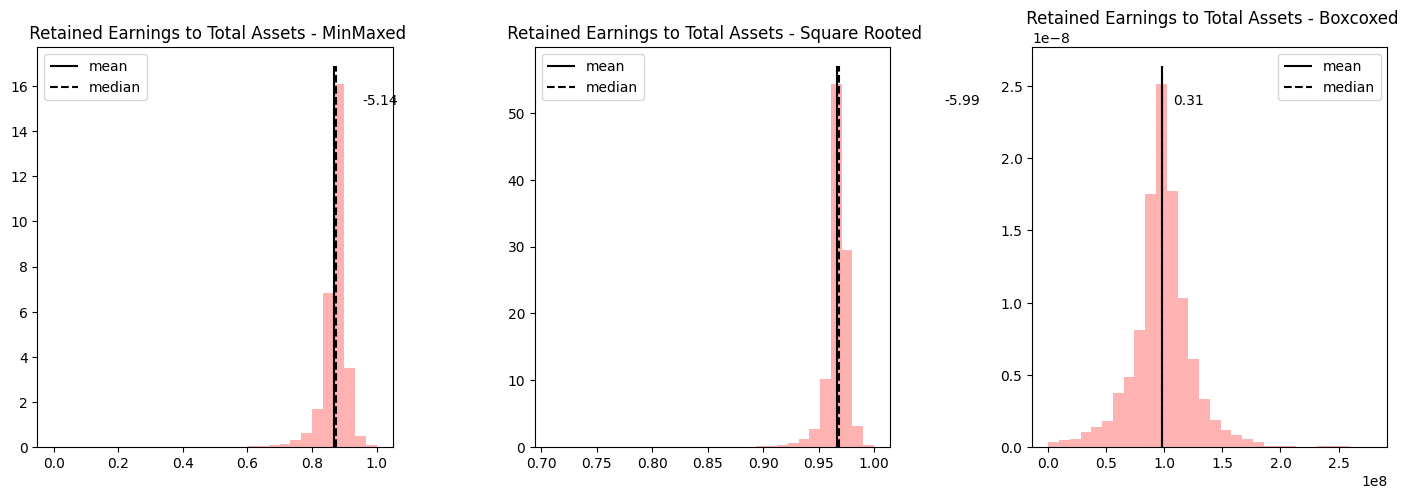

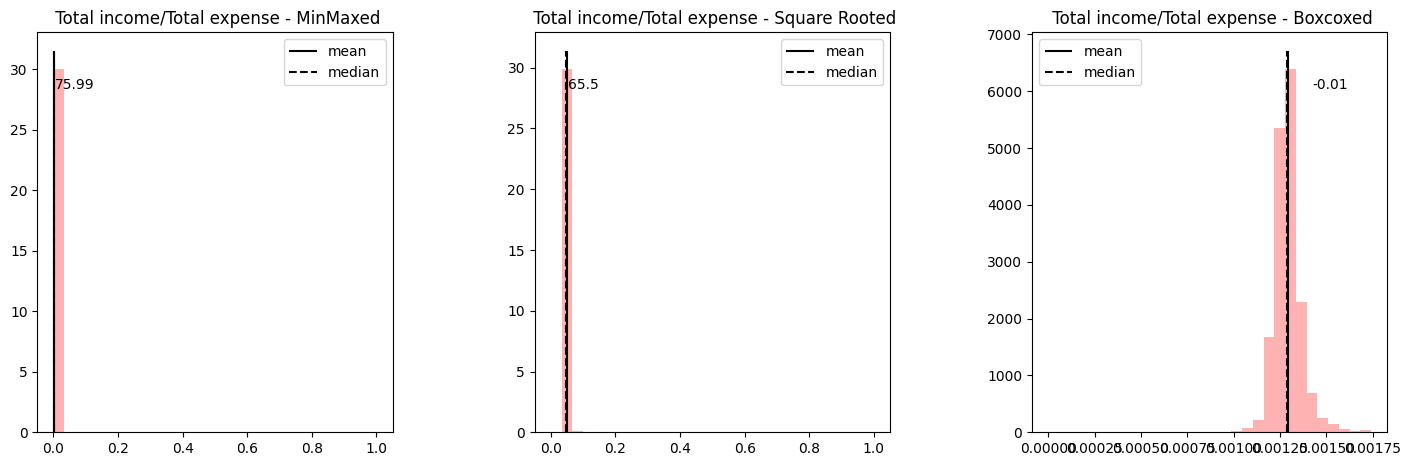

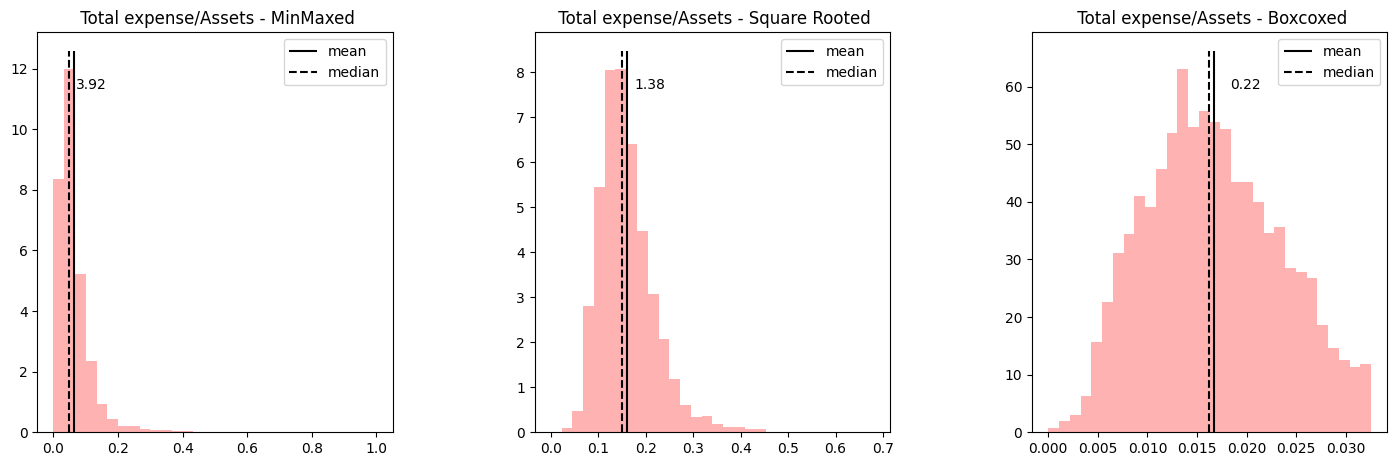

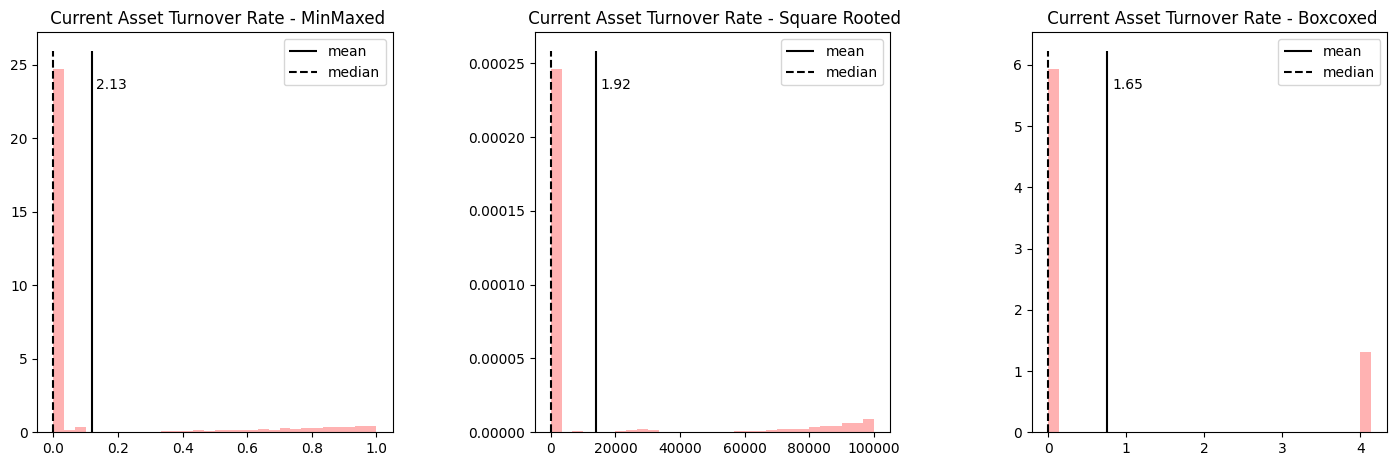

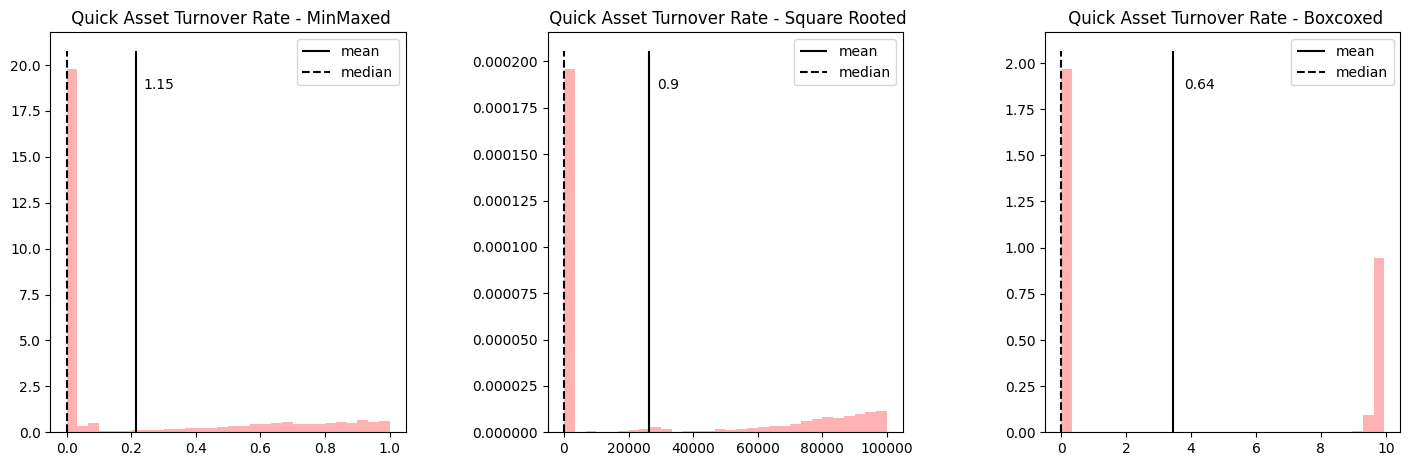

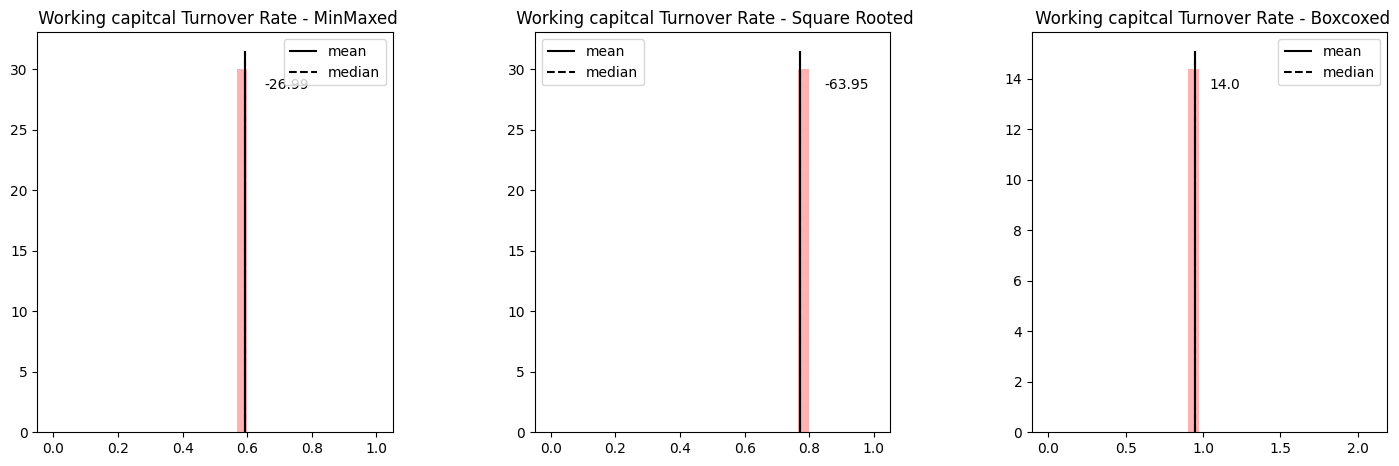

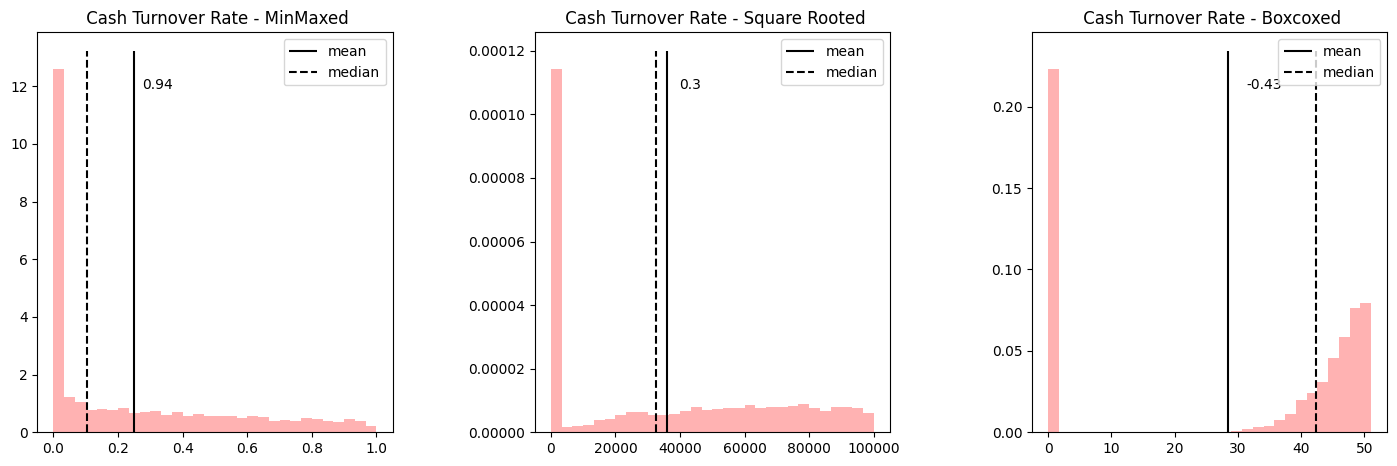

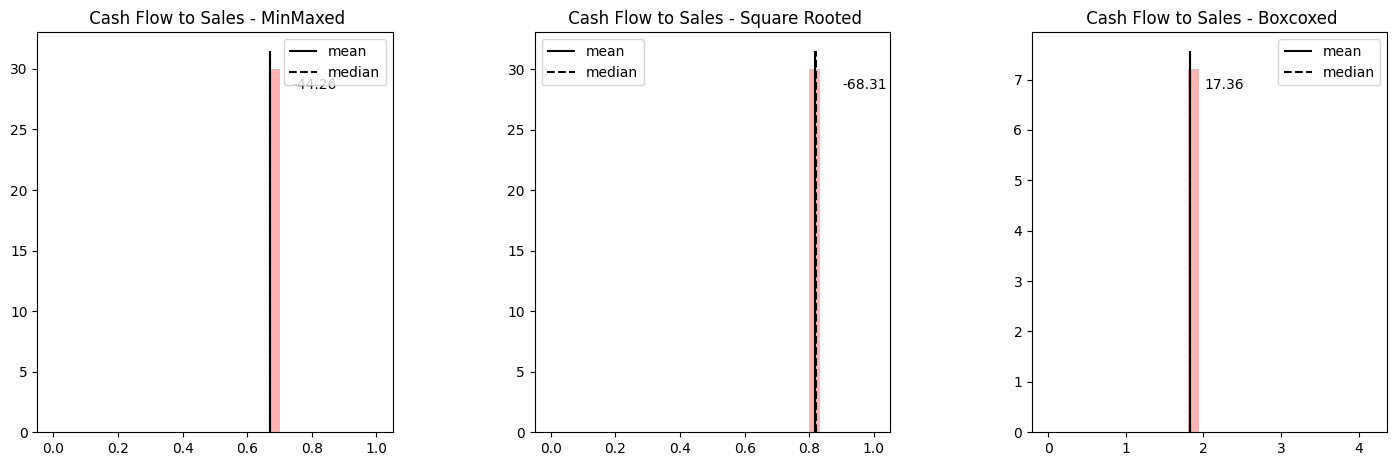

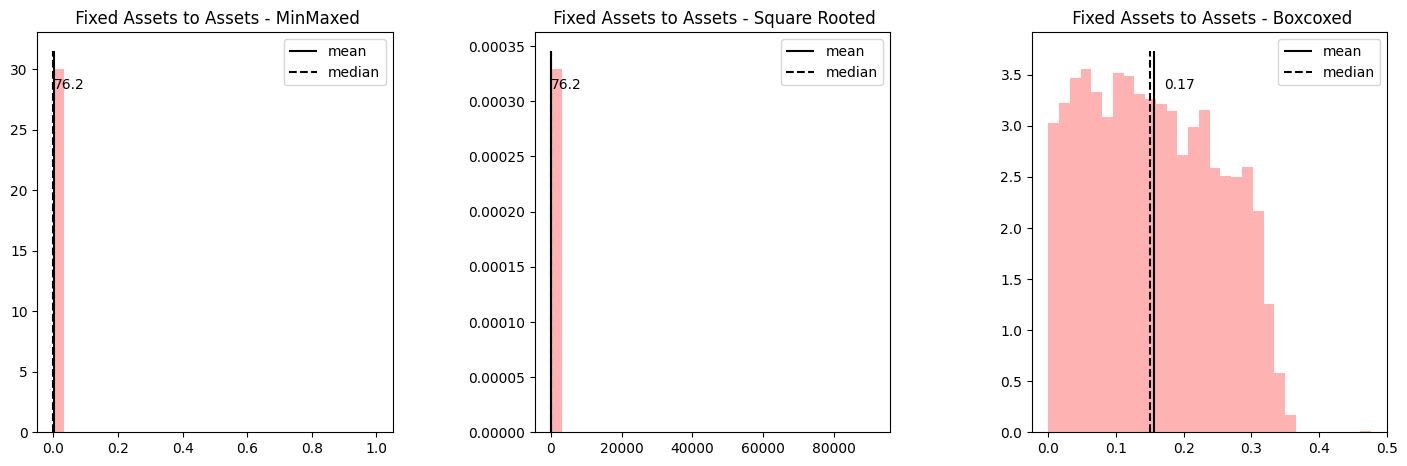

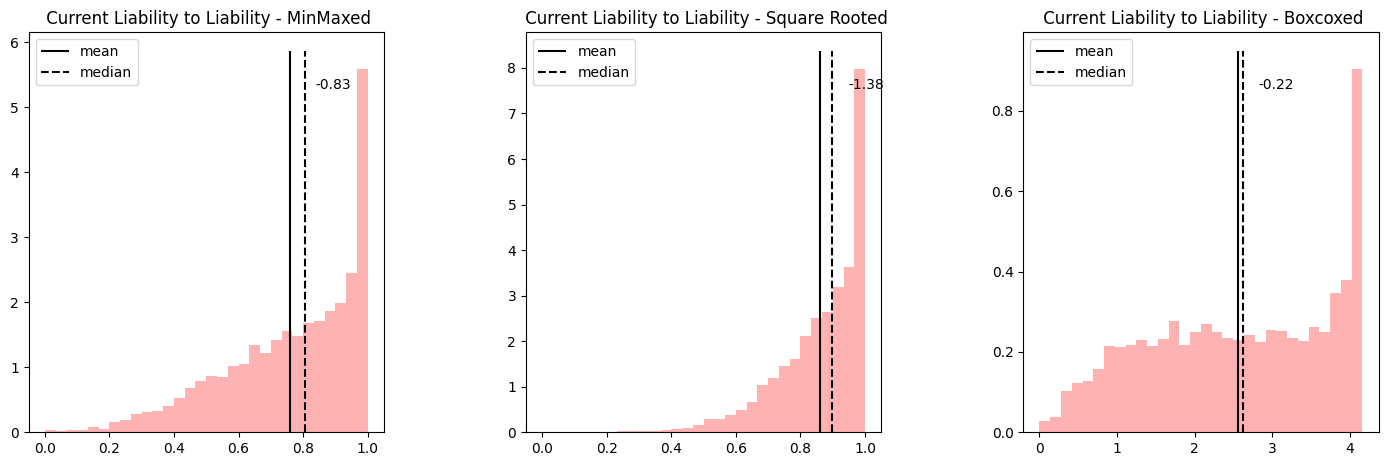

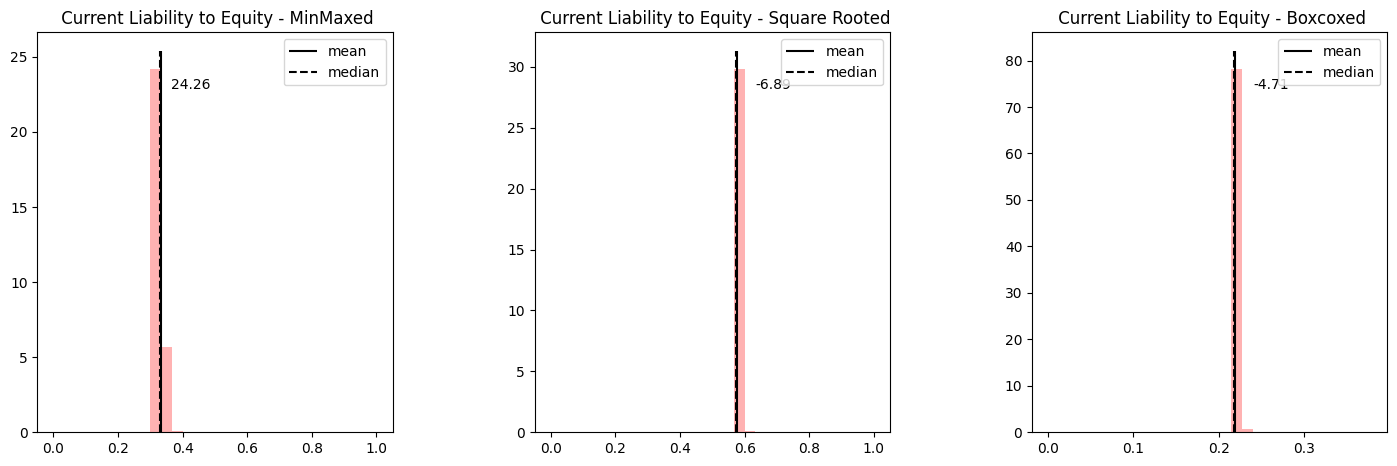

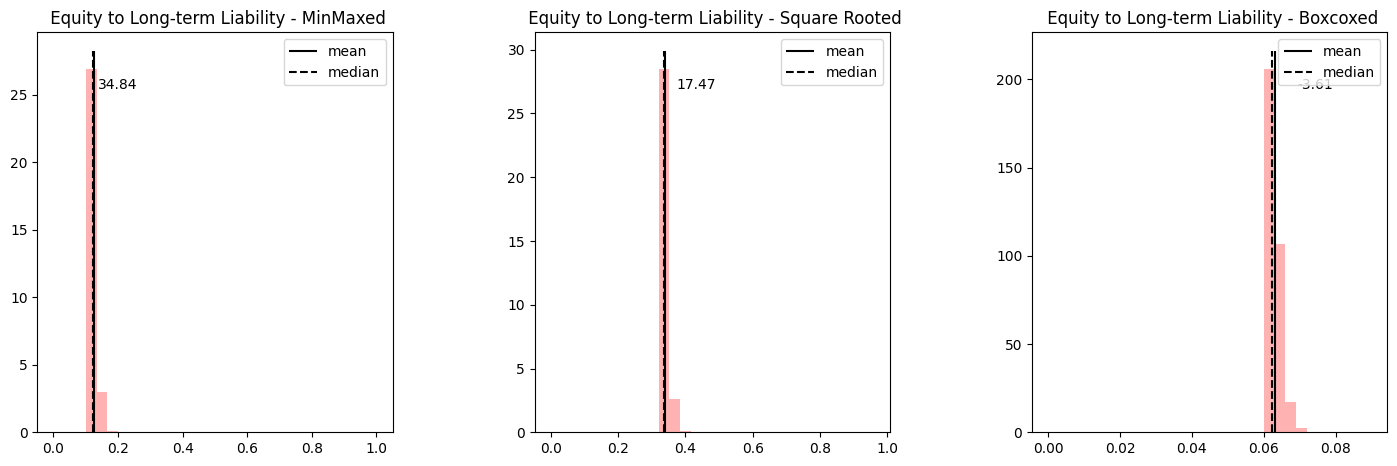

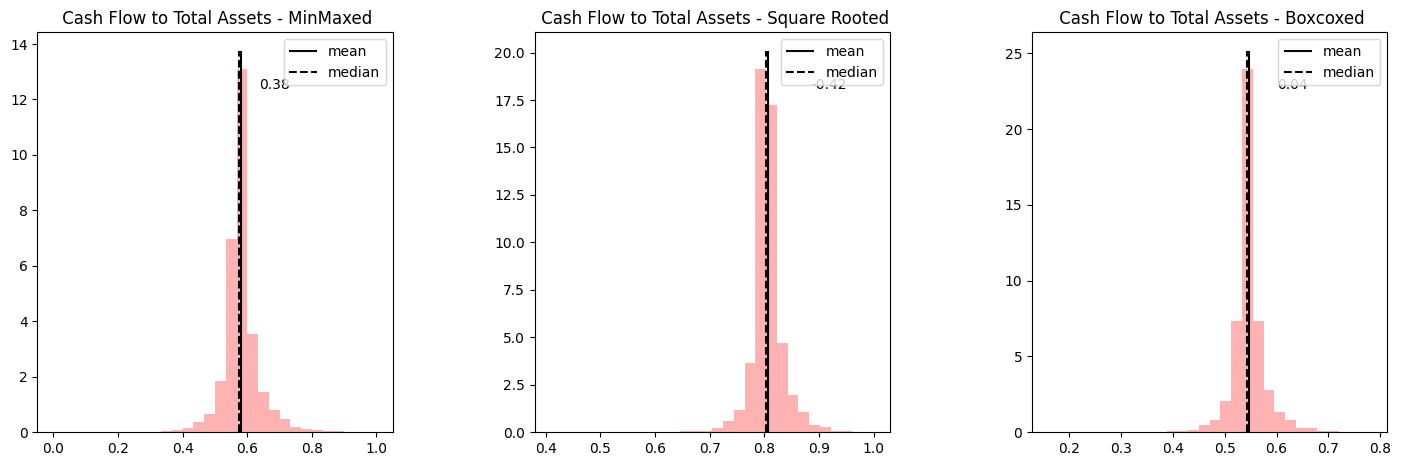

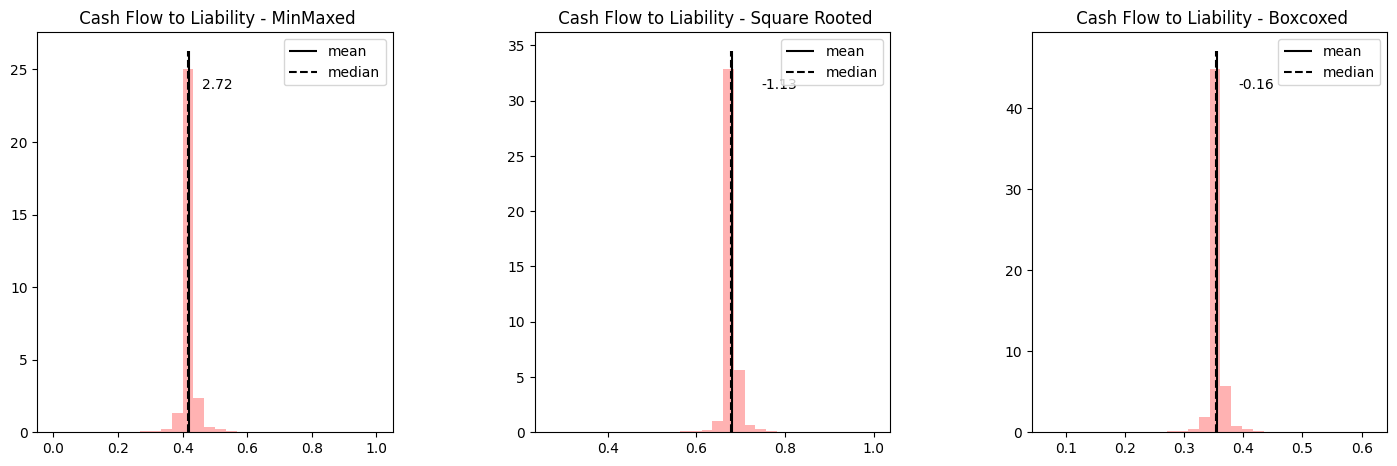

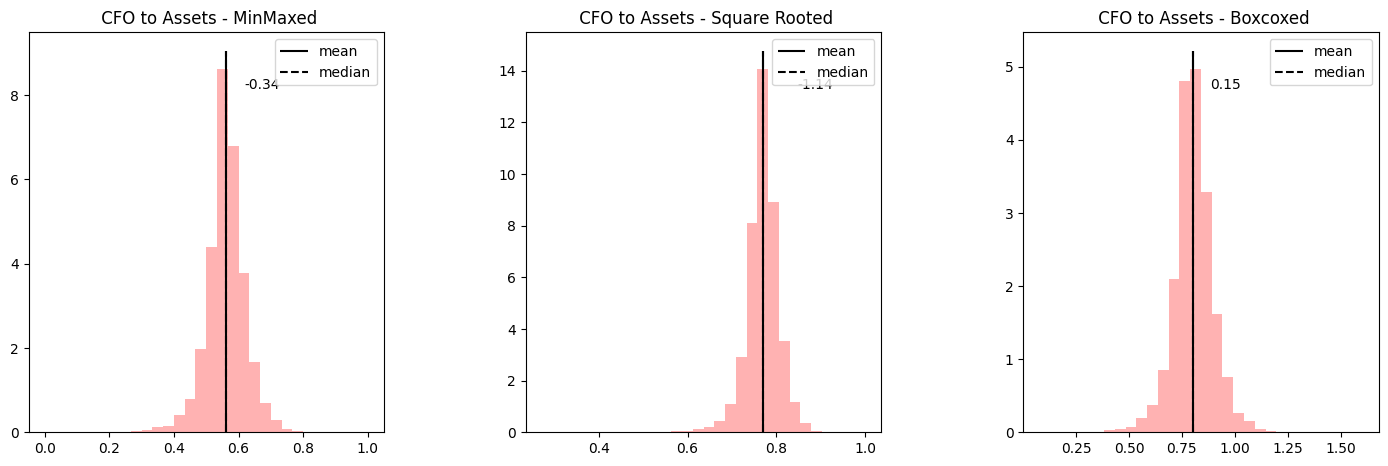

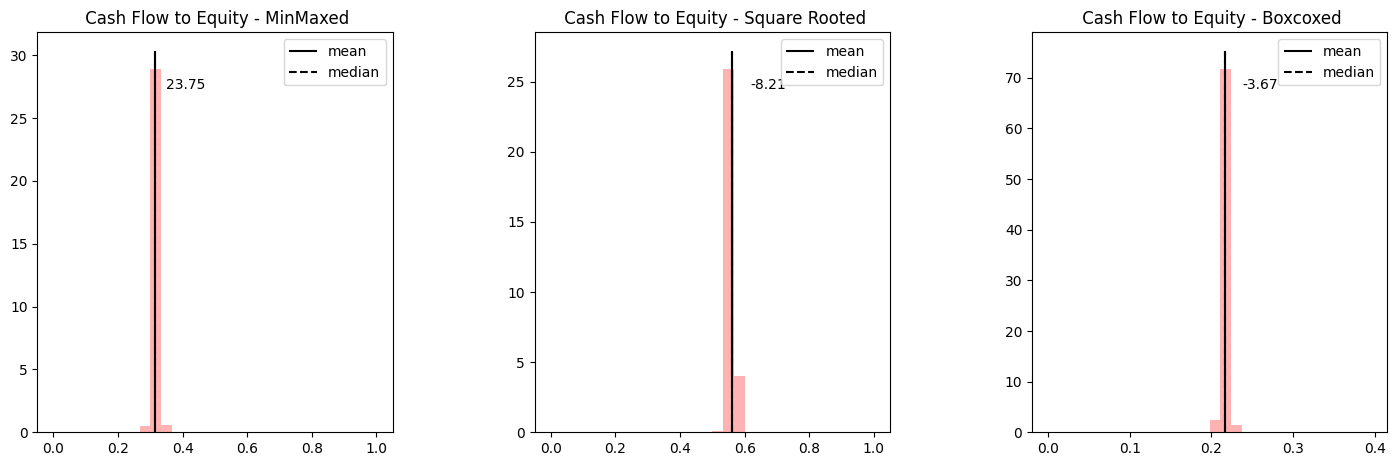

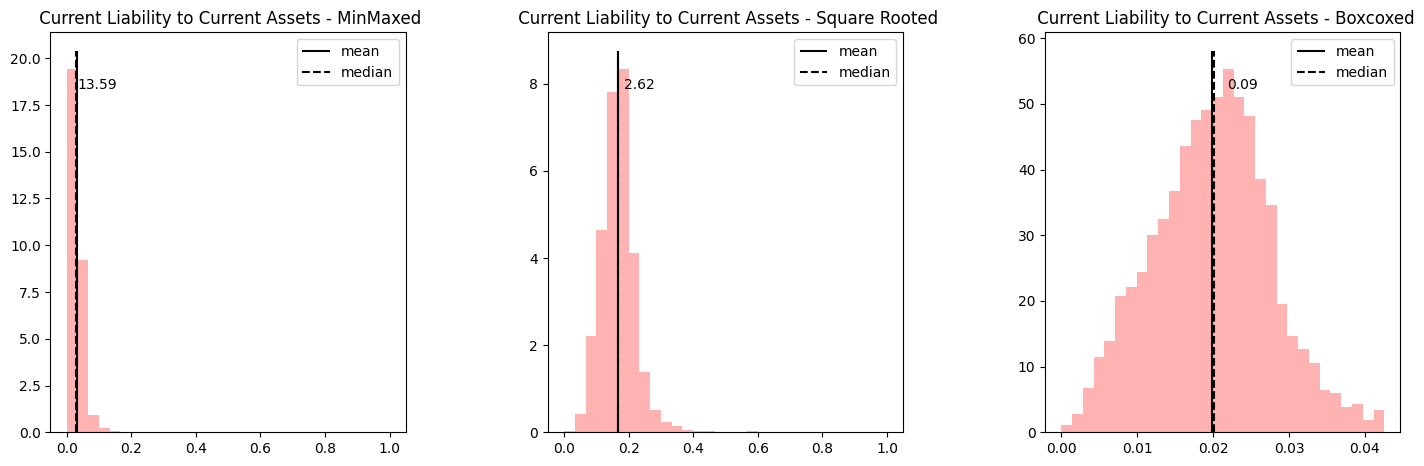

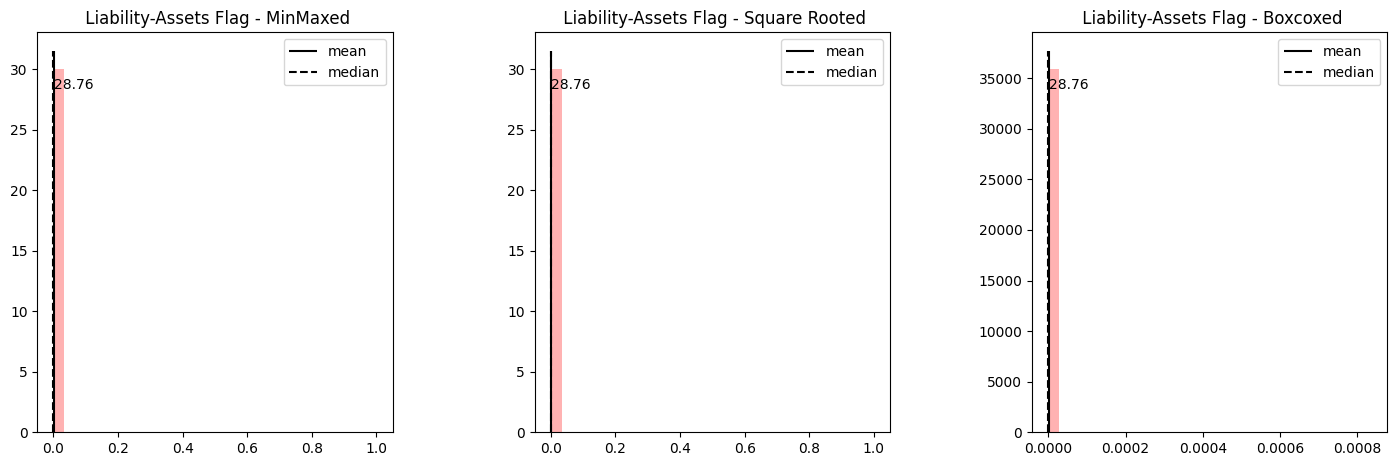

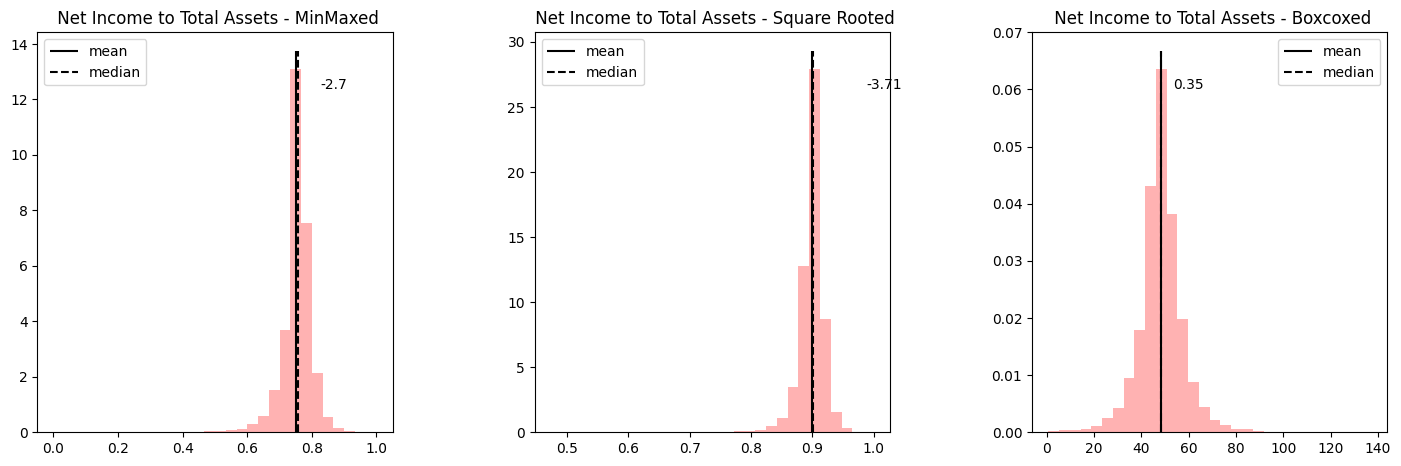

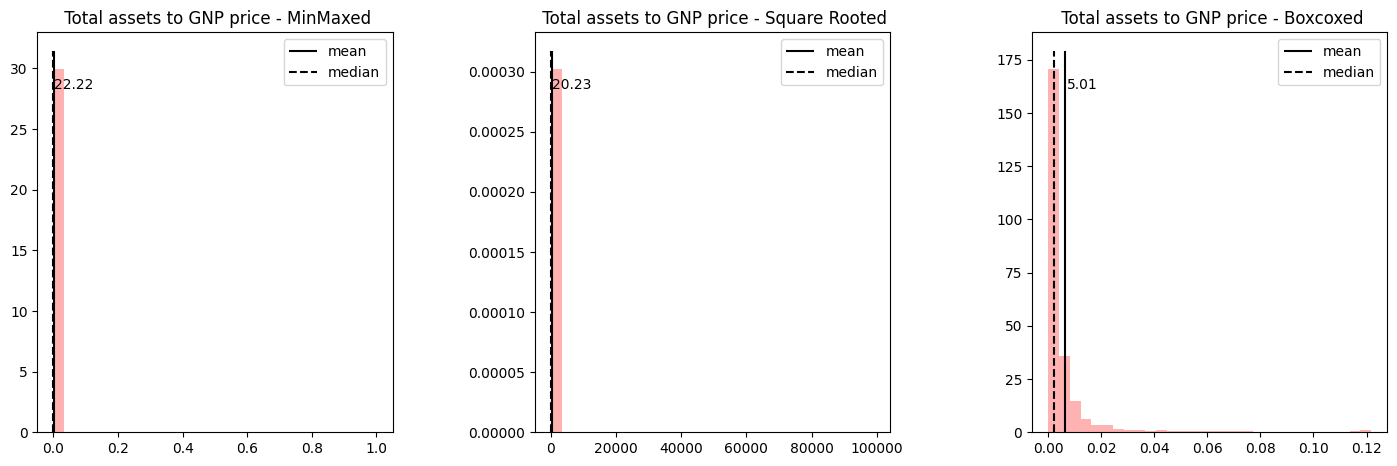

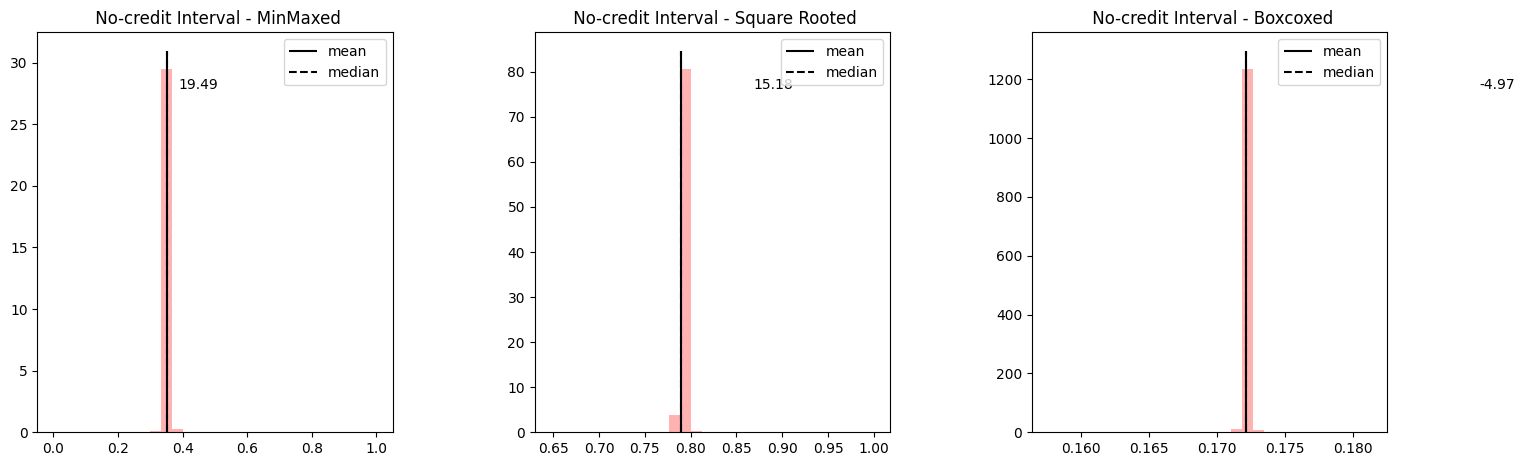

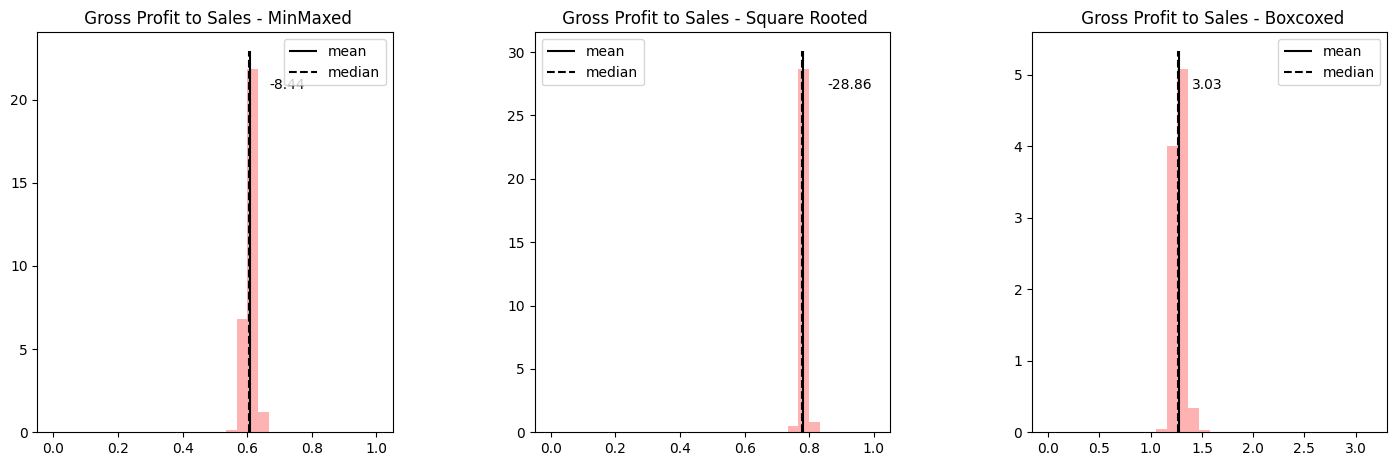

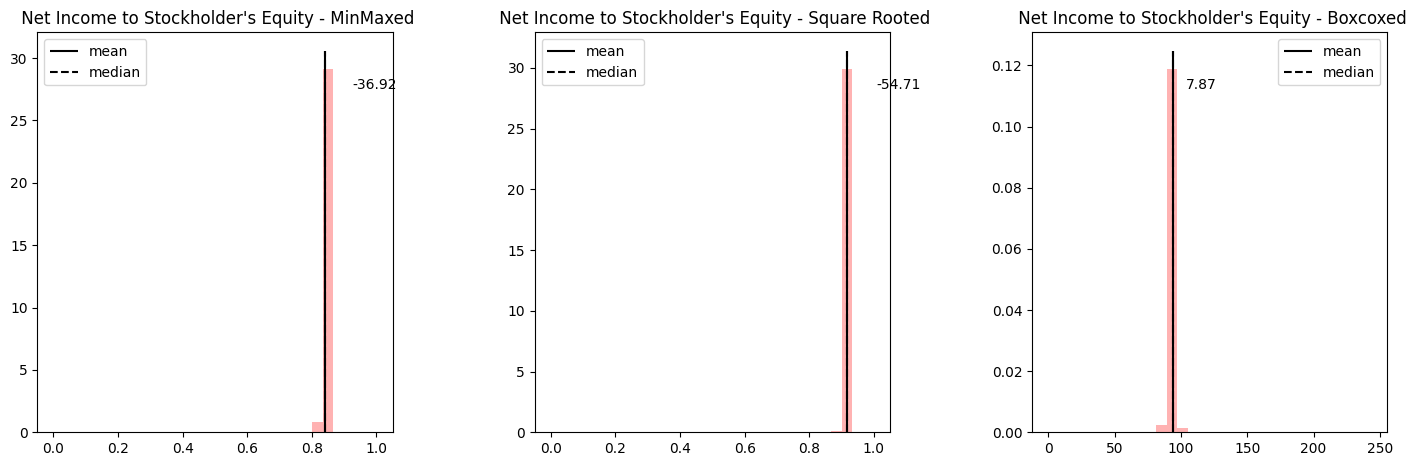

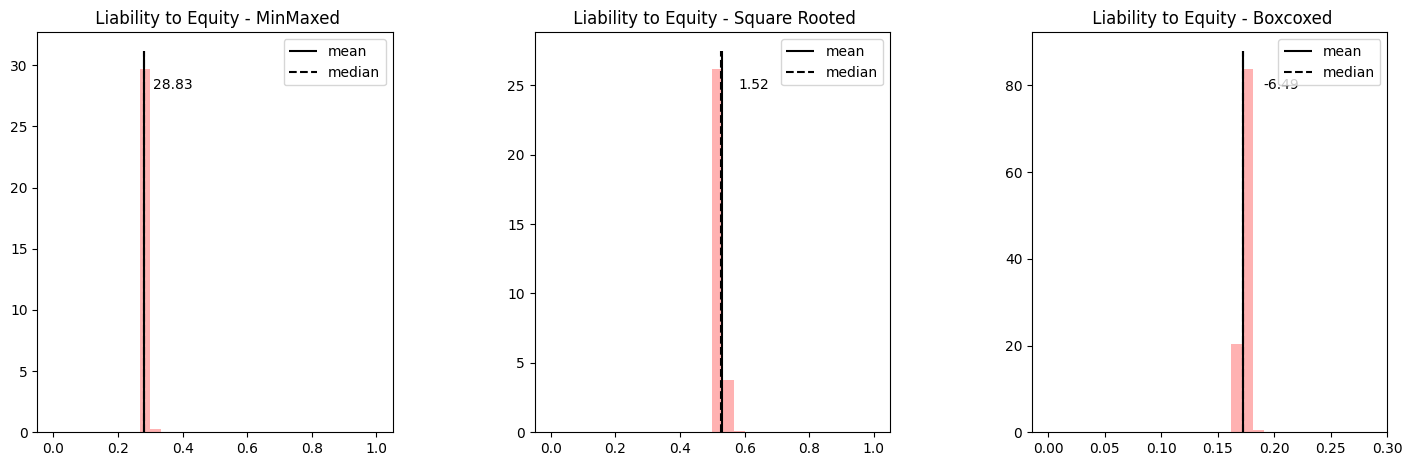

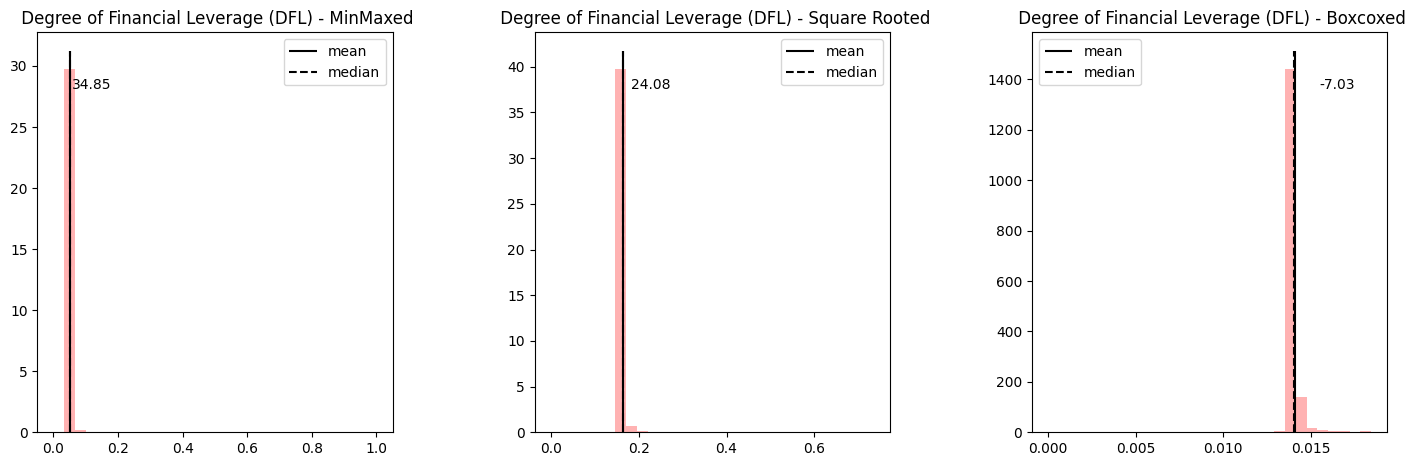

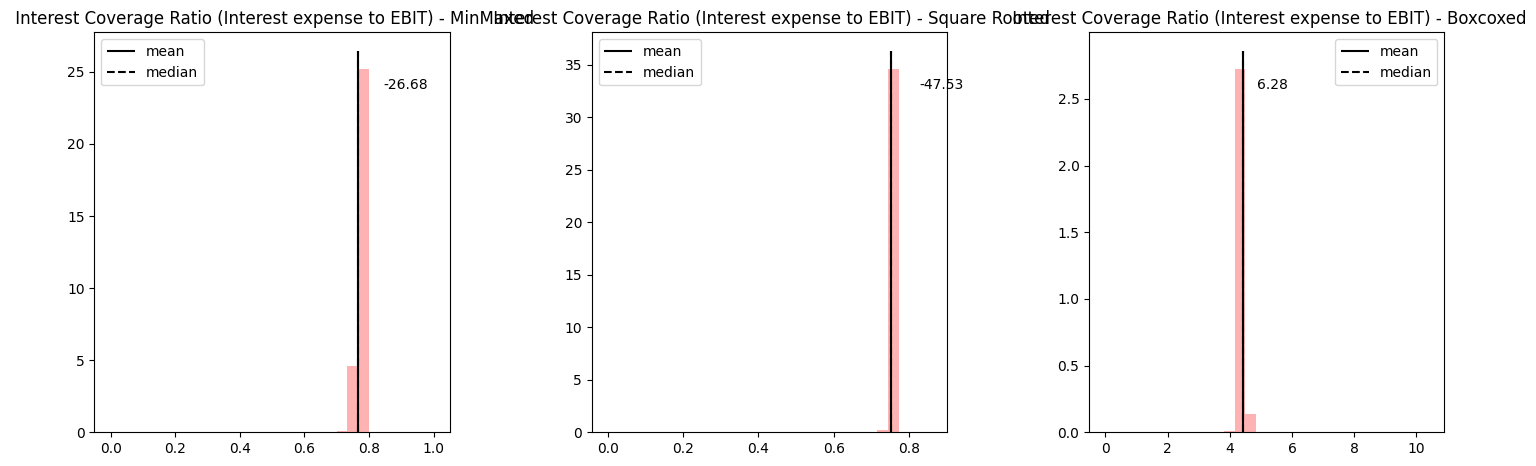

Error processing column  Net Income Flag.


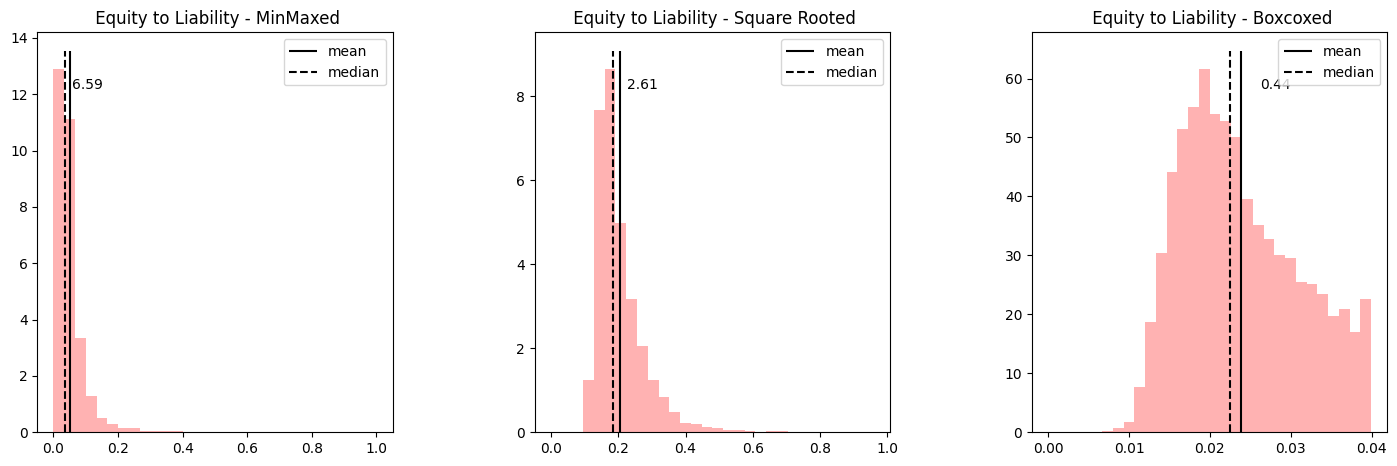

In [119]:
import scipy.stats as stats
for column in X_train.columns:
    try:
        X = X_train[column]
        random2 = (X - X.min()) / (X.max() - X.min())
        random3 = np.sqrt(X)
        random4, _ = stats.boxcox(X + 1)  # Adding 1 to avoid issues with zero values
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        for ax, random, rd in zip([ax1, ax2, ax3], [random2, random3, random4], ['MinMaxed', 'Square Rooted', 'Boxcoxed']):
            ax.hist(random, 30, density=True, color='red', alpha=0.3)
            y_min, y_max = ax.get_ylim()
            ax.vlines(np.mean(random), y_min, y_max, color='black', label='mean')
            ax.vlines(np.median(random), y_min, y_max, color='black', linestyle='--', label='median')
            ax.text(np.mean(random) * 1.1, y_max * 0.90, round(pd.Series(random).skew(), 2), ha='left')
            ax.legend(loc='best')
            ax.set_title(f'{column} - {rd}')
        
        plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=0.9, wspace=0.4, hspace=0.4)
        plt.show()
    except:
        print(f"Error processing column {column}.")



We see in all of these cases, the box cox transformation rescales the data a lot better than the min max method and the square root methhod. We see that this is the case in all scenarios. 

In [126]:
X_train.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [149]:
X_train

ROA(C) before interest and depreciation before interest  \
Index                                                             
0                                               0.450397          
1                                               0.530005          
2                                               0.571150          
3                                               0.483401          
4                                               0.510359          
...                                                  ...          
5802                                            0.507483          
5803                                            0.553795          
5804                                            0.491639          
5805                                            0.513626          
5806                                            0.537805          

        ROA(A) before interest and % after tax  \
Index                                            
0                                     0.504034   
1                                     0.572885   
2                                     0.620148   
3                                     0.556694   
4                                     0.537287   
...                                        ...   
5802                                  0.547263   
5803                                  0.636993   
5804                                  0.559693   
5805                                  0.573321   
5806                                  0.597253   

        ROA(B) before interest and depreciation after tax  \
Index                                                       
0                                               0.506986    
1                                               0.574763    
2                                               0.624177    
3                                               0.536164    
4                                               0.552546    
...                                                  ...    
5802                                            0.553188    
5803                                            0.606671    
5804                                            0.541250    
5805                                            0.555758    
5806                                            0.582205    

        Operating Gross Margin   Realized Sales Gross Margin  \
Index                                                          
0                     0.594640                      0.594640   
1                     0.605695                      0.605558   
2                     0.612275                      0.612282   
3                     0.602445                      0.602445   
4                     0.600023                      0.600023   
...                        ...                           ...   
5802                  0.596448                      0.596448   
5803                  0.648323                      0.648323   
5804                  0.597003                      0.597003   
5805                  0.646665                      0.646665   
5806                  0.635178                      0.635221   

        Operating Profit Rate   Pre-tax net Interest Rate  \
Index                                                       
0                    0.998906                    0.797293   
1                    0.999058                    0.797512   
2                    0.999163                    0.797654   
3                    0.999035                    0.797458   
4                    0.999009                    0.797406   
...                       ...                         ...   
5802                 0.998991                    0.797393   
5803                 0.999388                    0.798010   
5804                 0.998981                    0.797405   
5805                 0.999066                    0.797506   
5806                 0.999249                    0.797785   

        After-tax net Interest Rate  \
Index                    

In [150]:
X_train_copy = X_train.copy()
X_train_copy

ROA(C) before interest and depreciation before interest  \
Index                                                             
0                                               0.450397          
1                                               0.530005          
2                                               0.571150          
3                                               0.483401          
4                                               0.510359          
...                                                  ...          
5802                                            0.507483          
5803                                            0.553795          
5804                                            0.491639          
5805                                            0.513626          
5806                                            0.537805          

        ROA(A) before interest and % after tax  \
Index                                            
0                                     0.504034   
1                                     0.572885   
2                                     0.620148   
3                                     0.556694   
4                                     0.537287   
...                                        ...   
5802                                  0.547263   
5803                                  0.636993   
5804                                  0.559693   
5805                                  0.573321   
5806                                  0.597253   

        ROA(B) before interest and depreciation after tax  \
Index                                                       
0                                               0.506986    
1                                               0.574763    
2                                               0.624177    
3                                               0.536164    
4                                               0.552546    
...                                                  ...    
5802                                            0.553188    
5803                                            0.606671    
5804                                            0.541250    
5805                                            0.555758    
5806                                            0.582205    

        Operating Gross Margin   Realized Sales Gross Margin  \
Index                                                          
0                     0.594640                      0.594640   
1                     0.605695                      0.605558   
2                     0.612275                      0.612282   
3                     0.602445                      0.602445   
4                     0.600023                      0.600023   
...                        ...                           ...   
5802                  0.596448                      0.596448   
5803                  0.648323                      0.648323   
5804                  0.597003                      0.597003   
5805                  0.646665                      0.646665   
5806                  0.635178                      0.635221   

        Operating Profit Rate   Pre-tax net Interest Rate  \
Index                                                       
0                    0.998906                    0.797293   
1                    0.999058                    0.797512   
2                    0.999163                    0.797654   
3                    0.999035                    0.797458   
4                    0.999009                    0.797406   
...                       ...                         ...   
5802                 0.998991                    0.797393   
5803                 0.999388                    0.798010   
5804                 0.998981                    0.797405   
5805                 0.999066                    0.797506   
5806                 0.999249                    0.797785   

        After-tax net Interest Rate  \
Index                    

In [151]:
X_train_copy

ROA(C) before interest and depreciation before interest  \
Index                                                             
0                                               0.450397          
1                                               0.530005          
2                                               0.571150          
3                                               0.483401          
4                                               0.510359          
...                                                  ...          
5802                                            0.507483          
5803                                            0.553795          
5804                                            0.491639          
5805                                            0.513626          
5806                                            0.537805          

        ROA(A) before interest and % after tax  \
Index                                            
0                                     0.504034   
1                                     0.572885   
2                                     0.620148   
3                                     0.556694   
4                                     0.537287   
...                                        ...   
5802                                  0.547263   
5803                                  0.636993   
5804                                  0.559693   
5805                                  0.573321   
5806                                  0.597253   

        ROA(B) before interest and depreciation after tax  \
Index                                                       
0                                               0.506986    
1                                               0.574763    
2                                               0.624177    
3                                               0.536164    
4                                               0.552546    
...                                                  ...    
5802                                            0.553188    
5803                                            0.606671    
5804                                            0.541250    
5805                                            0.555758    
5806                                            0.582205    

        Operating Gross Margin   Realized Sales Gross Margin  \
Index                                                          
0                     0.594640                      0.594640   
1                     0.605695                      0.605558   
2                     0.612275                      0.612282   
3                     0.602445                      0.602445   
4                     0.600023                      0.600023   
...                        ...                           ...   
5802                  0.596448                      0.596448   
5803                  0.648323                      0.648323   
5804                  0.597003                      0.597003   
5805                  0.646665                      0.646665   
5806                  0.635178                      0.635221   

        Operating Profit Rate   Pre-tax net Interest Rate  \
Index                                                       
0                    0.998906                    0.797293   
1                    0.999058                    0.797512   
2                    0.999163                    0.797654   
3                    0.999035                    0.797458   
4                    0.999009                    0.797406   
...                       ...                         ...   
5802                 0.998991                    0.797393   
5803                 0.999388                    0.798010   
5804                 0.998981                    0.797405   
5805                 0.999066                    0.797506   
5806                 0.999249                    0.797785   

        After-tax net Interest Rate  \
Index                    

In [152]:
for column in X_train_copy.columns:
    try:
        X_train_copy[column], _ = stats.boxcox(X_train_copy[column] + 1)
    except:
        print(f"Error processing column {X_train_copy[column]}.")

c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Error processing column Index
0       1
1       1
2       1
3       1
4       1
       ..
5802    1
5803    1
5804    1
5805    1
5806    1
Name:  Net Income Flag, Length: 5807, dtype: int64.


In [153]:
def principal_component_analysis(X, n_components=2):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X)
    return principal_components, pca.explained_variance_ratio_

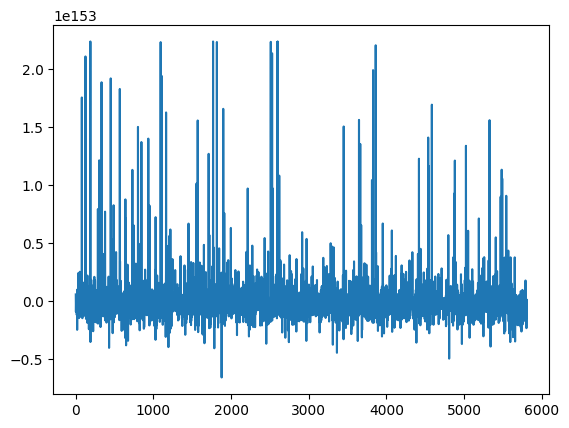

In [158]:
plt.plot(principal_component_analysis(X_train_copy, n_components=1)[0])